In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Loading Dataset

df = pd.read_excel("/content/aspiring_minds_employability_outcomes_2015.xlsx")

In [ ]:
df.shape

(3998, 39)

In [ ]:
df.head()

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0      train  203097   420000 2012-06-01              present   
1      train  579905   500000 2013-09-01              present   
2      train  810601   325000 2014-06-01              present   
3      train  267447  1100000 2011-07-01              present   
4      train  343523   200000 2014-03-01  2015-03-01 00:00:00   

                Designation    JobCity Gender        DOB  10percentage  ...  \
0   senior quality engineer  Bangalore      f 1990-02-19          84.3  ...   
1         assistant manager     Indore      m 1989-10-04          85.4  ...   
2          systems engineer    Chennai      f 1992-08-03          85.0  ...   
3  senior software engineer    Gurgaon      m 1989-12-05          85.6  ...   
4                       get    Manesar      m 1991-02-27          78.0  ...   

  ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0              -1              -1              -1          -1         -1   
1              -1              -1              -1          -1         -1   
2              -1              -1              -1          -1         -1   
3              -1              -1              -1          -1         -1   
4              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [ ]:
df.describe()

ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300400   
std     4802.261482     0.262270     8.167338    4802.261482         0.458489   
min        2.000000     1.000000     6.450000       2.000000         0.000000   
25%      494.000000     2.000000    66.407500     494.000000         0.000000   
50%     3879.000000     2.000000    71.720000    3879.000000         0.000000   
75%     8818.000000     2.000000    76.327500    8818.000000         1.000000   
max    18409.000000     2.000000    99.930000   18409.000000         1.000000   

       ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
count  ...      3998.000000     3998.000000     3998.000000  3998.000000   
mean   ...        90.742371       22.974737       16.478739    31.851176   
std    ...       175.273083       98.123311       87.585634   104.852845   
min    ...        -1.000000       -1.000000       -1.000000    -1.000000   
25%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
50%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
75%    ...        -1.000000       -1.000000       -1.000000    -1.000000   
max    ...       715.000000      623.000000      676.000000   548.000000   

         CivilEngg  conscientiousness  agreeableness  extraversion  \
count  3998.000000        3998.000000    3998.000000   3998.000000   
mean      2.683842          -0.037831       0.146496      0.002763   
std      36.658505           1.028666       0.941782      0.951471   
min      -1.000000          -4.126700      -5.781600     -4.600900   
25%      -1.000000          -0.713525      -0.287100     -0.604800   
50%      -1.000000           0.046400       0.212400      0.091400   
75%      -1.000000           0.702700       0.812800      0.672000   
max     516.000000           1.995300       1.904800      2.535400   

       nueroticism  openess_to_experience  
count  3998.000000            3998.000000  
mean     -0.169033              -0.138110  
std       1.007580               1.008075  
min      -2.643000              -7.375700  
25%      -0.868200              -0.669200  
50%      -0.234400              -0.094300  
75%       0.526200               0.502400  
max       3.352500               1.822400  

[8 rows x 27 columns]

In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [ ]:
print("Printing unique values of each column")
for i in df.columns[:]:
  print("*"*70)
  print("number of unique values of ",i," column :",df[i].nunique())
  print("unique values:")
  print(df[i].unique())

Printing unique values of each column
**********************************************************************
number of unique values of  Unnamed: 0  column : 1
unique values:
['train']
**********************************************************************
number of unique values of  ID  column : 3998
unique values:
[203097 579905 810601 ... 355888 947111 324966]
**********************************************************************
number of unique values of  Salary  column : 177
unique values:
[ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  3850

In [3]:
# Droping unnessary columns 

df.drop(columns=['Unnamed: 0', 'ID', 'CollegeID', 'CollegeCityID'], inplace=True)

In [ ]:
df.isnull().sum()

Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(3998, 35)

In [4]:
df_numerical=df.select_dtypes(include=['int64','float64'])

In [ ]:
df_numerical

Salary  10percentage  12graduation  12percentage  CollegeTier  \
0      420000         84.30          2007         95.80            2   
1      500000         85.40          2007         85.00            2   
2      325000         85.00          2010         68.20            2   
3     1100000         85.60          2007         83.60            1   
4      200000         78.00          2008         76.80            2   
...       ...           ...           ...           ...          ...   
3993   280000         52.09          2006         55.50            2   
3994   100000         90.00          2009         93.00            2   
3995   320000         81.86          2008         65.50            2   
3996   200000         78.72          2010         69.88            2   
3997   400000         70.60          2008         68.00            2   

      collegeGPA  CollegeCityTier  GraduationYear  English  Logical  ...  \
0          78.00                0            2011      515      585  ...   
1          70.06                0            2012      695      610  ...   
2          70.00                0            2014      615      545  ...   
3          74.64                1            2011      635      585  ...   
4          73.90                0            2012      545      625  ...   
...          ...              ...             ...      ...      ...  ...   
3993       61.50                0            2010      365      334  ...   
3994       77.30                1            2013      415      410  ...   
3995       70.00                0            2012      475      475  ...   
3996       70.42                1            2014      450      410  ...   
3997       68.00                1            2012      565      515  ...   

      ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0                  -1              -1              -1           -1         -1   
1                  -1              -1              -1           -1         -1   
2                  -1              -1              -1           -1         -1   
3                  -1              -1              -1           -1         -1   
4                  -1              -1              -1           -1         -1   
...               ...             ...             ...          ...        ...   
3993               -1              -1              -1           -1         -1   
3994               -1              -1              -1           -1         -1   
3995               -1              -1              -1           -1         -1   
3996              438              -1              -1           -1         -1   
3997               -1              -1              -1           -1         -1   

      conscientiousness  agreeableness  extraversion  nueroticism  \
0                0.9737         0.8128        0.5269      1.35490   
1               -0.7335         0.3789        1.2396     -0.10760   
2                0.2718         1.7109        0.1637     -0.86820   
3                0.0464         0.3448       -0.3440     -0.40780   
4               -0.8810        -0.2793       -1.0697      0.09163   
...                 ...            ...           ...          ...   
3993            -0.1082         0.3448        0.2366      0.64980   
3994            -0.3027         0.8784        0.9322      0.77980   
3995            -1.5765        -1.5273       -1.5051     -1.31840   
3996            -0.1590         0.0459       -0.4511     -0.36120   
3997            -1.1128        -0.2793       -0.6343      1.32553   

      openess_to_experience  
0                   -0.4455  
1                    0.8637  
2                    0.6721  
3                   -0.9194  
4                   -0.1295  
...                     ...  
3993                -0.9194  
3994                -0.0943  
3995                -0.7615  
3996                -0.0943  
3997                -0.6035  

[3998 rows x 24 columns]

In [ ]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3998 non-null   int64  
 1   10percentage           3998 non-null   float64
 2   12graduation           3998 non-null   int64  
 3   12percentage           3998 non-null   float64
 4   CollegeTier            3998 non-null   int64  
 5   collegeGPA             3998 non-null   float64
 6   CollegeCityTier        3998 non-null   int64  
 7   GraduationYear         3998 non-null   int64  
 8   English                3998 non-null   int64  
 9   Logical                3998 non-null   int64  
 10  Quant                  3998 non-null   int64  
 11  Domain                 3998 non-null   float64
 12  ComputerProgramming    3998 non-null   int64  
 13  ElectronicsAndSemicon  3998 non-null   int64  
 14  ComputerScience        3998 non-null   int64  
 15  Mech

In [ ]:
df_numerical.shape

(3998, 24)

**Univariate Analysis**

Will take into account numerical columns one by one to clean the data

In [6]:
df_numericalcopy1 = df_numerical.copy()

In [ ]:
df_numericalcopy1

Salary  10percentage  12graduation  12percentage  CollegeTier  \
0      420000         84.30          2007         95.80            2   
1      500000         85.40          2007         85.00            2   
2      325000         85.00          2010         68.20            2   
3     1100000         85.60          2007         83.60            1   
4      200000         78.00          2008         76.80            2   
...       ...           ...           ...           ...          ...   
3993   280000         52.09          2006         55.50            2   
3994   100000         90.00          2009         93.00            2   
3995   320000         81.86          2008         65.50            2   
3996   200000         78.72          2010         69.88            2   
3997   400000         70.60          2008         68.00            2   

      collegeGPA  CollegeCityTier  GraduationYear  English  Logical  ...  \
0          78.00                0            2011      515      585  ...   
1          70.06                0            2012      695      610  ...   
2          70.00                0            2014      615      545  ...   
3          74.64                1            2011      635      585  ...   
4          73.90                0            2012      545      625  ...   
...          ...              ...             ...      ...      ...  ...   
3993       61.50                0            2010      365      334  ...   
3994       77.30                1            2013      415      410  ...   
3995       70.00                0            2012      475      475  ...   
3996       70.42                1            2014      450      410  ...   
3997       68.00                1            2012      565      515  ...   

      ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0                  -1              -1              -1           -1         -1   
1                  -1              -1              -1           -1         -1   
2                  -1              -1              -1           -1         -1   
3                  -1              -1              -1           -1         -1   
4                  -1              -1              -1           -1         -1   
...               ...             ...             ...          ...        ...   
3993               -1              -1              -1           -1         -1   
3994               -1              -1              -1           -1         -1   
3995               -1              -1              -1           -1         -1   
3996              438              -1              -1           -1         -1   
3997               -1              -1              -1           -1         -1   

      conscientiousness  agreeableness  extraversion  nueroticism  \
0                0.9737         0.8128        0.5269      1.35490   
1               -0.7335         0.3789        1.2396     -0.10760   
2                0.2718         1.7109        0.1637     -0.86820   
3                0.0464         0.3448       -0.3440     -0.40780   
4               -0.8810        -0.2793       -1.0697      0.09163   
...                 ...            ...           ...          ...   
3993            -0.1082         0.3448        0.2366      0.64980   
3994            -0.3027         0.8784        0.9322      0.77980   
3995            -1.5765        -1.5273       -1.5051     -1.31840   
3996            -0.1590         0.0459       -0.4511     -0.36120   
3997            -1.1128        -0.2793       -0.6343      1.32553   

      openess_to_experience  
0                   -0.4455  
1                    0.8637  
2                    0.6721  
3                   -0.9194  
4                   -0.1295  
...                     ...  
3993                -0.9194  
3994                -0.0943  
3995                -0.7615  
3996                -0.0943  
3997                -0.6035  

[3998 rows x 24 columns]

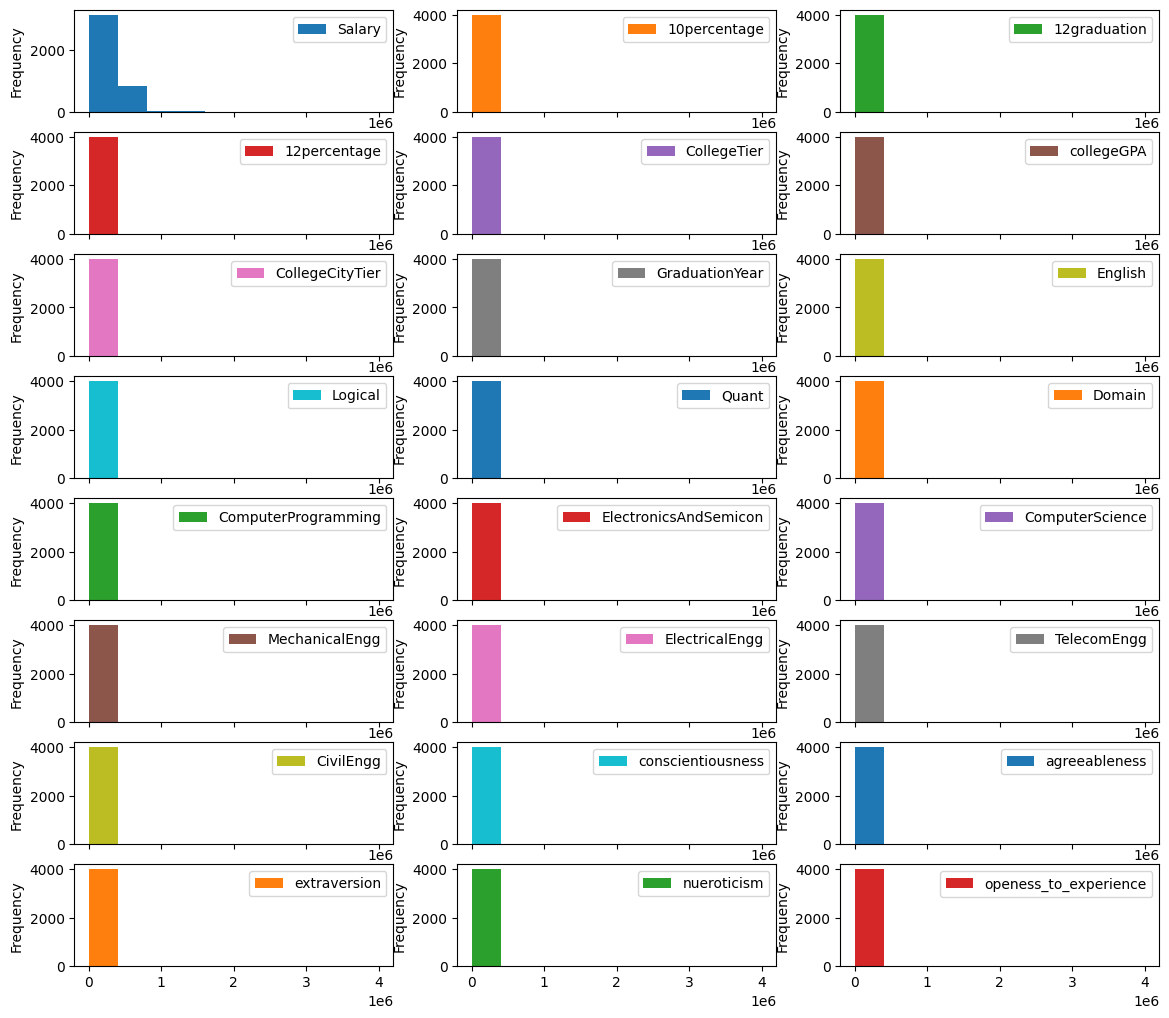

In [ ]:
df_numerical.plot(kind='hist',subplots=True,layout=(9,3),figsize=(14,14))
plt.show()

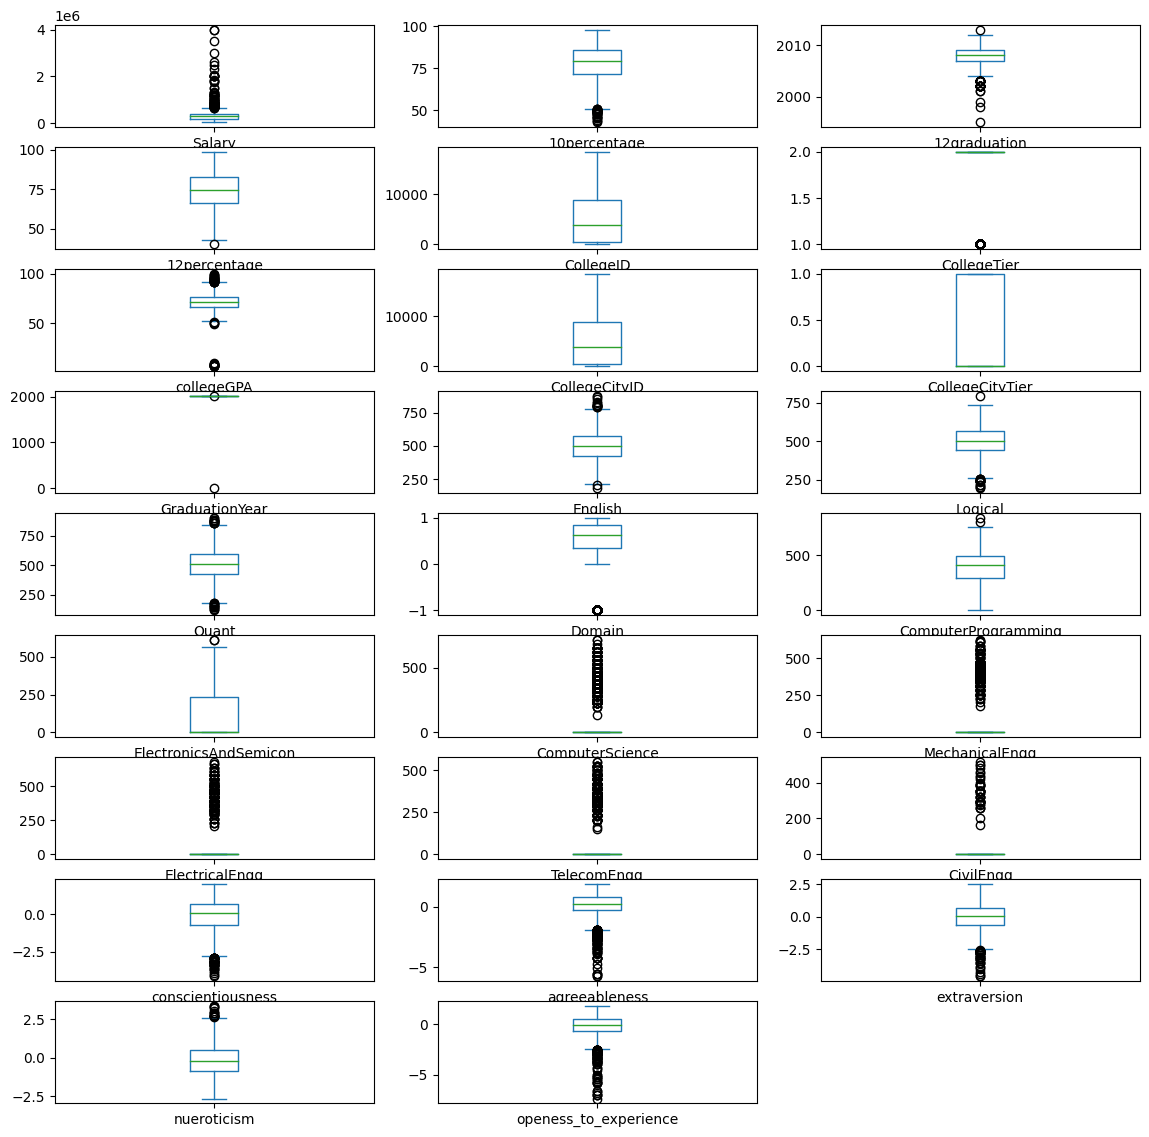

In [ ]:
df_numerical.plot(kind='box',subplots=True,layout=(9,3),figsize=(14,14))
plt.show()

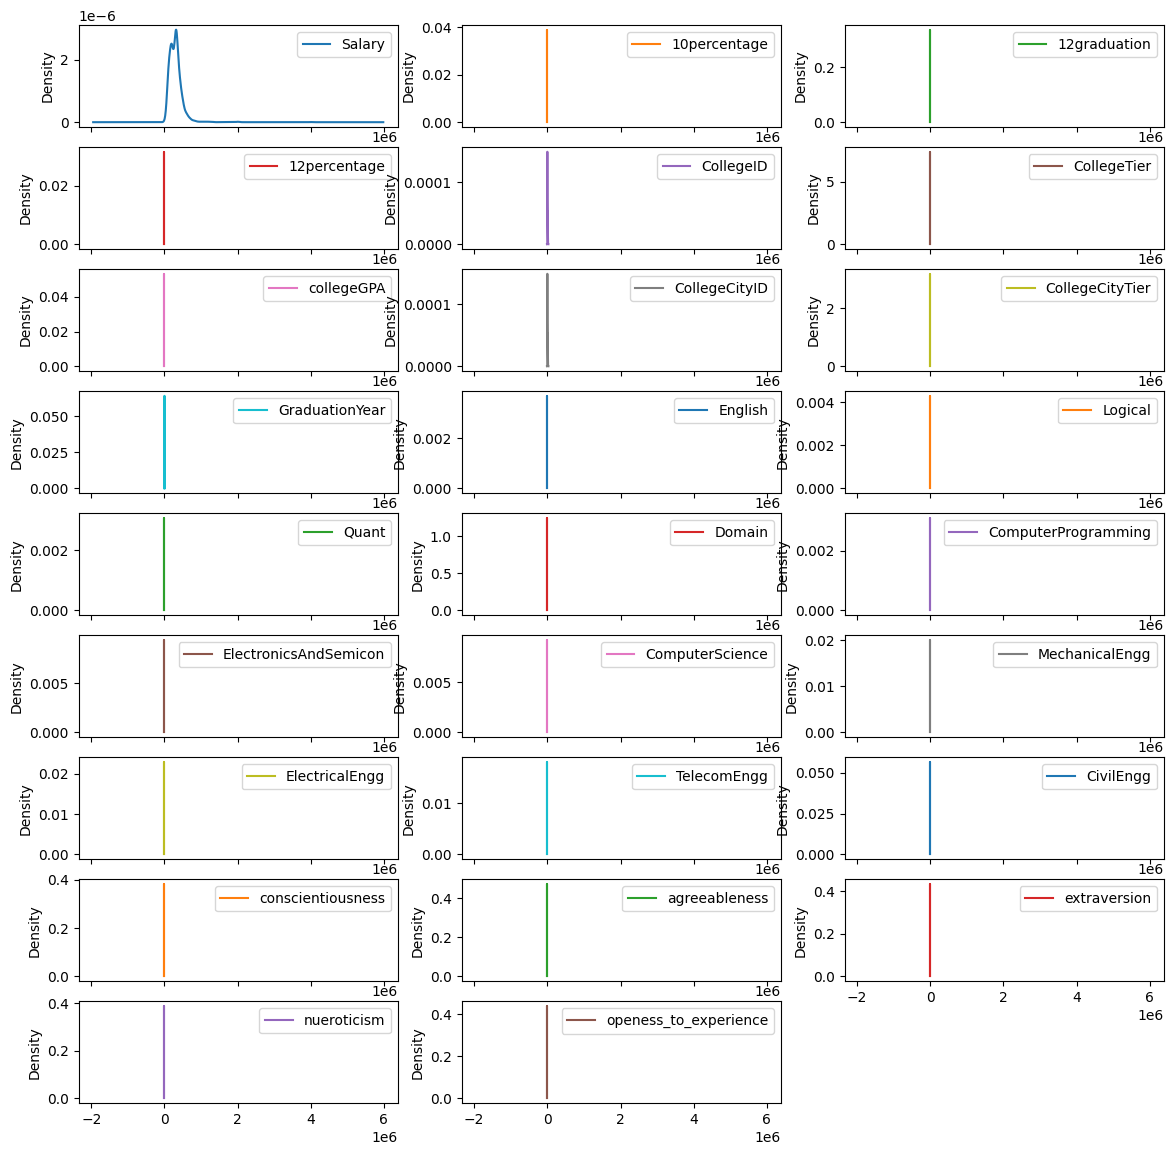

In [ ]:
df_numerical.plot(kind='kde',subplots=True,layout=(9,3),figsize=(14,14))
plt.show()

**Salary**
Continuous
Annual CTC oﬀered to the candidate (in INR)



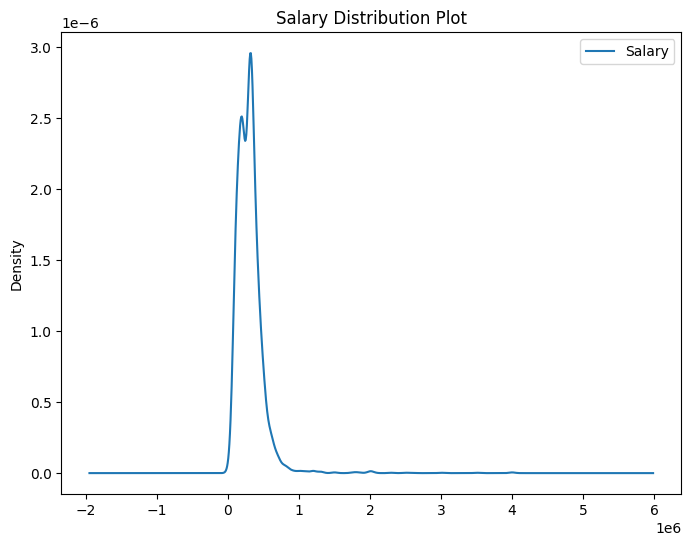

In [ ]:
# Visualizing Salary columns Distribution

df_numerical.Salary.plot(kind='kde',title='Salary Distribution Plot', figsize= (8,6), legend=True )
plt.show()

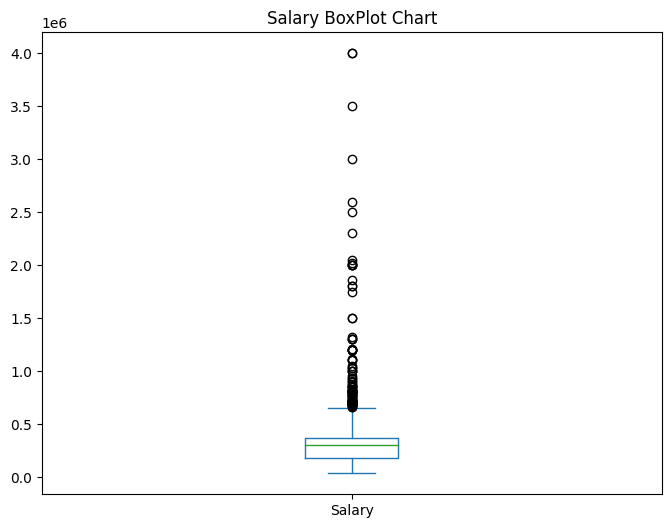

In [ ]:
# Visualizing Salary columns BoxPlot Chart

df_numerical.Salary.plot(kind='box',title='Salary BoxPlot Chart', figsize= (8,6), legend=True )
plt.show()

In [ ]:
print("Minimum Salaries : ", df.Salary.min())
print("Maximum Salaries : ", df.Salary.max())
print("Mean Salaries : ", round(df.Salary.mean()))
print("Median Salaries : ", round(df.Salary.median()))
print("Standard Salaries Values : ", round(df.Salary.std()))

Minimum Salaries :  35000
Maximum Salaries :  4000000
Mean Salaries :  307700
Median Salaries :  300000
Standard Salaries Values :  212737


In [ ]:
print("25 Percentile  : ",round(df.Salary.quantile(0.25)))
print("50 Percentile  : ",round(df.Salary.quantile(0.50)))
print("60 Percentile  : ",round(df.Salary.quantile(0.60)))
print("75 Percentile  : ",round(df.Salary.quantile(0.75)))
print("80 Percentile  : ",round(df.Salary.quantile(0.80)))
print("90 Percentile  : ",round(df.Salary.quantile(0.90)))
print("100 Percentile : ",round(df.Salary.quantile(1.00)))

25 Percentile  :  180000
50 Percentile  :  300000
60 Percentile  :  325000
75 Percentile  :  370000
80 Percentile  :  400000
90 Percentile  :  480000
100 Percentile :  4000000


**Observations**

Salary Columns have too many Outlier

**Column "10percentage"**
Overall marks obtained in grade 10
examinations






In [ ]:
df_numerical['10percentage'].unique()

array([84.3 , 85.4 , 85.  , 85.6 , 78.  , 89.92, 86.08, 92.  , 90.  ,
       77.  , 88.6 , 81.  , 83.6 , 60.8 , 81.2 , 69.54, 85.8 , 65.  ,
       79.  , 91.2 , 75.67, 92.5 , 70.  , 88.  , 86.8 , 90.88, 76.8 ,
       84.  , 64.  , 77.2 , 87.  , 73.  , 71.  , 91.5 , 52.33, 66.6 ,
       75.  , 91.4 , 59.  , 84.5 , 95.8 , 69.6 , 86.6 , 81.92, 66.5 ,
       80.  , 85.2 , 89.25, 58.4 , 90.8 , 89.88, 63.3 , 72.  , 83.  ,
       85.3 , 60.66, 89.37, 84.4 , 89.  , 86.  , 70.6 , 93.44, 76.  ,
       86.4 , 84.83, 72.3 , 69.  , 73.33, 86.16, 56.  , 79.25, 88.66,
       80.8 , 81.16, 83.5 , 55.6 , 84.6 , 62.  , 68.4 , 51.  , 79.6 ,
       63.4 , 86.53, 76.18, 91.43, 76.17, 82.4 , 58.  , 90.04, 60.4 ,
       74.23, 59.8 , 82.3 , 84.2 , 60.  , 82.8 , 82.6 , 74.  , 89.8 ,
       88.67, 64.66, 77.8 , 89.5 , 64.56, 91.12, 73.08, 78.33, 81.33,
       89.7 , 87.4 , 92.66, 76.87, 91.3 , 77.9 , 76.2 , 77.78, 65.6 ,
       65.8 , 67.75, 91.6 , 78.66, 78.4 , 61.  , 90.4 , 58.6 , 82.2 ,
       82.  , 90.1 ,

In [ ]:
df_numerical['10percentage'].dtype

dtype('float64')

<Axes: >

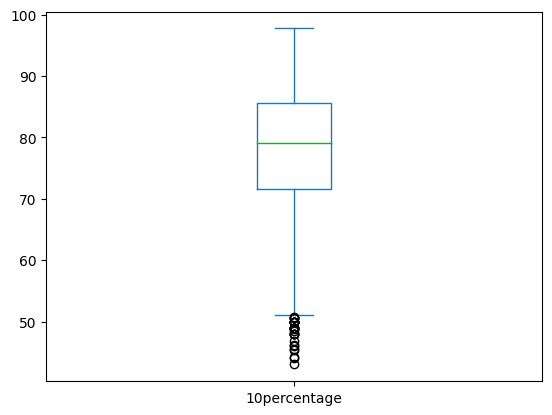

In [ ]:
df_numerical['10percentage'].plot(kind='box')

<Axes: ylabel='Frequency'>

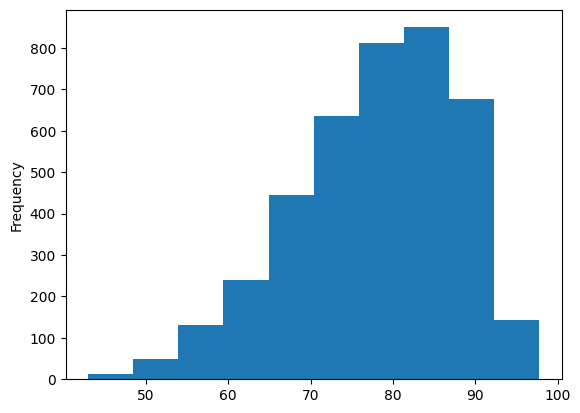

In [ ]:
df_numerical['10percentage'].plot(kind='hist')

In [ ]:
print('the mean value of 10percentage is ',  df_numerical['10percentage'].mean())
print('the minimum value of 10percentage is ',df_numerical['10percentage'].min())
print('the maximum value of 10percentage is ',df_numerical['10percentage'].max())

print('the standard deviation value of 10percentage is ',df_numerical['10percentage'].std())

the mean value of 10percentage is  77.9254427213607
the minimum value of 10percentage is  43.0
the maximum value of 10percentage is  97.76
the standard deviation value of 10percentage is  9.850162410652574


In [ ]:
df_numerical['10percentage'].value_counts()

78.00    76
82.00    71
85.00    67
76.00    66
80.00    65
         ..
82.56     1
87.04     1
81.14     1
61.75     1
78.72     1
Name: 10percentage, Length: 851, dtype: int64

In [ ]:
iq25_Sal=df_numerical['10percentage'].quantile(0.25)
iq50_Sal=df_numerical['10percentage'].quantile(0.50)
iq75_Sal=df_numerical['10percentage'].quantile(0.75)
iq100_Sal=df_numerical['10percentage'].quantile(1)
print("for 10percentage ")
print("25th quantile value is :",iq25_Sal)
print("50th quantile value is :",iq50_Sal)
print("75th quantile value is :",iq75_Sal)
print("100th quantile value is :",iq100_Sal)

for 10percentage 
25th quantile value is : 71.68
50th quantile value is : 79.15
75th quantile value is : 85.67
100th quantile value is : 97.76


In [ ]:

iqr=iq75_Sal-iq25_Sal
# calculate the lower and upper bounds
iqrlower_bound = iq25_Sal - (1.5 * iqr)
iqrupper_bound = iq75_Sal + (1.5 * iqr)

print(iqrlower_bound)
print(iqrupper_bound)

50.695000000000014
106.655


In [ ]:
df.head()

Salary        DOJ                  DOL               Designation  \
0   420000 2012-06-01              present   senior quality engineer   
1   500000 2013-09-01              present         assistant manager   
2   325000 2014-06-01              present          systems engineer   
3  1100000 2011-07-01              present  senior software engineer   
4   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   12graduation  ...  ComputerScience MechanicalEngg  ElectricalEngg  \
0          2007  ...               -1             -1              -1   
1          2007  ...               -1             -1              -1   
2          2010  ...               -1             -1              -1   
3          2007  ...               -1             -1              -1   
4          2008  ...               -1             -1              -1   

   TelecomEngg CivilEngg conscientiousness  agreeableness  extraversion  \
0           -1        -1            0.9737         0.8128        0.5269   
1           -1        -1           -0.7335         0.3789        1.2396   
2           -1        -1            0.2718         1.7109        0.1637   
3           -1        -1            0.0464         0.3448       -0.3440   
4           -1        -1           -0.8810        -0.2793       -1.0697   

   nueroticism openess_to_experience  
0      1.35490               -0.4455  
1     -0.10760                0.8637  
2     -0.86820                0.6721  
3     -0.40780               -0.9194  
4      0.09163               -0.1295  

[5 rows x 37 columns]

In [ ]:
df_numerical.head()

Salary  10percentage  12graduation  12percentage  CollegeID  CollegeTier  \
0   420000          84.3          2007          95.8       1141            2   
1   500000          85.4          2007          85.0       5807            2   
2   325000          85.0          2010          68.2         64            2   
3  1100000          85.6          2007          83.6       6920            1   
4   200000          78.0          2008          76.8      11368            2   

   collegeGPA  CollegeCityID  CollegeCityTier  GraduationYear  ...  \
0       78.00           1141                0            2011  ...   
1       70.06           5807                0            2012  ...   
2       70.00             64                0            2014  ...   
3       74.64           6920                1            2011  ...   
4       73.90          11368                0            2012  ...   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 26 columns]

In [ ]:
# replace values below the IQR lower bound with the IQR lower bound
df_numerical.loc[df_numerical['10percentage'] < iqrlower_bound, '10percentage'] = iqrlower_bound

In [ ]:
df_numerical['10percentage'].dtype

dtype('float64')

<Axes: ylabel='Frequency'>

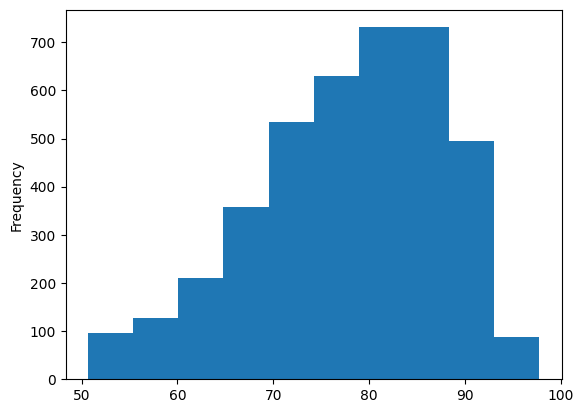

In [ ]:
df_numerical['10percentage'].plot(kind='hist')

<Axes: >

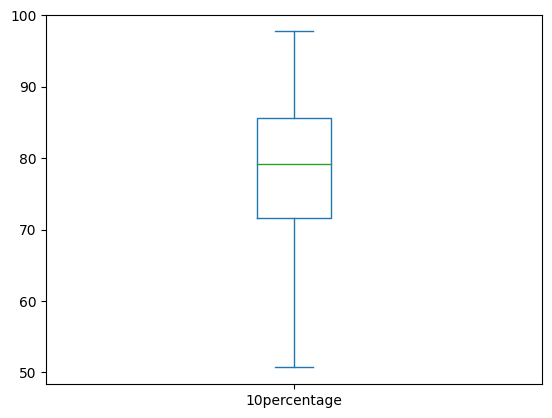

In [ ]:
df_numerical['10percentage'].plot(kind='box')

In [ ]:
df_numerical['10percentage'].value_counts()

78.00    76
82.00    71
85.00    67
76.00    66
80.00    65
         ..
59.80     1
92.93     1
67.16     1
80.32     1
78.72     1
Name: 10percentage, Length: 835, dtype: int64

In [ ]:
#we have removed the outliers

In [ ]:
#converting values of 10percentage in terms of grades

In [ ]:
df1=df_numerical.copy()
df2=df1.copy()

In [ ]:
df_numerical=df1.copy()

In [ ]:
df_numerical['10percentage'].dtype

dtype('float64')

In [ ]:
df_numerical['10percentage'].isna().sum()

0

In [ ]:

df_numerical.loc[(df_numerical['10percentage'] >= 90), '10percentage'] = 1
#df_numerical.loc[(df_numerical['10percentage'] < 50), '10percentage'] = 6
df_numerical.loc[(df_numerical['10percentage'] >= 80) & (df_numerical['10percentage'] < 90), '10percentage'] = 2
df_numerical.loc[(df_numerical['10percentage'] >= 70) & (df_numerical['10percentage'] < 80), '10percentage'] = 3
df_numerical.loc[(df_numerical['10percentage'] >= 60) & (df_numerical['10percentage'] < 70), '10percentage'] = 4
df_numerical.loc[(df_numerical['10percentage'] >= 50) & (df_numerical['10percentage'] < 60), '10percentage'] = 5


In [ ]:
df_numerical['10percentage'].value_counts()

2.0    1520
3.0    1279
4.0     608
1.0     391
5.0     200
Name: 10percentage, dtype: int64

<Axes: ylabel='Frequency'>

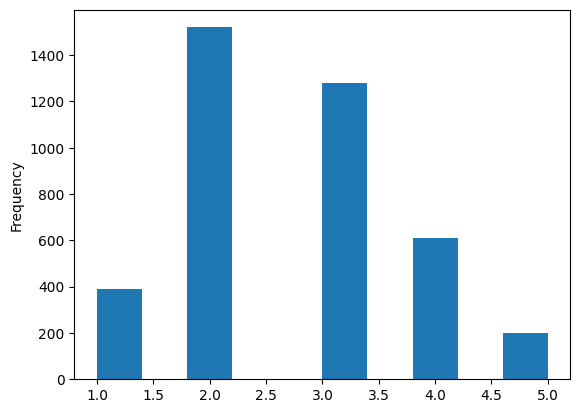

In [ ]:
df_numerical['10percentage'].plot(kind='hist')

In [ ]:
#its evident that number of records with percentage between 80-90 is far higher than number of rows with percentage less than 50

In [ ]:
df_numerical.head()

Salary  10percentage  12graduation  12percentage  CollegeID  CollegeTier  \
0   420000           2.0          2007          95.8       1141            2   
1   500000           2.0          2007          85.0       5807            2   
2   325000           2.0          2010          68.2         64            2   
3  1100000           2.0          2007          83.6       6920            1   
4   200000           3.0          2008          76.8      11368            2   

   collegeGPA  CollegeCityID  CollegeCityTier  GraduationYear  ...  \
0       78.00           1141                0            2011  ...   
1       70.06           5807                0            2012  ...   
2       70.00             64                0            2014  ...   
3       74.64           6920                1            2011  ...   
4       73.90          11368                0            2012  ...   

   ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  CivilEngg  \
0               -1              -1              -1           -1         -1   
1               -1              -1              -1           -1         -1   
2               -1              -1              -1           -1         -1   
3               -1              -1              -1           -1         -1   
4               -1              -1              -1           -1         -1   

   conscientiousness  agreeableness  extraversion  nueroticism  \
0             0.9737         0.8128        0.5269      1.35490   
1            -0.7335         0.3789        1.2396     -0.10760   
2             0.2718         1.7109        0.1637     -0.86820   
3             0.0464         0.3448       -0.3440     -0.40780   
4            -0.8810        -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 26 columns]

**Observation for 10percentage **
25th quantile value is : 71.68
*  25th quantile value is : 71.68
*  50th quantile value is : 79.15
*   75th quantile value is : 85.67
*   100th quantile value is : 97.76

*   10 Grade Candidates Higest Score is : 97.76
*   10 Grade Candidates Lowest Score is : 43

*   10 Grade Candidates Average Score is : 79



**we have many outliers to treat here**


**Column "12graduation"**
Date
Year of graduation - senior year high school



In [ ]:
df_numerical['12graduation'].value_counts()

2009    1052
2008     935
2010     742
2007     528
2006     407
2005     160
2004      73
2011      46
2003      25
2002      14
2012      10
2001       2
1995       1
1998       1
2013       1
1999       1
Name: 12graduation, dtype: int64

<Axes: ylabel='Frequency'>

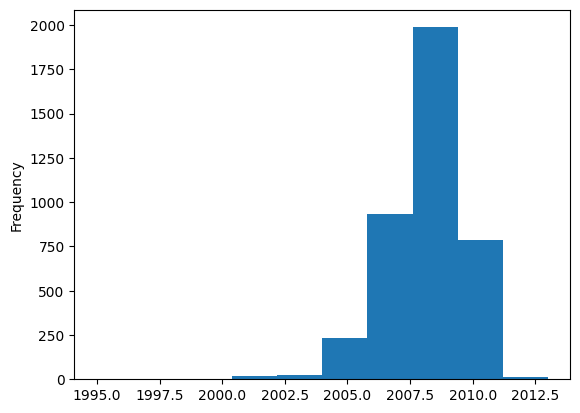

In [ ]:
df_numerical['12graduation'].plot(kind='hist')

<Axes: >

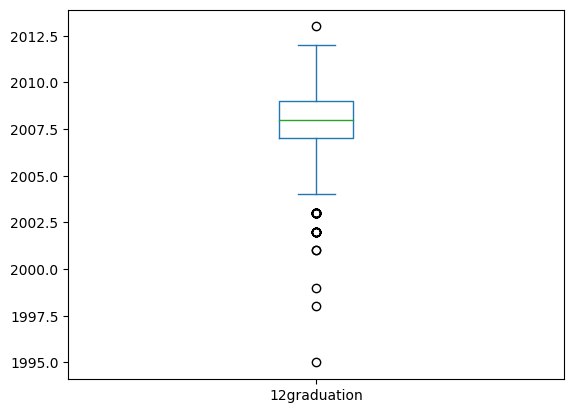

In [ ]:
df_numerical['12graduation'].plot(kind='box')

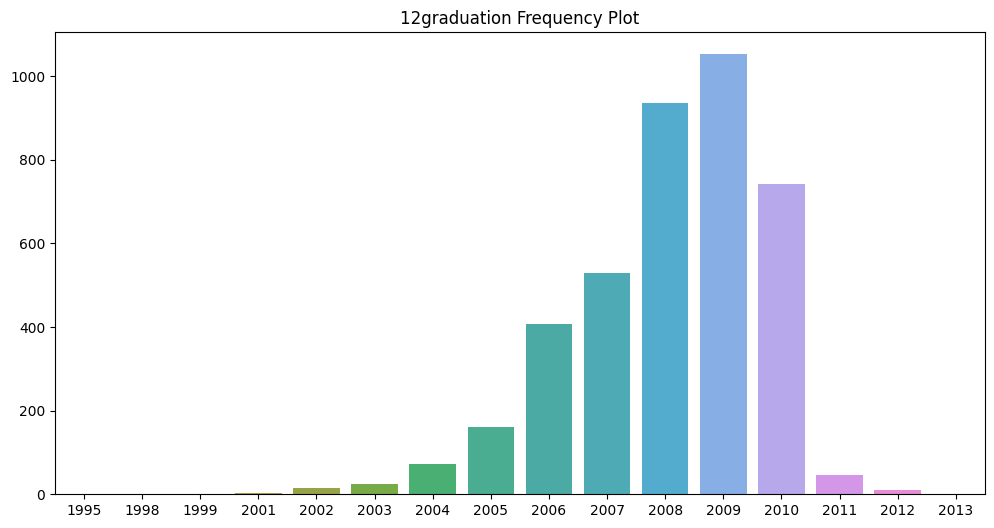

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x = df['12graduation'])
plt.title("12graduation Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [ ]:
#its clear that number of records for the graduation year between 2005 and 2010 is more followed by graduation year greater than 2010 followed by graduation year between 2000 and 2005

**column:12percentage**
Continuous
Overall marks obtained in grade 12
examinations


In [ ]:
df['12percentage'].value_counts()

70.00    72
72.00    68
74.00    63
62.00    58
68.00    58
         ..
58.50     1
74.45     1
95.41     1
83.58     1
82.55     1
Name: 12percentage, Length: 801, dtype: int64

In [ ]:
df_numerical['12percentage'].value_counts()

70.00    72
72.00    68
74.00    63
62.00    58
68.00    58
         ..
58.50     1
74.45     1
95.41     1
83.58     1
82.55     1
Name: 12percentage, Length: 801, dtype: int64

In [ ]:
print('the mean value of 12percentage is ',  df_numerical['12percentage'].mean())
print('the minimum value of 12percentage is ',df_numerical['12percentage'].min())
print('the maximum value of 12percentage is ',df_numerical['12percentage'].max())

print('the standard deviation value of 12percentage is ',df_numerical['12percentage'].std())

the mean value of 10percentage is  74.46636568284141
the minimum value of 10percentage is  40.0
the maximum value of 10percentage is  98.7
the standard deviation value of 10percentage is  10.999933102957721


In [ ]:
iq25_Sal=df_numerical['12percentage'].quantile(0.25)
iq50_Sal=df_numerical['12percentage'].quantile(0.50)
iq75_Sal=df_numerical['12percentage'].quantile(0.75)
iq100_Sal=df_numerical['12percentage'].quantile(1)
print("for 12percentage ")
print("25th quantile value is :",iq25_Sal)
print("50th quantile value is :",iq50_Sal)
print("75th quantile value is :",iq75_Sal)
print("100th quantile value is :",iq100_Sal)

for 12percentage 
25th quantile value is : 66.0
50th quantile value is : 74.4
75th quantile value is : 82.6
100th quantile value is : 98.7


<Axes: ylabel='Frequency'>

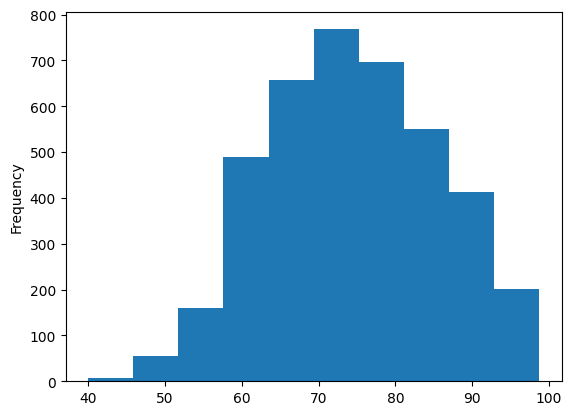

In [ ]:
df_numerical['12percentage'].plot(kind='hist')

<Axes: >

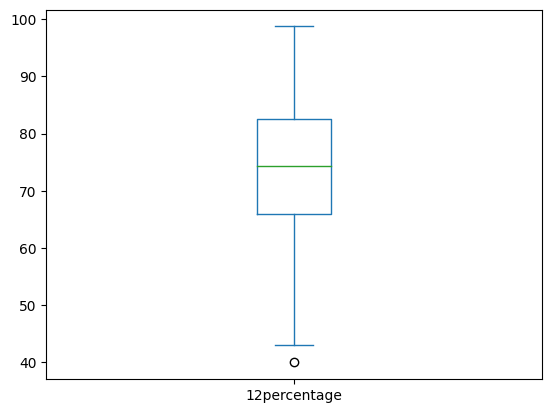

In [ ]:
df_numerical['12percentage'].plot(kind='box')

In [ ]:
df_numerical[df_numerical['12percentage']<=40]

Salary  10percentage  12graduation  12percentage  CollegeID  \
3337  300000           3.0             3          40.0       2594   

      CollegeTier  collegeGPA  CollegeCityID  CollegeCityTier  GraduationYear  \
3337            2        67.2           2594                0            2010   

      ...  ComputerScience  MechanicalEngg  ElectricalEngg  TelecomEngg  \
3337  ...               -1              -1              -1           -1   

      CivilEngg  conscientiousness  agreeableness  extraversion  nueroticism  \
3337         -1             -0.881         0.0328       -1.5051      -0.2902   

      openess_to_experience  
3337                -0.9194  

[1 rows x 26 columns]



*   12 Grade Candidates Higest Score is : 98.7
*  12 Grade Candidates Lowest Score is : 40


*   12 Grade Candidates Average Score is : 74
* 

"**only one outlier is seen here**" 

**column:CollegeTier** 
Categorical
Tier of college



In [ ]:
df_numerical['CollegeTier'].value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

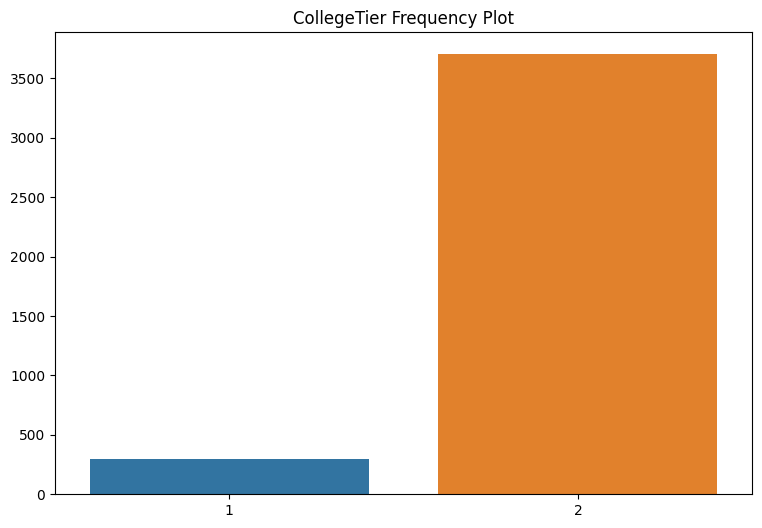

In [ ]:
plt.figure(figsize=(9,6))
sns.countplot(x = df['CollegeTier'])
plt.title("CollegeTier Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

observation:**Majoraty of the Candidates are come from Tier 2 college**

**column:CollegeGPA**
Continuous
Aggregate GPA at graduation



In [ ]:
df_numerical['collegeGPA'].value_counts()

70.00    112
72.00     99
75.00     83
65.00     79
71.00     75
        ... 
71.68      1
73.15      1
90.01      1
71.36      1
70.42      1
Name: collegeGPA, Length: 1282, dtype: int64

In [ ]:
print('the mean value of collegeGPA is ',  df_numerical['collegeGPA'].mean())
print('the minimum value of collegeGPA is ',df_numerical['collegeGPA'].min())
print('the maximum value of collegeGPA is ',df_numerical['collegeGPA'].max())

print('the standard deviation value of collegeGPA is ',df_numerical['collegeGPA'].std())

the mean value of collegeGPA is  71.48617058529265
the minimum value of collegeGPA is  6.45
the maximum value of collegeGPA is  99.93
the standard deviation value of collegeGPA is  8.167337651961995


<Axes: ylabel='Frequency'>

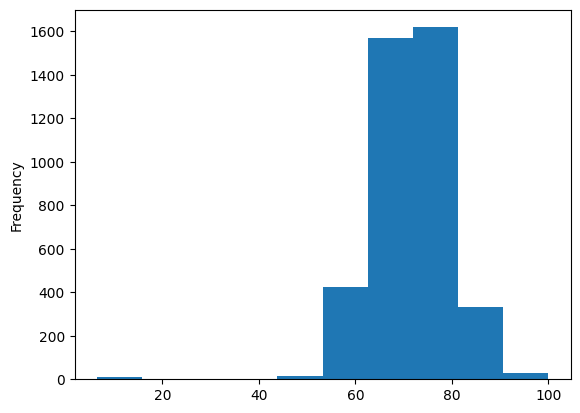

In [ ]:
df_numerical['collegeGPA'].plot(kind='hist')

<Axes: >

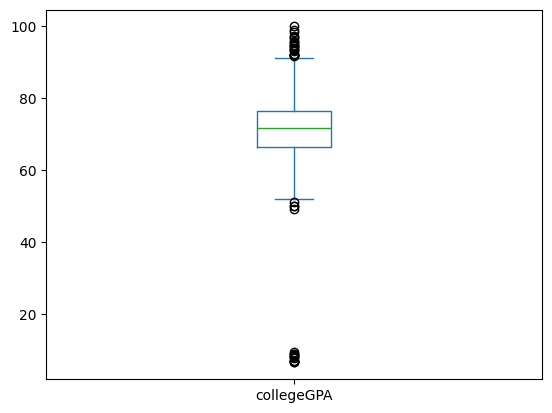

In [ ]:
df_numerical['collegeGPA'].plot(kind='box')

In [ ]:
print("Minimum collegeGPA : ", df['collegeGPA'].min())
print("Maximum collegeGPA : ", df['collegeGPA'].max())
print("Mean collegeGPA : ", round(df['collegeGPA'].mean()))
print("Median collegeGPA : ", round(df['collegeGPA'].median()))
print("Standard collegeGPA Values : ", round(df['collegeGPA'].std()))

Minimum collegeGPA :  6.45
Maximum collegeGPA :  99.93
Mean collegeGPA :  71
Median collegeGPA :  72
Standard collegeGPA Values :  8


In [ ]:
print("25 Percentile  : ",round(df['collegeGPA'].quantile(0.25)))
print("50 Percentile  : ",round(df['collegeGPA'].quantile(0.50)))
print("60 Percentile  : ",round(df['collegeGPA'].quantile(0.60)))
print("75 Percentile  : ",round(df['collegeGPA'].quantile(0.75)))
print("80 Percentile  : ",round(df['collegeGPA'].quantile(0.80)))
print("90 Percentile  : ",round(df['collegeGPA'].quantile(0.90)))
print("100 Percentile : ",round(df['collegeGPA'].quantile(1.00)))

25 Percentile  :  66
50 Percentile  :  72
60 Percentile  :  73
75 Percentile  :  76
80 Percentile  :  78
90 Percentile  :  81
100 Percentile :  100




*   collegeGPA Candidates Higest Score is : 99.93
*   collegeGPA Candidates Lowest Score is : 6.45
*   collegeGPA Candidates Average Score is : 72
*  collegeGPA Column Have too many Outlier







**CollegeCityTier**
Categorical
The tier of the city in which the college is located



In [7]:
df_numerical['CollegeCityTier'].value_counts()

0    2797
1    1201
Name: CollegeCityTier, dtype: int64

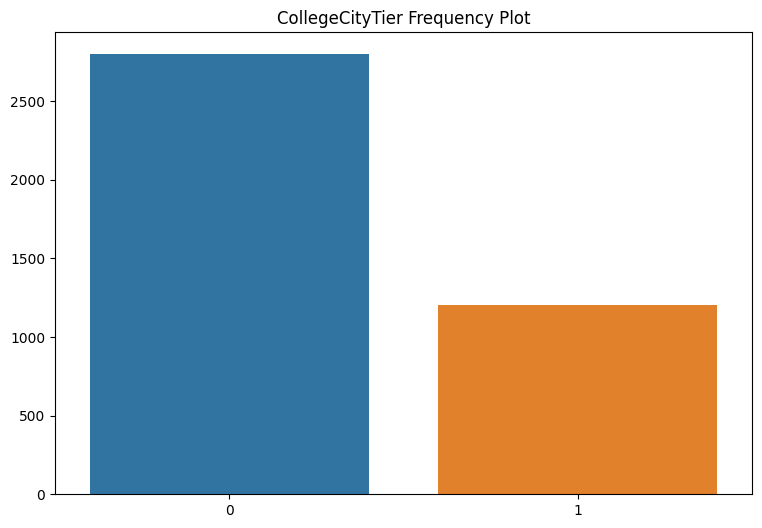

In [8]:
plt.figure(figsize=(9,6))
sns.countplot(x = df_numerical['CollegeCityTier'])
plt.title("CollegeCityTier Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

observation:
Majoraty of the Candidates are come from CollegeCityTier 0 college

**GraduationYear**
Date
Year of graduation (Bachelor’s degree)



In [ ]:
df_numerical['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [ ]:
df_numerical = df_numerical.drop(df_numerical[df_numerical['GraduationYear'] == 0].index)

In [ ]:
df_numerical['GraduationYear'].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
Name: GraduationYear, dtype: int64

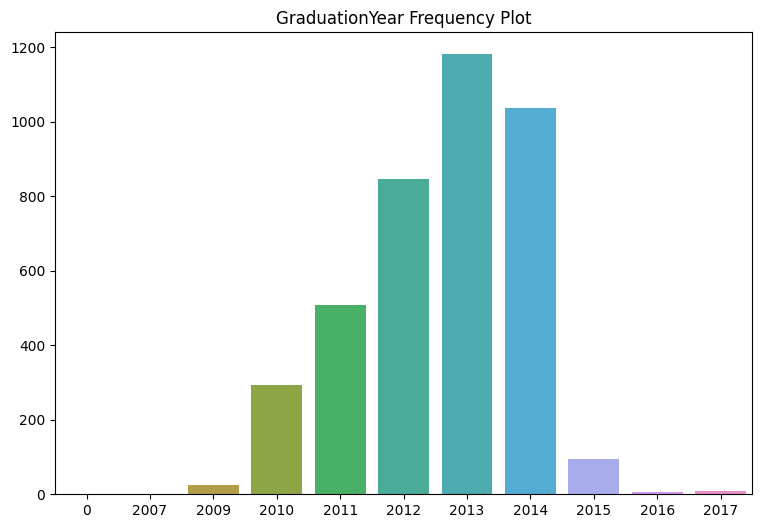

In [9]:
plt.figure(figsize=(9,6))
sns.countplot(x = df_numerical['GraduationYear'])
plt.title("GraduationYear Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

Observation:Majoraty of the Candidates are Graduate in Year 2013 followed by 2014

<Axes: >

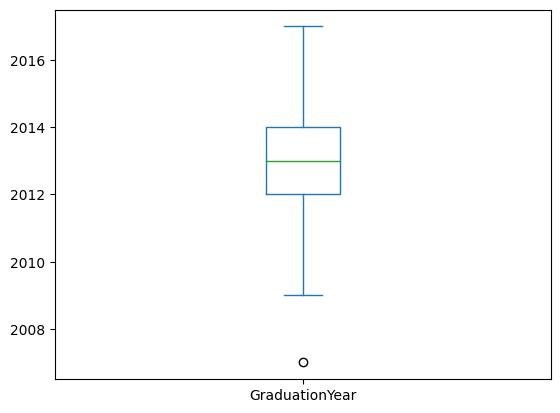

In [ ]:
df_numerical['GraduationYear'].plot(kind='box')

In [ ]:
df_numerical.columns

Index(['Salary', '10percentage', '12graduation', '12percentage', 'CollegeID',
       'CollegeTier', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

**English**
Continuous
Scores in AMCAT English section



In [10]:
df_numerical['English'].value_counts()

475    160
545    151
465    150
535    138
405    111
      ... 
180      1
875      1
825      1
870      1
334      1
Name: English, Length: 111, dtype: int64

In [11]:
print('the mean score of English  is ',  df_numerical['English'].mean())
print('the minimum score of English is ',df_numerical['English'].min())
print('the maximum score of English is ',df_numerical['English'].max())

the mean score of English  is  501.64907453726863
the minimum score of English is  180
the maximum score of English is  875


In [12]:
iq25_Sal=df_numerical['English'].quantile(0.25)
iq50_Sal=df_numerical['English'].quantile(0.50)
iq75_Sal=df_numerical['English'].quantile(0.75)
iq100_Sal=df_numerical['English'].quantile(1)
print("for English ")
print("25th quantile value is :",iq25_Sal)
print("50th quantile value is :",iq50_Sal)
print("75th quantile value is :",iq75_Sal)
print("100th quantile value is :",iq100_Sal)

for English 
25th quantile value is : 425.0
50th quantile value is : 500.0
75th quantile value is : 570.0
100th quantile value is : 875.0


<Axes: ylabel='Frequency'>

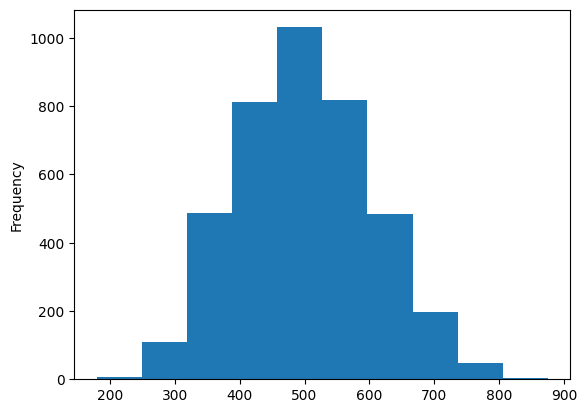

In [13]:
df_numerical['English'].plot(kind='hist')

<Axes: >

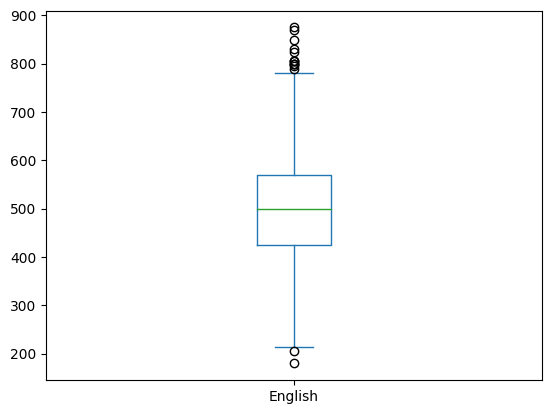

In [14]:
df_numerical['English'].plot(kind='box')

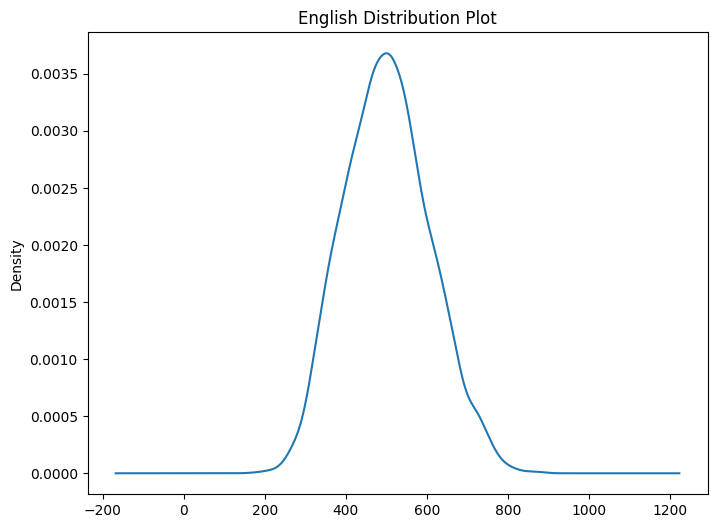

In [15]:
df_numerical.English.plot(kind='kde', title="English Distribution Plot", figsize=(8,6))
plt.show()


Observation:
*   Candidates Higest Scores in AMCAT English section is : 875
*   Candidates Lowest Scores in AMCAT English section is : 180
*   Candidates Average Scores in AMCAT English section is : 500
*   English Column is following normal distribution








**Logical**
Continuous
Scores in AMCAT Logical section



In [ ]:
df_numerical['Logical'].value_counts()

495    158
545    151
555    151
485    151
505    117
      ... 
310      1
795      1
534      1
454      1
660      1
Name: Logical, Length: 107, dtype: int64

<Axes: >

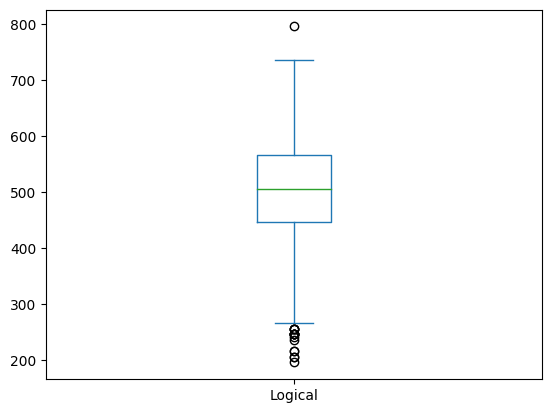

In [ ]:
df_numerical['Logical'].plot(kind='box')

<Axes: ylabel='Frequency'>

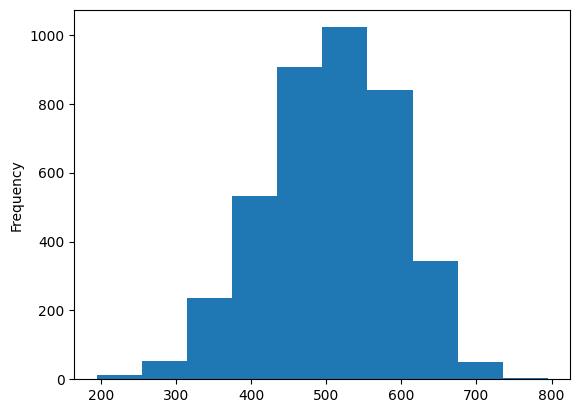

In [ ]:
df_numerical['Logical'].plot(kind='hist')

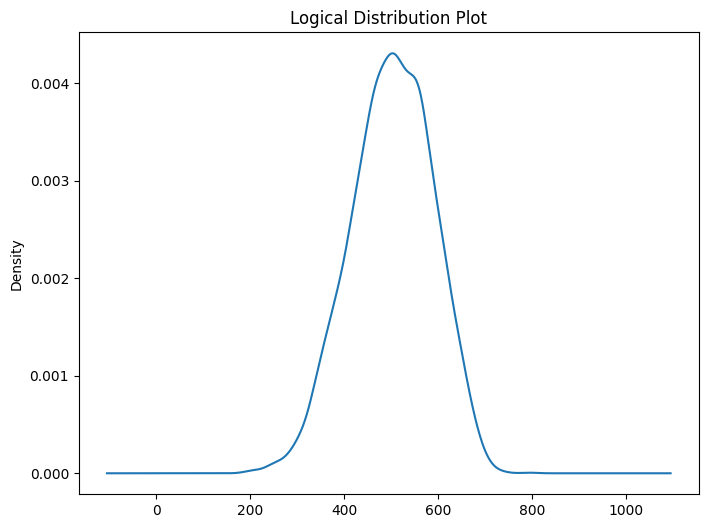

In [16]:
df_numerical.Logical.plot(kind='kde', title="Logical Distribution Plot", figsize=(8,6))
plt.show()

In [ ]:
print('the mean score of Logical  is ',  df_numerical['Logical'].mean())
print('the minimum score of Logical is ',df_numerical['Logical'].min())
print('the maximum score of Logical is ',df_numerical['Logical'].max())

the mean score of Logical  is  501.5604203152364
the minimum score of Logical is  195
the maximum score of Logical is  795


In [ ]:
iq25_Sal=df_numerical['Logical'].quantile(0.25)
iq50_Sal=df_numerical['Logical'].quantile(0.50)
iq75_Sal=df_numerical['Logical'].quantile(0.75)
iq100_Sal=df_numerical['Logical'].quantile(1)
print("for Logical ")
print("25th quantile value is :",iq25_Sal)
print("50th quantile value is :",iq50_Sal)
print("75th quantile value is :",iq75_Sal)
print("100th quantile value is :",iq100_Sal)

for Logical 
25th quantile value is : 445.0
50th quantile value is : 505.0
75th quantile value is : 565.0
100th quantile value is : 795.0


**Quant**
Continuous
Scores in AMCAT Quantitative section



In [ ]:
df_numerical['Quant'].value_counts()

605    143
485    130
545    125
575    116
515     99
      ... 
805      1
175      1
214      1
860      1
394      1
Name: Quant, Length: 138, dtype: int64

<Axes: >

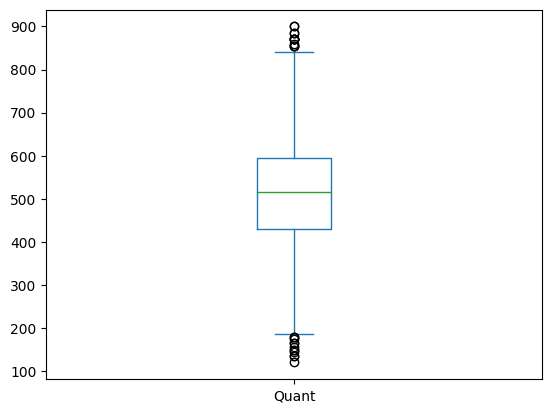

In [ ]:
df_numerical['Quant'].plot(kind='box')

<Axes: ylabel='Frequency'>

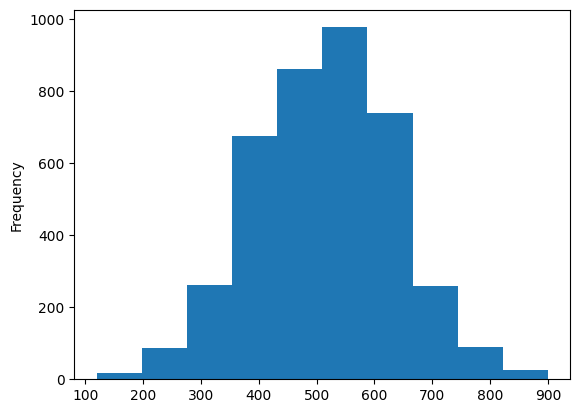

In [ ]:
df_numerical['Quant'].plot(kind='hist')

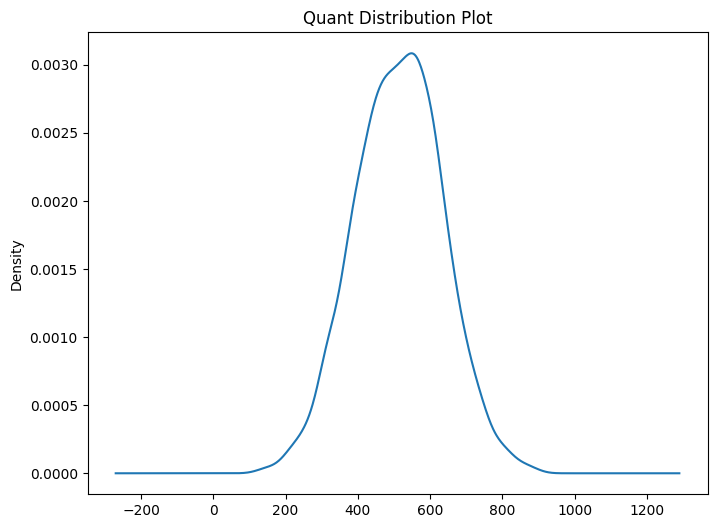

In [17]:
df_numerical.Quant.plot(kind='kde', title="Quant Distribution Plot", figsize=(8,6))
plt.show()

In [ ]:
print('the mean score of Quant  is ',  df_numerical['Quant'].mean())
print('the minimum score of Quant is ',df_numerical['Quant'].min())
print('the maximum score of Quant is ',df_numerical['Quant'].max())

the mean score of Quant  is  513.3365023767826
the minimum score of Quant is  120
the maximum score of Quant is  900


In [ ]:
iq25_Sal=df_numerical['Quant'].quantile(0.25)
iq50_Sal=df_numerical['Quant'].quantile(0.50)
iq75_Sal=df_numerical['Quant'].quantile(0.75)
iq100_Sal=df_numerical['Quant'].quantile(1)
print("for  Quant")
print("25th quantile value is :",iq25_Sal)
print("50th quantile value is :",iq50_Sal)
print("75th quantile value is :",iq75_Sal)
print("100th quantile value is :",iq100_Sal)

for  Quant
25th quantile value is : 430.0
50th quantile value is : 515.0
75th quantile value is : 595.0
100th quantile value is : 900.0


Observation:
*  Candidates Higest Scores in AMCAT Quantitative section is : 900
*  Candidates Lowest Scores in AMCAT Quantitative section is : 120
*   Candidates Average Scores in AMCAT Quantitative section is : 513
*   Quant Column have normal distribution
*   Quant Column Have many Outlier







**Domain**
Continuous/ Standardized
Scores in AMCAT’s domain module



In [ ]:
df_numerical['Domain'].value_counts()

-1.000000    246
 0.622643    113
 0.538387    110
 0.486747    106
 0.744758    103
            ... 
 0.999250      1
 0.010995      1
 0.639587      1
 0.031150      1
 0.938588      1
Name: Domain, Length: 243, dtype: int64

<Axes: ylabel='Frequency'>

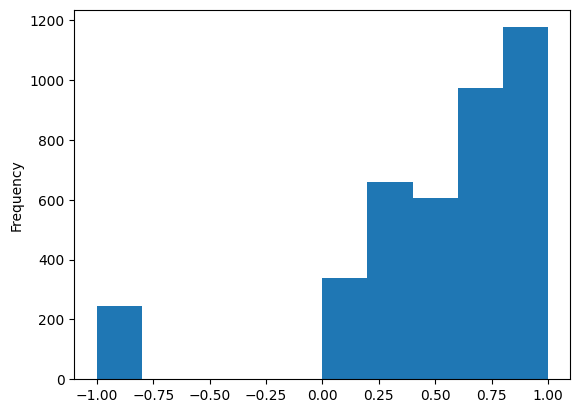

In [ ]:
df_numerical['Domain'].plot(kind='hist')

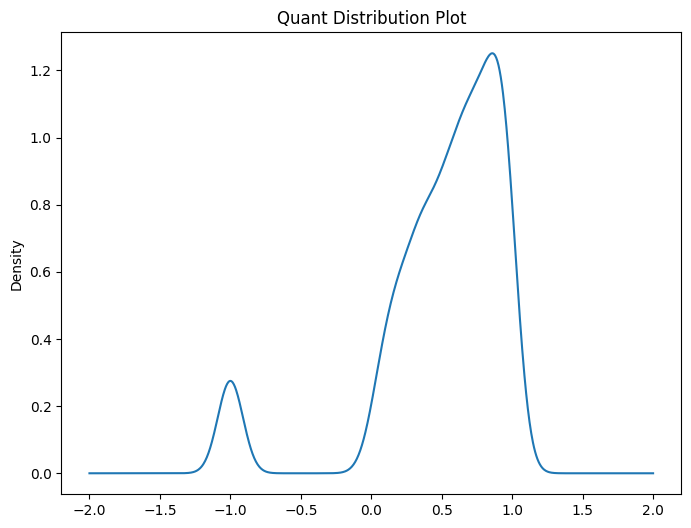

In [18]:
df_numerical.Domain.plot(kind='kde', title="Quant Distribution Plot", figsize=(8,6))
plt.show()

<Axes: >

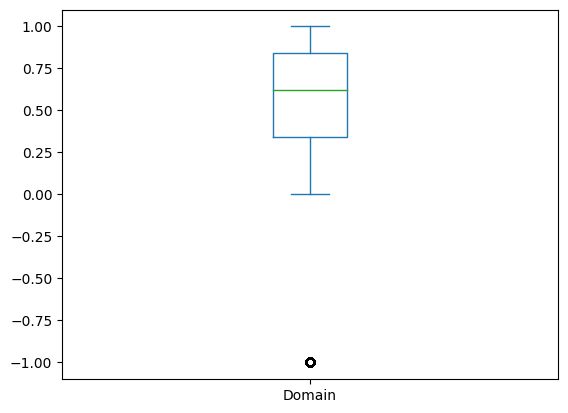

In [ ]:
df_numerical['Domain'].plot(kind='box')

In [ ]:
print('the mean score of Domain  is ',  df_numerical['Domain'].mean())
print('the minimum score of Domain is ',df_numerical['Domain'].min())
print('the maximum score of Domain is ',df_numerical['Domain'].max())

the mean score of Domain  is  0.5104283856900839
the minimum score of Domain is  -1.0
the maximum score of Domain is  0.999910407631314


In [ ]:
iq25_Sal=df_numerical['Domain'].quantile(0.25)
iq50_Sal=df_numerical['Domain'].quantile(0.50)
iq75_Sal=df_numerical['Domain'].quantile(0.75)
iq100_Sal=df_numerical['Domain'].quantile(1)
print("for  Domain")
print("25th quantile value is :",iq25_Sal)
print("50th quantile value is :",iq50_Sal)
print("75th quantile value is :",iq75_Sal)
print("100th quantile value is :",iq100_Sal)

for  Domain
25th quantile value is : 0.342314899911815
50th quantile value is : 0.622642915849938
75th quantile value is : 0.842248322257836
100th quantile value is : 0.999910407631314


Observation:

*   Candidates Higest Scores in AMCAT Domain section is : 0.99
*   Candidates Lowest Scores in AMCAT Domain section is : -1.0
*   Candidates Average Scores in AMCAT Domain section is : 0.5








**ComputerProgramming**
Continuous
Score in AMCAT’s Computer programming
section



In [20]:
df_numerical.ComputerProgramming.value_counts()

-1      868
 445    151
 435    144
 475    139
 465    134
       ... 
 214      1
 494      1
 840      1
 394      1
 554      1
Name: ComputerProgramming, Length: 79, dtype: int64

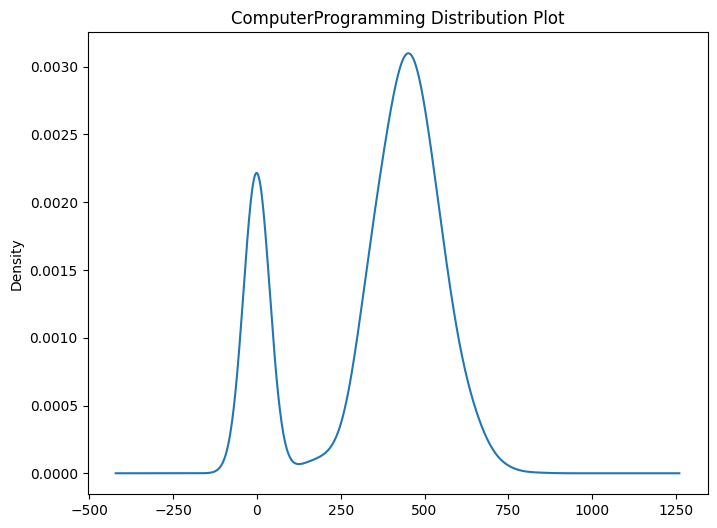

In [19]:
df_numerical.ComputerProgramming.plot(kind='kde', title="ComputerProgramming Distribution Plot", figsize=(8,6))
plt.show()

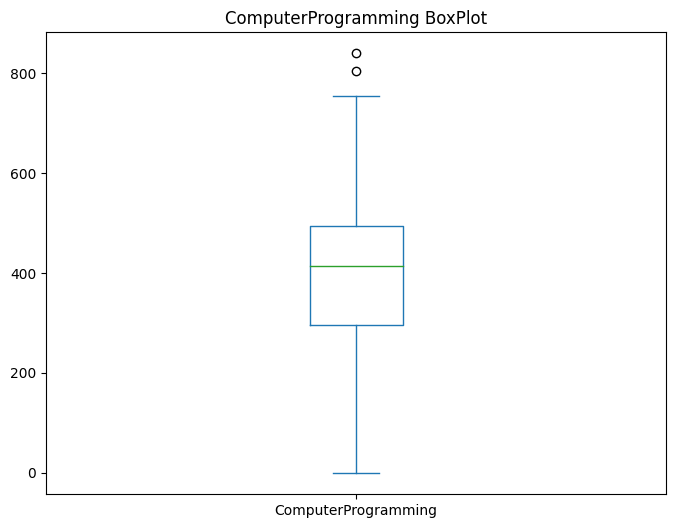

In [21]:
df_numerical.ComputerProgramming.plot(kind='box', title="ComputerProgramming BoxPlot", figsize=(8,6))
plt.show()

In [22]:
print("Minimum ComputerProgramming Score   : ", df_numerical['ComputerProgramming'].min())
print("Maximum ComputerProgramming Score   : ", df_numerical['ComputerProgramming'].max())
print("Mean ComputerProgramming Score      : ", (df_numerical['ComputerProgramming'].mean()))
print("Median ComputerProgramming Score    : ", (df_numerical['ComputerProgramming'].median()))
print("Standard ComputerProgramming Values : ", (df_numerical['ComputerProgramming'].std()))

Minimum ComputerProgramming Score   :  -1
Maximum ComputerProgramming Score   :  840
Mean ComputerProgramming Score      :  353.10280140070034
Median ComputerProgramming Score    :  415.0
Standard ComputerProgramming Values :  205.35551941492028


In [29]:
print("25 Percentile  : ",(df_numerical['ComputerProgramming'].quantile(0.25)))
print("50 Percentile  : ",(df_numerical['ComputerProgramming'].quantile(0.50)))
print("60 Percentile  : ",(df_numerical['ComputerProgramming'].quantile(0.60)))
print("75 Percentile  : ",(df_numerical['ComputerProgramming'].quantile(0.75)))
print("80 Percentile  : ",(df_numerical['ComputerProgramming'].quantile(0.80)))
print("90 Percentile  : ",(df_numerical['ComputerProgramming'].quantile(0.90)))
print("100 Percentile : ",(df_numerical['ComputerProgramming'].quantile(1.00)))
print("10th Percentile : ",(df_numerical['ComputerProgramming'].quantile(0.10)))
print("15th Percentile : ",(df_numerical['ComputerProgramming'].quantile(0.15)))
print("20th Percentile : ",(df_numerical['ComputerProgramming'].quantile(0.20)))
print("23th Percentile : ",(df_numerical['ComputerProgramming'].quantile(0.23)))

25 Percentile  :  295.0
50 Percentile  :  415.0
60 Percentile  :  445.0
75 Percentile  :  495.0
80 Percentile  :  515.0
90 Percentile  :  555.0
100 Percentile :  840.0
10th Percentile :  -1.0
15th Percentile :  -1.0
20th Percentile :  -1.0
23th Percentile :  235.0




Observation:


*   Candidates Higest Scores in AMCAT ComputerProgramming section is : 840
*   Candidates Lowest Scores in AMCAT ComputerProgramming section is : -1

*   Candidates Average Scores in AMCAT ComputerProgramming section is : 415
*   ComputerProgramming Column Have Outlier




**ElectronicsAndSemicon**
Continuous
Score in AMCAT’s Electronics & Semiconductor Engineering section



In [30]:
df_numerical.ElectronicsAndSemicon.value_counts()


-1      2854
 333     124
 300     114
 366     103
 266      88
 400      84
 292      74
 324      66
 356      66
 233      53
 388      47
 433      46
 200      43
 260      36
 466      31
 452      29
 228      24
 500      23
 420      22
 196      16
 166      12
 484      10
 516       9
 533       6
 548       5
 566       4
 133       4
 164       3
 612       2
Name: ElectronicsAndSemicon, dtype: int64

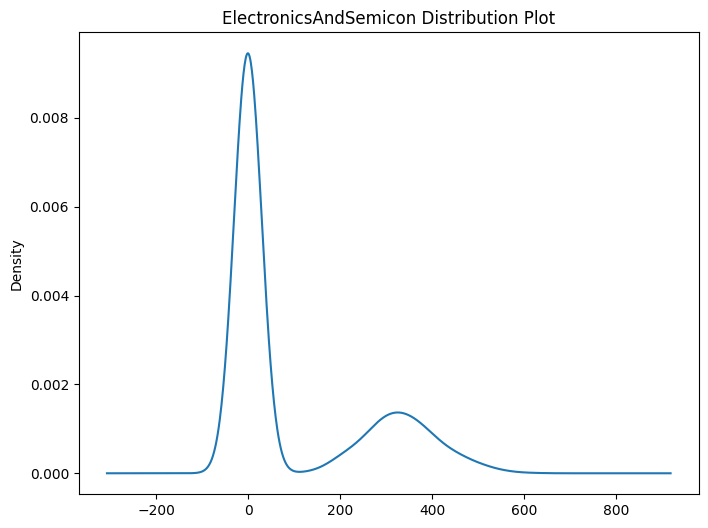

In [31]:
df_numerical.ElectronicsAndSemicon.plot(kind='kde', title="ElectronicsAndSemicon Distribution Plot", figsize=(8,6))
plt.show()

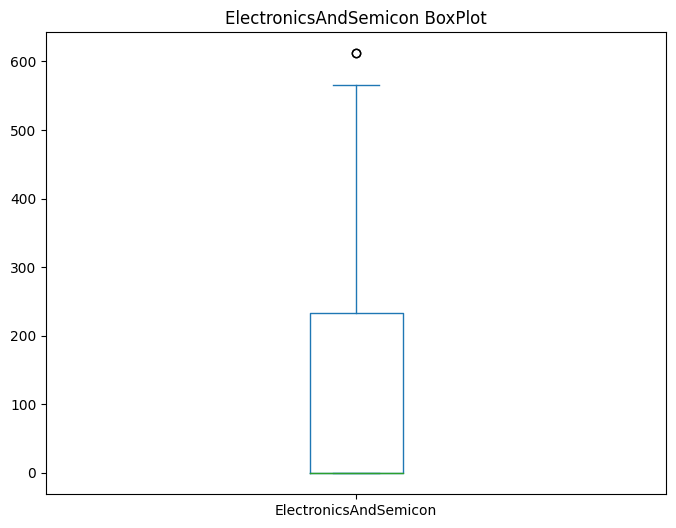

In [32]:
df_numerical.ElectronicsAndSemicon.plot(kind='box', title="ElectronicsAndSemicon BoxPlot", figsize=(8,6))
plt.show()

In [33]:
print("Minimum ElectronicsAndSemicon Score   : ", df_numerical['ElectronicsAndSemicon'].min())
print("Maximum ElectronicsAndSemicon Score   : ", df_numerical['ElectronicsAndSemicon'].max())
print("Mean ElectronicsAndSemicon Score      : ", (df_numerical['ElectronicsAndSemicon'].mean()))
print("Median ElectronicsAndSemicon Score    : ", (df_numerical['ElectronicsAndSemicon'].median()))
print("Standard ElectronicsAndSemicon Values : ", (df_numerical['ElectronicsAndSemicon'].std()))

Minimum ElectronicsAndSemicon Score   :  -1
Maximum ElectronicsAndSemicon Score   :  612
Mean ElectronicsAndSemicon Score      :  95.32841420710355
Median ElectronicsAndSemicon Score    :  -1.0
Standard ElectronicsAndSemicon Values :  158.24121827263218


In [35]:
print("25 Percentile  : ",(df_numerical['ElectronicsAndSemicon'].quantile(0.25)))
print("50 Percentile  : ",(df_numerical['ElectronicsAndSemicon'].quantile(0.50)))
print("60 Percentile  : ",(df_numerical['ElectronicsAndSemicon'].quantile(0.60)))
print("75 Percentile  : ",(df_numerical['ElectronicsAndSemicon'].quantile(0.75)))
print("80 Percentile  : ",(df_numerical['ElectronicsAndSemicon'].quantile(0.80)))
print("90 Percentile  : ",(df_numerical['ElectronicsAndSemicon'].quantile(0.90)))
print("100 Percentile : ",(df_numerical['ElectronicsAndSemicon'].quantile(1.00)))

25 Percentile  :  -1.0
50 Percentile  :  -1.0
60 Percentile  :  -1.0
75 Percentile  :  233.0
80 Percentile  :  292.0
90 Percentile  :  366.0
100 Percentile :  612.0



Observation:

*   Candidates Higest Scores in AMCAT Electronics & Semiconductor Engineering section is : 612
*  Candidates Lowest Scores in AMCAT Electronics & Semiconductor Engineering section is : -1
*   Candidates Average Scores in AMCAT Electronics & Semiconductor Engineering section is : -1
*   ElectronicsAndSemicon Column Have only one Outlier





**ComputerScience**
Continuous
 
Score in AMCAT’s Computer Science section



In [36]:
df_numerical.ComputerScience.value_counts()

-1      3096
 407     128
 376     123
 346     118
 438     111
 469      80
 315      77
 500      64
 284      50
 530      45
 253      30
 561      22
 223      14
 592      14
 623      10
 653       9
 192       3
 715       2
 684       1
 130       1
Name: ComputerScience, dtype: int64

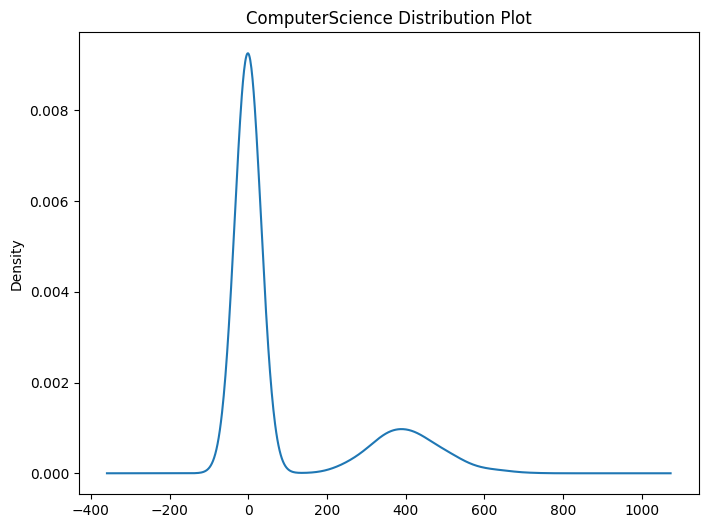

In [37]:
df_numerical.ComputerScience.plot(kind='kde', title="ComputerScience Distribution Plot", figsize=(8,6))
plt.show()

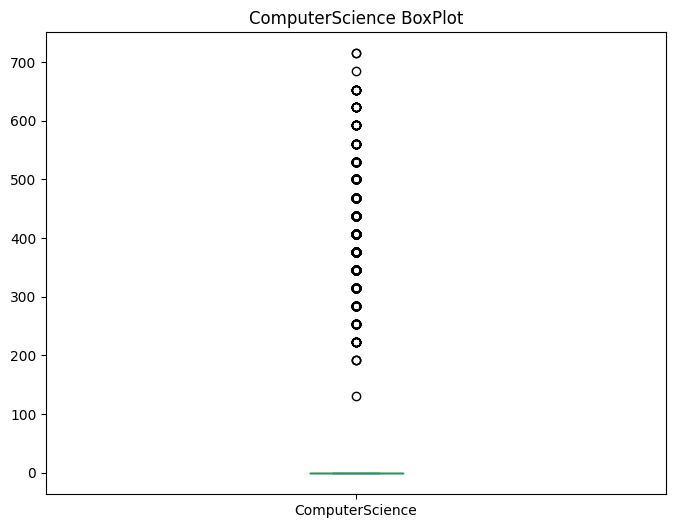

In [38]:
df_numerical.ComputerScience.plot(kind='box', title="ComputerScience BoxPlot", figsize=(8,6))
plt.show()

In [40]:
print("Minimum ComputerScience Score   : ", df_numerical['ComputerScience'].min())
print("Maximum ComputerScience Score   : ", df_numerical['ComputerScience'].max())
print("Mean ComputerScience Score      : ", df_numerical['ComputerScience'].mean())
print("Median ComputerScience Score    : ", df_numerical['ComputerScience'].median())
print("Standard ComputerScience Values : ", df_numerical['ComputerScience'].std())

Minimum ComputerScience Score   :  -1
Maximum ComputerScience Score   :  715
Mean ComputerScience Score      :  90.7423711855928
Median ComputerScience Score    :  -1.0
Standard ComputerScience Values :  175.2730830755778


In [41]:
print("25 Percentile  : ",(df_numerical['ComputerScience'].quantile(0.25)))
print("50 Percentile  : ",(df_numerical['ComputerScience'].quantile(0.50)))
print("60 Percentile  : ",(df_numerical['ComputerScience'].quantile(0.60)))
print("75 Percentile  : ",(df_numerical['ComputerScience'].quantile(0.75)))
print("80 Percentile  : ",(df_numerical['ComputerScience'].quantile(0.80)))
print("90 Percentile  : ",(df_numerical['ComputerScience'].quantile(0.90)))
print("100 Percentile : ",(df_numerical['ComputerScience'].quantile(1.00)))

25 Percentile  :  -1.0
50 Percentile  :  -1.0
60 Percentile  :  -1.0
75 Percentile  :  -1.0
80 Percentile  :  315.0
90 Percentile  :  407.0
100 Percentile :  -1.0


Observation:

*   Candidates Higest Scores in AMCAT Computer Science section is : 715
*   Candidates Lowest Scores in AMCAT Computer Science section is : -1
*   Candidates Average Scores in AMCAT Computer Science section is : -1
*   ComputerScience Column Have too many Outlier



**MechanicalEngg**
Continuous
Score in AMCAT’s Mechanical Engineering
section



In [42]:
df_numerical.MechanicalEngg.value_counts()

-1      3763
 366      20
 446      16
 438      15
 420      14
 376      13
 313      13
 393      13
 407      12
 346      11
 469      10
 473      10
 553       8
 435       7
 383       6
 340       6
 526       5
 409       5
 286       5
 500       4
 253       4
 284       3
 332       3
 538       3
 254       3
 580       3
 616       2
 564       2
 606       2
 223       2
 512       2
 561       2
 260       2
 358       1
 280       1
 315       1
 233       1
 306       1
 461       1
 180       1
 206       1
 623       1
Name: MechanicalEngg, dtype: int64

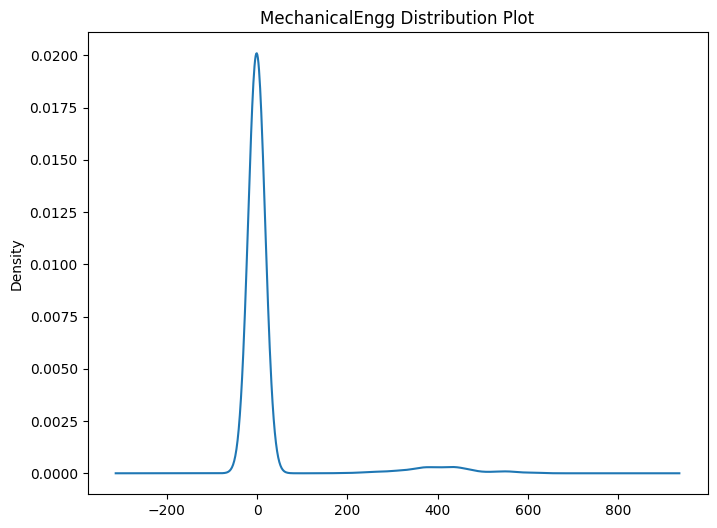

In [43]:
df_numerical.MechanicalEngg.plot(kind='kde', title="MechanicalEngg Distribution Plot", figsize=(8,6))
plt.show()

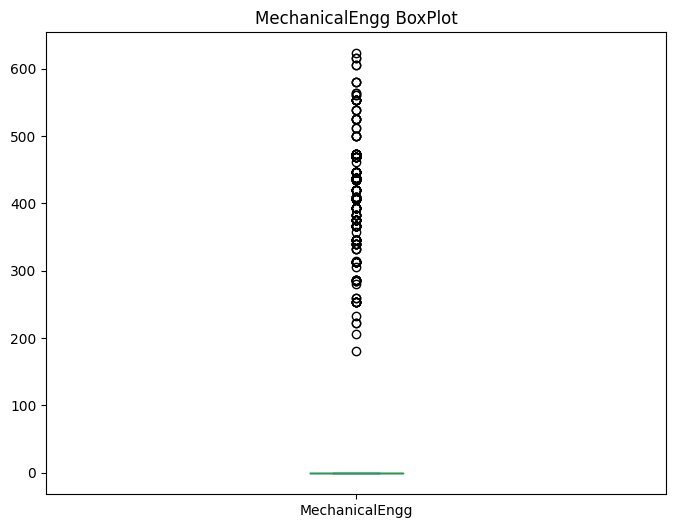

In [44]:
df_numerical.MechanicalEngg.plot(kind='box', title="MechanicalEngg BoxPlot", figsize=(8,6))
plt.show()

In [45]:
print("Minimum MechanicalEngg Score   : ", df_numerical['MechanicalEngg'].min())
print("Maximum MechanicalEngg Score   : ", df_numerical['MechanicalEngg'].max())
print("Mean MechanicalEngg Score      : ", (df_numerical['MechanicalEngg'].mean()))
print("Median MechanicalEngg Score    : ", (df_numerical['MechanicalEngg'].median()))
print("Standard MechanicalEngg Values : ", (df_numerical['MechanicalEngg'].std()))

Minimum MechanicalEngg Score   :  -1
Maximum MechanicalEngg Score   :  623
Mean MechanicalEngg Score      :  22.97473736868434
Median MechanicalEngg Score    :  -1.0
Standard MechanicalEngg Values :  98.1233114520005


In [46]:

print("25 Percentile : ",df_numerical['MechanicalEngg'].quantile(0.25))
print("50 Percentile  : ",(df_numerical['MechanicalEngg'].quantile(0.50)))
print("60 Percentile  : ",df_numerical['MechanicalEngg'].quantile(0.60))
print("75 Percentile  : ",(df_numerical['MechanicalEngg'].quantile(0.75)))
print("80 Percentile  : ",(df_numerical['MechanicalEngg'].quantile(0.80)))
print("90 Percentile  : ",(df_numerical['MechanicalEngg'].quantile(0.90)))
print("100 Percentile : ",(df_numerical['MechanicalEngg'].quantile(1.00)))

25 Percentile :  -1.0
50 Percentile  :  -1.0
60 Percentile  :  -1.0
75 Percentile  :  -1.0
80 Percentile  :  -1.0
90 Percentile  :  -1.0
100 Percentile :  623.0



Observation:


*   Candidates Higest Score in AMCAT’s Mechanical Engineering section is : 623
*   Candidates Lowest Score in AMCAT’s Mechanical Engineering section is : -1
*   Candidates Average Score in AMCAT’s Mechanical Engineering section is : -1
*   MechanicalEngg Column Have too many Outlier
*   MechanicalEngg Column have skewed distribution







**ElectricalEngg**
Continuous
Score in AMCAT’s Electrical Engineering section



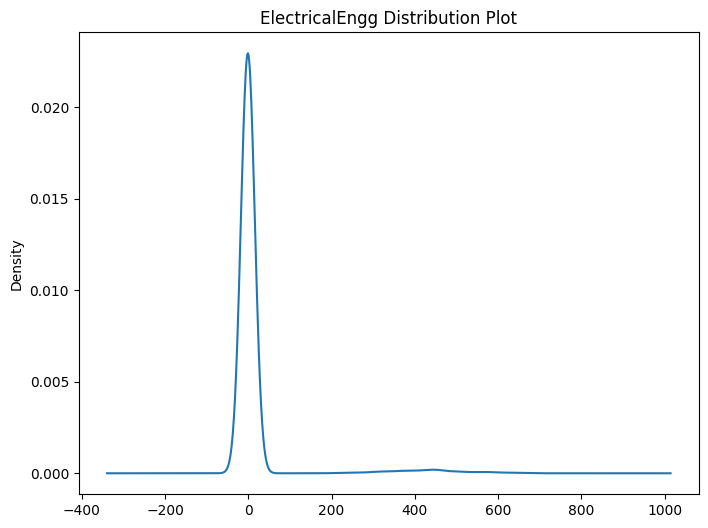

In [48]:
df_numerical.ElectricalEngg.plot(kind='kde', title="ElectricalEngg Distribution Plot", figsize=(8,6))
plt.show()

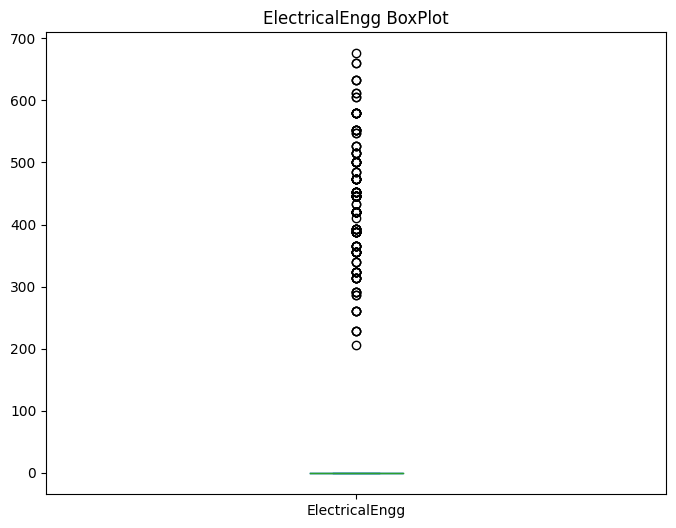

In [49]:
df_numerical.ElectricalEngg.plot(kind='box', title="ElectricalEngg BoxPlot", figsize=(8,6))
plt.show()

In [50]:
print("Minimum ElectricalEngg Score   : ", df_numerical['ElectricalEngg'].min())
print("Maximum ElectricalEngg Score   : ", df_numerical['ElectricalEngg'].max())
print("Mean ElectricalEngg Score      : ", (df_numerical['ElectricalEngg'].mean()))
print("Median ElectricalEngg Score    : ", (df_numerical['ElectricalEngg'].median()))
print("Standard ElectricalEngg Values : ", (df_numerical['ElectricalEngg'].std()))

Minimum ElectricalEngg Score   :  -1
Maximum ElectricalEngg Score   :  676
Mean ElectricalEngg Score      :  16.478739369684842
Median ElectricalEngg Score    :  -1.0
Standard ElectricalEngg Values :  87.58563441414582


In [52]:
print("25 Percentile  : ",(df_numerical['ElectricalEngg'].quantile(0.25)))
print("50 Percentile  : ",(df_numerical['ElectricalEngg'].quantile(0.50)))
print("60 Percentile  : ",(df_numerical['ElectricalEngg'].quantile(0.60)))
print("75 Percentile  : ",(df_numerical['ElectricalEngg'].quantile(0.75)))
print("80 Percentile  : ",(df_numerical['ElectricalEngg'].quantile(0.80)))
print("90 Percentile  : ",(df_numerical['ElectricalEngg'].quantile(0.90)))
print("100 Percentile : ",(df_numerical['ElectricalEngg'].quantile(1.00)))

25 Percentile  :  -1.0
50 Percentile  :  -1.0
60 Percentile  :  -1.0
75 Percentile  :  -1.0
80 Percentile  :  -1.0
90 Percentile  :  -1.0
100 Percentile :  676.0



Observation:
*   Candidates Higest Score in AMCAT’s Electrical Engineering section is : 676
*   Candidates Lowest Score in AMCAT’s Electrical Engineering section is : -1
*   Candidates Average Score in AMCAT’s Electrical Engineering section is : -1
*   ElectricalEngg Column have left skewed distribution
*   ElectricalEngg Column Have too many Outlier











**TelecomEngg**
Continuous
Score in AMCAT’s Telecommunication Engineering section



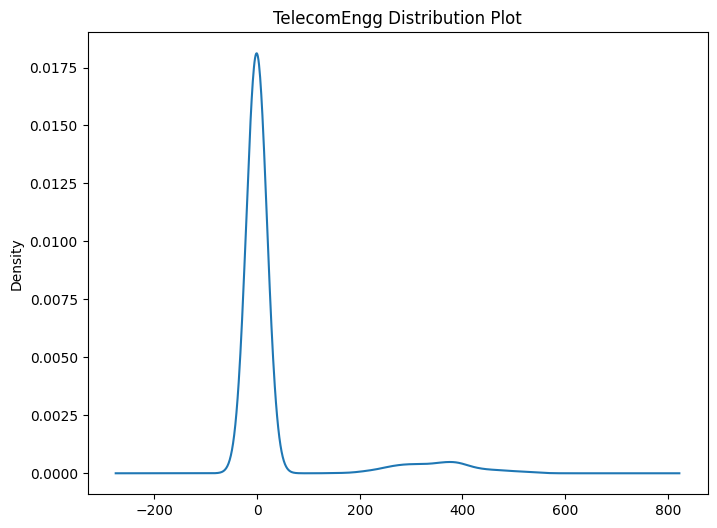

In [5]:
df_numerical.TelecomEngg.plot(kind='kde', title="TelecomEngg Distribution Plot", figsize=(8,6))
plt.show()

In [ ]:
df.TelecomEngg.plot(kind='box', title="TelecomEngg BoxPlot", figsize=(8,6))
plt.show()

In [6]:
print("Minimum ElectricalEngg Score   : ", df_numerical['TelecomEngg'].min())
print("Maximum ElectricalEngg Score   : ", df_numerical['TelecomEngg'].max())
print("Mean ElectricalEngg Score      : ", round(df_numerical['TelecomEngg'].mean()))
print("Median ElectricalEngg Score    : ", round(df_numerical['TelecomEngg'].median()))
print("Standard ElectricalEngg Values : ", round(df_numerical['TelecomEngg'].std()))

Minimum ElectricalEngg Score   :  -1
Maximum ElectricalEngg Score   :  548
Mean ElectricalEngg Score      :  32
Median ElectricalEngg Score    :  -1
Standard ElectricalEngg Values :  105


In [7]:
print("25 Percentile  : ",round(df_numerical['TelecomEngg'].quantile(0.25)))
print("50 Percentile  : ",round(df_numerical['TelecomEngg'].quantile(0.50)))
print("60 Percentile  : ",round(df_numerical['TelecomEngg'].quantile(0.60)))
print("75 Percentile  : ",round(df_numerical['TelecomEngg'].quantile(0.75)))
print("80 Percentile  : ",round(df_numerical['TelecomEngg'].quantile(0.80)))
print("90 Percentile  : ",round(df_numerical['TelecomEngg'].quantile(0.90)))
print("100 Percentile : ",round(df_numerical['TelecomEngg'].quantile(1.00)))

25 Percentile  :  -1
50 Percentile  :  -1
60 Percentile  :  -1
75 Percentile  :  -1
80 Percentile  :  -1
90 Percentile  :  -1
100 Percentile :  548



*   Candidates Higest Score in AMCAT’s Telecommunication Engineering section is : 548
*   Candidates Lowest Score in AMCAT’s Telecommunication Engineering section is : -1
*   Candidates Average Score in AMCAT’s Telecommunication Engineering section is : -1
*   TelecomEngg Column have left skewed distribution
*   TelecomEngg Column Have too many Outlier












**CivilEngg**
Continuous
Score in AMCAT’s Civil Engineering section



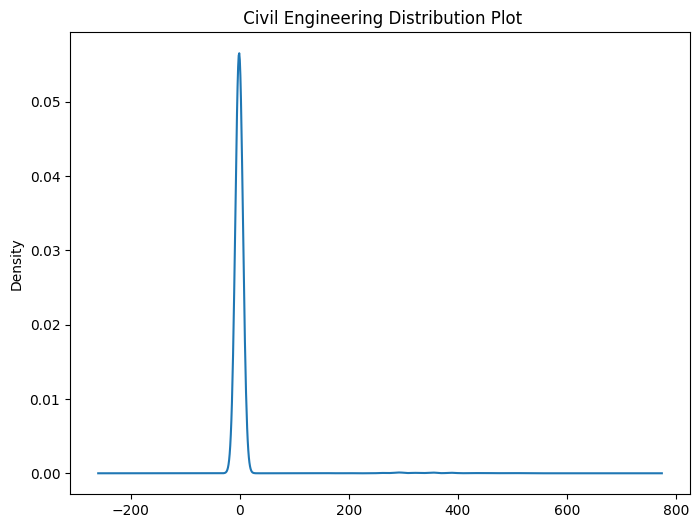

In [8]:
df_numerical.CivilEngg.plot(kind='kde', title=" Civil Engineering Distribution Plot", figsize=(8,6))
plt.show()

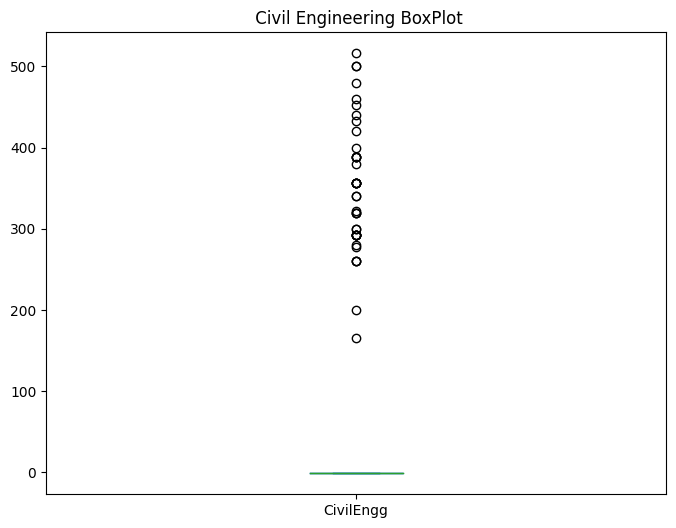

In [9]:
df_numerical.CivilEngg.plot(kind='box', title=" Civil Engineering BoxPlot", figsize=(8,6))
plt.show()

In [10]:
print("Minimum CivilEngg Score   : ", df_numerical['CivilEngg'].min())
print("Maximum CivilEngg Score   : ", df_numerical['CivilEngg'].max())
print("Mean CivilEngg Score      : ", round(df_numerical['CivilEngg'].mean()))
print("Median CivilEngg Score    : ", round(df_numerical['CivilEngg'].median()))
print("Standard CivilEngg Values : ", round(df_numerical['CivilEngg'].std()))

Minimum CivilEngg Score   :  -1
Maximum CivilEngg Score   :  516
Mean CivilEngg Score      :  3
Median CivilEngg Score    :  -1
Standard CivilEngg Values :  37


In [12]:
print("25 Percentile  : ",round(df_numerical['CivilEngg'].quantile(0.25)))
print("50 Percentile  : ",round(df_numerical['CivilEngg'].quantile(0.50)))
print("60 Percentile  : ",round(df_numerical['CivilEngg'].quantile(0.60)))
print("75 Percentile  : ",round(df_numerical['CivilEngg'].quantile(0.75)))
print("80 Percentile  : ",round(df_numerical['CivilEngg'].quantile(0.80)))
print("90 Percentile  : ",round(df_numerical['CivilEngg'].quantile(0.90)))
print("100 Percentile : ",round(df_numerical['CivilEngg'].quantile(1.00)))

25 Percentile  :  -1
50 Percentile  :  -1
60 Percentile  :  -1
75 Percentile  :  -1
80 Percentile  :  -1
90 Percentile  :  -1
100 Percentile :  516


Observation:


*   Candidates Higest Score in AMCAT’s Civil Engineering section is : 516
*   Candidates Lowest Score in AMCAT’s Civil Engineering  section is : -1
*   Candidates Average Score in AMCAT’s Civil Engineering  section is : -1
*   TelecomEngg Column have left skewed distribution
*   Civil Engineering Column Have too many Outlier


**conscientiousness**
Continuous/ Standardized
Scores in one of the sections of AMCAT’s personality test



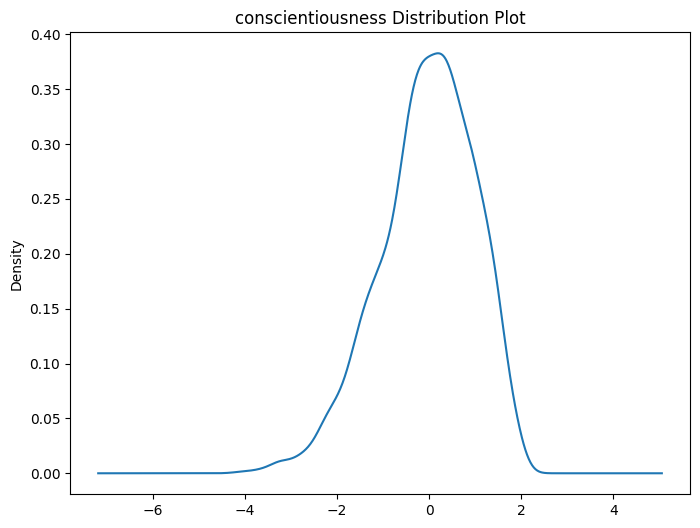

In [13]:
df_numerical.conscientiousness.plot(kind='kde', title="conscientiousness Distribution Plot", figsize=(8,6))
plt.show()

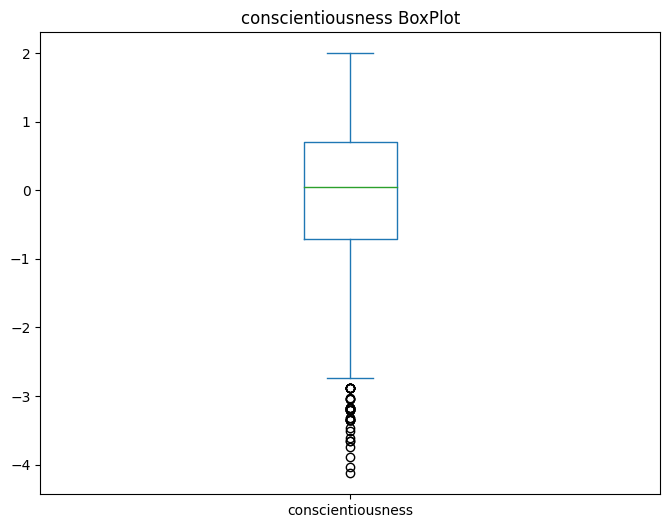

In [14]:
df_numerical.conscientiousness.plot(kind='box', title="conscientiousness BoxPlot", figsize=(8,6))
plt.show()

In [15]:
print("Minimum conscientiousness Score   : ", df_numerical['conscientiousness'].min())
print("Maximum conscientiousness Score   : ", df_numerical['conscientiousness'].max())
print("Mean conscientiousness Score      : ", round(df_numerical['conscientiousness'].mean()))
print("Median conscientiousness Score    : ", round(df_numerical['conscientiousness'].median()))
print("Standard conscientiousness Values : ", round(df_numerical['conscientiousness'].std()))

Minimum conscientiousness Score   :  -4.1267
Maximum conscientiousness Score   :  1.9953
Mean conscientiousness Score      :  0
Median conscientiousness Score    :  0
Standard conscientiousness Values :  1


In [16]:
print("25 Percentile  : ",round(df_numerical['conscientiousness'].quantile(0.25)))
print("50 Percentile  : ",round(df_numerical['conscientiousness'].quantile(0.50)))
print("60 Percentile  : ",round(df_numerical['conscientiousness'].quantile(0.60)))
print("75 Percentile  : ",round(df_numerical['conscientiousness'].quantile(0.75)))
print("80 Percentile  : ",round(df_numerical['conscientiousness'].quantile(0.80)))
print("90 Percentile  : ",round(df_numerical['conscientiousness'].quantile(0.90)))
print("100 Percentile : ",round(df_numerical['conscientiousness'].quantile(1.00)))

25 Percentile  :  -1
50 Percentile  :  0
60 Percentile  :  0
75 Percentile  :  1
80 Percentile  :  1
90 Percentile  :  1
100 Percentile :  2


Observation:

*   Candidates Higest Score in AMCAT’s personality test is : 1.9
*   Candidates Lowest Score in AMCAT’s personality test is : -4.12
*   Candidates Average Score in AMCAT’s personality test is : 0
*   conscientiousness Column have right skewed distribution
*   conscientiousness Column Have too many Outlier









**agreeableness**
Continuous/
Standardized
Scores in one of the sections of AMCAT’s
personality test



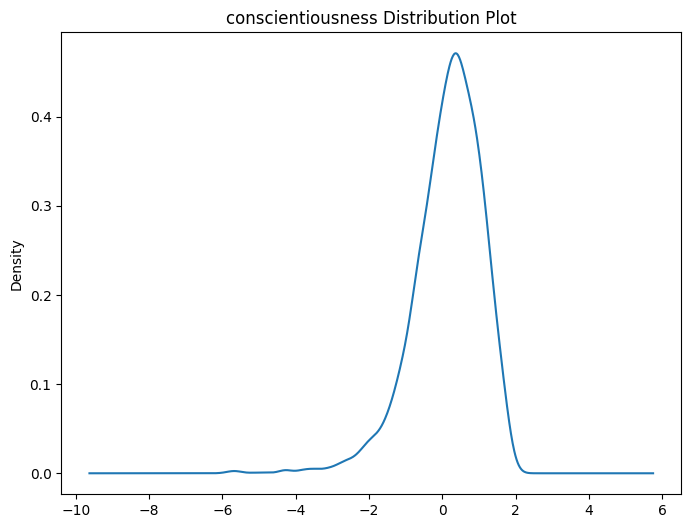

In [17]:
df_numerical.agreeableness.plot(kind='kde', title="conscientiousness Distribution Plot", figsize=(8,6))
plt.show()

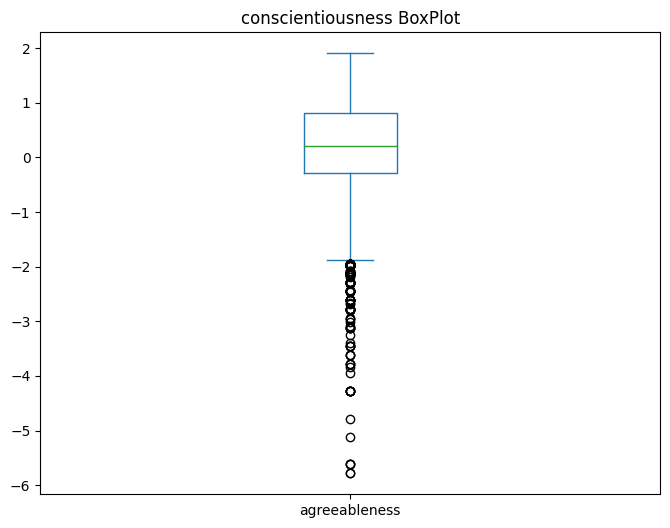

In [18]:
df_numerical.agreeableness.plot(kind='box', title="conscientiousness BoxPlot", figsize=(8,6))
plt.show()

In [19]:
print("Minimum agreeableness Score   : ", df_numerical['agreeableness'].min())
print("Maximum agreeableness Score   : ", df_numerical['agreeableness'].max())
print("Mean agreeableness Score      : ", round(df_numerical['agreeableness'].mean()))
print("Median agreeableness Score    : ", round(df_numerical['agreeableness'].median()))
print("Standard agreeableness Values : ", round(df_numerical['agreeableness'].std()))

Minimum agreeableness Score   :  -5.7816
Maximum agreeableness Score   :  1.9048
Mean agreeableness Score      :  0
Median agreeableness Score    :  0
Standard agreeableness Values :  1


In [20]:
print("25 Percentile  : ",round(df_numerical['agreeableness'].quantile(0.25)))
print("50 Percentile  : ",round(df['agreeableness'].quantile(0.50)))
print("60 Percentile  : ",round(df_numerical['agreeableness'].quantile(0.60)))
print("75 Percentile  : ",round(df_numerical['agreeableness'].quantile(0.75)))
print("80 Percentile  : ",round(df_numerical['agreeableness'].quantile(0.80)))
print("90 Percentile  : ",round(df_numerical['agreeableness'].quantile(0.90)))
print("100 Percentile : ",round(df_numerical['agreeableness'].quantile(1.00)))

25 Percentile  :  0
50 Percentile  :  0
60 Percentile  :  1
75 Percentile  :  1
80 Percentile  :  1
90 Percentile  :  1
100 Percentile :  2




Observations:


*   Candidates Higest Score in AMCAT’s personality test is : 1.9
*   Candidates Lowest Score in AMCAT’s personality test is : -5.78
*   Candidates Average Score in AMCAT’s personality test is : 0
*   agreeableness Column have right skewed distribution
*   agreeableness Column Have too many Outlier








**extraversion**
Continuous/ Standardized
Scores in one of the sections of AMCAT’s personality test



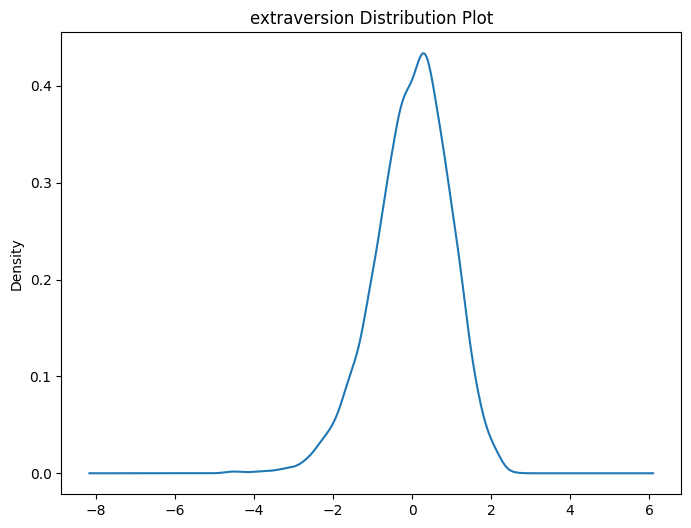

In [21]:
df_numerical.extraversion.plot(kind='kde', title="extraversion Distribution Plot", figsize=(8,6))
plt.show()

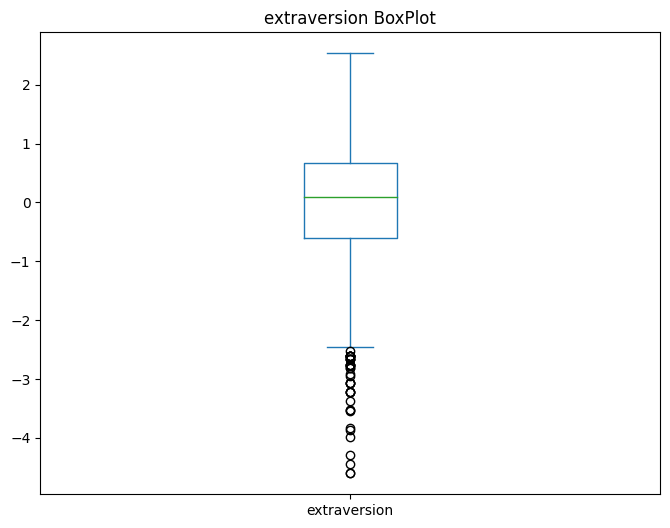

In [22]:
df_numerical.extraversion.plot(kind='box', title="extraversion BoxPlot", figsize=(8,6))
plt.show()

In [24]:
print("Minimum extraversion Score   : ", df_numerical['extraversion'].min())
print("Maximum extraversion Score   : ", df_numerical['extraversion'].max())
print("Mean extraversion Score      : ", round(df_numerical['extraversion'].mean()))
print("Median extraversion Score    : ", round(df_numerical['extraversion'].median()))
print("Standard extraversion Values : ", round(df_numerical['extraversion'].std()))

Minimum extraversion Score   :  -4.6009
Maximum extraversion Score   :  2.5354
Mean extraversion Score      :  0
Median extraversion Score    :  0
Standard extraversion Values :  1


In [25]:
print("25 Percentile  : ",round(df_numerical['extraversion'].quantile(0.25)))
print("50 Percentile  : ",round(df_numerical['extraversion'].quantile(0.50)))
print("60 Percentile  : ",round(df_numerical['extraversion'].quantile(0.60)))
print("75 Percentile  : ",round(df_numerical['extraversion'].quantile(0.75)))
print("80 Percentile  : ",round(df_numerical['extraversion'].quantile(0.80)))
print("90 Percentile  : ",round(df_numerical['extraversion'].quantile(0.90)))
print("100 Percentile : ",round(df_numerical['extraversion'].quantile(1.00)))

25 Percentile  :  -1
50 Percentile  :  0
60 Percentile  :  0
75 Percentile  :  1
80 Percentile  :  1
90 Percentile  :  1
100 Percentile :  3



Observation
*   Candidates Higest Score in AMCAT’s personality test is : 2.53
*   Candidates Lowest Score in AMCAT’s personality test is : -4.60
*   Candidates Average Score in AMCAT’s personality test is : 0
*   extraversion Column have right skewed distribution
*   extraversion Column Have too many Outlier






**neuroticism**
Continuous/
Standardized
Scores in one of the sections of AMCAT’s
personality test



In [ ]:
df_numerical.nueroticism.plot(kind='kde', title="nueroticism Distribution Plot", figsize=(8,6))
plt.show()

In [ ]:
df_numerical.nueroticism.plot(kind='box', title="nueroticism BoxPlot", figsize=(8,6))
plt.show()

In [29]:
print("Minimum nueroticism Score   : ", df_numerical['nueroticism'].min())
print("Maximum nueroticism Score   : ",df_numerical['nueroticism'].max())
print("Mean nueroticism Score      : ", round(df_numerical['nueroticism'].mean()))
print("Median nueroticism Score    : ", round(df_numerical['nueroticism'].median()))
print("Standard nueroticism Values : ", round(df_numerical['nueroticism'].std()))

Minimum nueroticism Score   :  -2.643
Maximum nueroticism Score   :  3.3525
Mean nueroticism Score      :  0
Median nueroticism Score    :  0
Standard nueroticism Values :  1


In [33]:
print("25 Percentile  : ",round(df_numerical['nueroticism'].quantile(0.25)))
print("50 Percentile  : ",round(df_numerical['nueroticism'].quantile(0.50)))
print("60 Percentile  : ",round(df_numerical['nueroticism'].quantile(0.60)))
print("75 Percentile  : ",round(df_numerical['nueroticism'].quantile(0.75)))
print("80 Percentile  : ",round(df_numerical['nueroticism'].quantile(0.80)))
print("90 Percentile  : ",round(df_numerical['nueroticism'].quantile(0.90)))
print("100 Percentile : ",round(df_numerical['nueroticism'].quantile(0.100)))

25 Percentile  :  -1
50 Percentile  :  0
60 Percentile  :  0
75 Percentile  :  1
80 Percentile  :  1
90 Percentile  :  1
100 Percentile :  -2


In [ ]:
Candidates Higest Score in AMCAT’s personality test is : 3.35
Candidates Lowest Score in AMCAT’s personality test is : -2.64
Candidates Average Score in AMCAT’s personality test is : 0
nueroticism Column have right skewed distribution
nueroticism Column Have too many Outlier

**openess_to_experience**
Continuous/ Standardized
Scores in one of the sections of AMCAT’s personality test



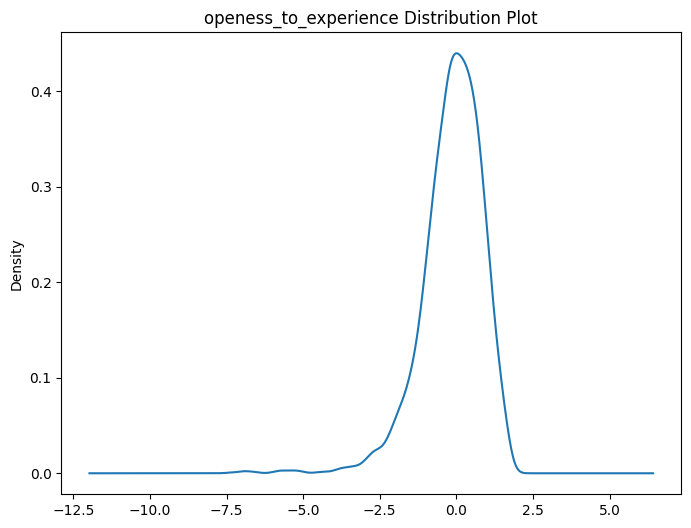

In [34]:
df.openess_to_experience.plot(kind='kde', title="openess_to_experience Distribution Plot", figsize=(8,6))
plt.show()

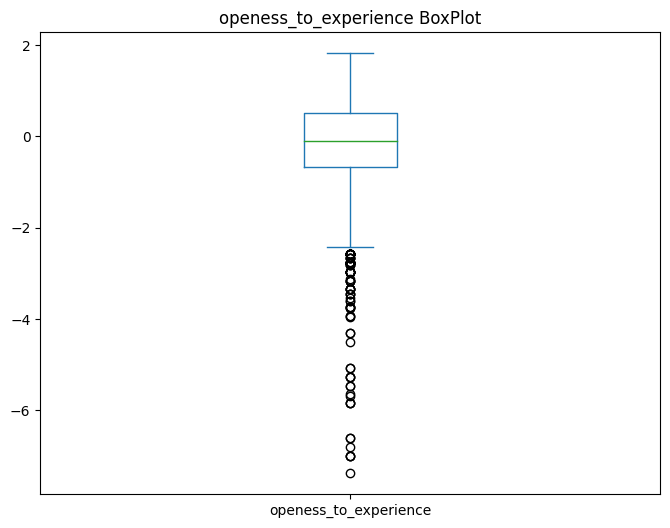

In [38]:
df_numerical.openess_to_experience.plot(kind='box', title="openess_to_experience BoxPlot", figsize=(8,6))
plt.show()

In [36]:
print("Minimum openess_to_experience Score   : ", df['openess_to_experience'].min())
print("Maximum openess_to_experience Score   : ", df['openess_to_experience'].max())
print("Mean openess_to_experience Score      : ", round(df['openess_to_experience'].mean()))
print("Median openess_to_experience Score    : ", round(df['openess_to_experience'].median()))
print("Standard openess_to_experience Values : ", round(df['openess_to_experience'].std()))

Minimum openess_to_experience Score   :  -7.3757
Maximum openess_to_experience Score   :  1.8224
Mean openess_to_experience Score      :  0
Median openess_to_experience Score    :  0
Standard openess_to_experience Values :  1


In [37]:
print("25 Percentile  : ",round(df['openess_to_experience'].quantile(0.25)))
print("50 Percentile  : ",round(df['openess_to_experience'].quantile(0.50)))
print("60 Percentile  : ",round(df['openess_to_experience'].quantile(0.60)))
print("75 Percentile  : ",round(df['openess_to_experience'].quantile(0.75)))
print("80 Percentile  : ",round(df['openess_to_experience'].quantile(0.80)))
print("90 Percentile  : ",round(df['openess_to_experience'].quantile(0.90)))
print("100 Percentile : ",round(df['openess_to_experience'].quantile(0.100)))

25 Percentile  :  -1
50 Percentile  :  0
60 Percentile  :  0
75 Percentile  :  1
80 Percentile  :  1
90 Percentile  :  1
100 Percentile :  -1


Candidates Higest Score in AMCAT’s personality test is : 1.8
Candidates Lowest Score in AMCAT’s personality test is : -7.37
Candidates Average Score in AMCAT’s personality test is : 0
openess_to_experience Column have right skewed distribution
openess_to_experience Column Have too many Outlier

**Non numerical columns**

In [242]:
# select columns that are non-numeric
non_numeric_cols = df.select_dtypes(exclude=['number'])

In [243]:
non_numeric_cols.shape

(3998, 11)

In [244]:
non_numeric_cols.columns

Index(['DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB', '10board',
       '12board', 'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

**DOJ**
Date
Date of joining the company



In [245]:
non_numeric_cols['DOJ'].value_counts()

2014-07-01    199
2014-06-01    180
2014-08-01    178
2014-09-01    142
2014-01-01    142
2014-02-01    137
2013-08-01    131
2014-10-01    126
2013-07-01    110
2014-03-01    106
2014-04-01    104
2014-11-01     98
2012-07-01     97
2014-12-01     94
2013-06-01     92
2014-05-01     90
2013-09-01     90
2013-12-01     88
2013-10-01     87
2013-01-01     84
2015-01-01     79
2013-03-01     78
2013-11-01     74
2012-09-01     69
2012-10-01     67
2015-02-01     62
2013-04-01     60
2012-08-01     58
2013-05-01     57
2015-03-01     54
2013-02-01     53
2012-06-01     51
2011-07-01     51
2011-08-01     50
2012-11-01     46
2012-12-01     44
2011-12-01     43
2011-06-01     41
2012-03-01     40
2012-05-01     34
2012-01-01     33
2011-09-01     33
2011-10-01     32
2011-11-01     32
2011-01-01     30
2010-08-01     30
2010-07-01     27
2012-02-01     27
2015-04-01     26
2012-04-01     24
2011-03-01     23
2010-09-01     22
2010-12-01     20
2010-11-01     20
2010-10-01     20
2011-05-01

In [246]:
non_numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DOJ             3998 non-null   datetime64[ns]
 1   DOL             3998 non-null   object        
 2   Designation     3998 non-null   object        
 3   JobCity         3998 non-null   object        
 4   Gender          3998 non-null   object        
 5   DOB             3998 non-null   datetime64[ns]
 6   10board         3998 non-null   object        
 7   12board         3998 non-null   object        
 8   Degree          3998 non-null   object        
 9   Specialization  3998 non-null   object        
 10  CollegeState    3998 non-null   object        
dtypes: datetime64[ns](2), object(9)
memory usage: 343.7+ KB


In [247]:
non_numeric_cols['DOJ_year']=non_numeric_cols['DOJ'].dt.year

In [248]:
non_numeric_cols['DOJ_year'].value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
2004       1
2008       1
2006       1
1991       1
Name: DOJ_year, dtype: int64

<Axes: ylabel='Frequency'>

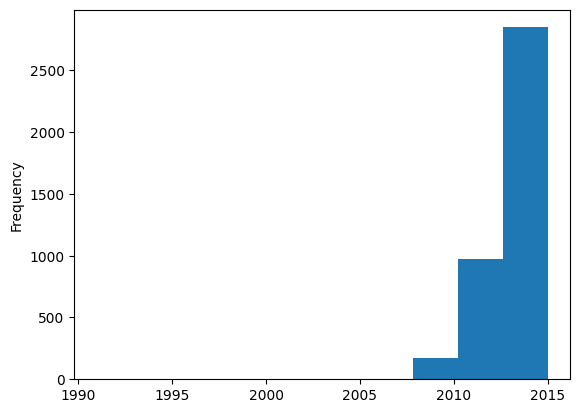

In [249]:
non_numeric_cols['DOJ_year'].plot(kind='hist')

In [250]:
non_numeric_cols['DOJ_month']=non_numeric_cols['DOJ'].dt.month_name()

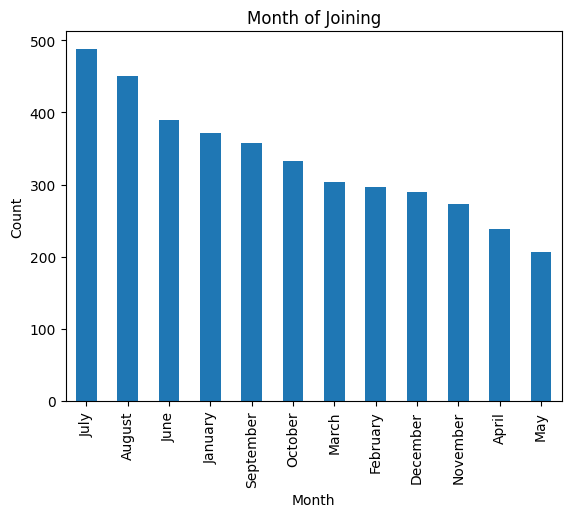

In [251]:
counts = non_numeric_cols['DOJ_month'].value_counts()

# plot the counts as a bar graph
counts.plot(kind='bar')

# set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month of Joining')

plt.show()

observation :Year of joining the job is more in 2014 and the trend is increasing year after year.Also most number of joining job is seen as in the month of July followed by August and june and least in May followed by april

**DOL**
Date
Date of leaving the company



In [252]:
non_numeric_cols['DOL'].value_counts()

present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
2014-04-01 00:00:00      82
2015-02-01 00:00:00      69
2014-06-01 00:00:00      67
2014-09-01 00:00:00      64
2014-08-01 00:00:00      63
2014-12-01 00:00:00      53
2014-07-01 00:00:00      52
2014-05-01 00:00:00      52
2014-02-01 00:00:00      49
2014-01-01 00:00:00      46
2014-10-01 00:00:00      44
2014-03-01 00:00:00      39
2014-11-01 00:00:00      35
2013-07-01 00:00:00      31
2013-05-01 00:00:00      29
2015-07-01 00:00:00      26
2015-06-01 00:00:00      26
2013-12-01 00:00:00      25
2013-08-01 00:00:00      24
2013-09-01 00:00:00      23
2013-02-01 00:00:00      21
2013-01-01 00:00:00      20
2013-03-01 00:00:00      18
2013-10-01 00:00:00      18
2013-06-01 00:00:00      17
2012-06-01 00:00:00      17
2013-04-01 00:00:00      16
2012-07-01 00:00:00      14
2012-08-01 00:00:00      14
2013-11-01 00:00:00      13
2015-12-01 00:00:00 

In [253]:

nonnumeric=non_numeric_cols.copy()

In [254]:
non_numeric_cols[non_numeric_cols['DOL']=='present']

DOJ      DOL                             Designation  \
0    2012-06-01  present                 senior quality engineer   
1    2013-09-01  present                       assistant manager   
2    2014-06-01  present                        systems engineer   
3    2011-07-01  present                senior software engineer   
5    2014-06-01  present                         system engineer   
8    2013-07-01  present                     electrical engineer   
9    2014-07-01  present                        project engineer   
12   2013-12-01  present              quality assurance engineer   
13   2014-01-01  present                              qa analyst   
14   2013-07-01  present                  java software engineer   
15   2013-08-01  present                        network engineer   
16   2014-09-01  present            product development engineer   
19   2014-09-01  present                       software engineer   
25   2012-09-01  present                         systems analyst   
30   2011-12-01  present                        systems engineer   
32   2013-10-01  present                   application developer   
33   2014-10-01  present                           ios developer   
34   2015-01-01  present                     executive assistant   
35   2014-03-01  present                online marketing manager   
36   2013-03-01  present                       software engineer   
38   2014-01-01  present             associate software engineer   
42   2014-08-01  present             associate software engineer   
48   2013-09-01  present                       software engineer   
51   2015-02-01  present                            ui developer   
52   2015-04-01  present                       software engineer   
53   2014-09-01  present               assistant system engineer   
54   2014-11-01  present                       android developer   
55   2014-08-01  present                       software engineer   
56   2013-03-01  present                        customer service   
57   2012-03-01  present                           test engineer   
60   2013-11-01  present                       software engineer   
62   2014-06-01  present                                engineer   
69   2015-06-01  present                      software developer   
70   2014-03-01  present                         system engineer   
71   2014-05-01  present                  java software engineer   
75   2014-09-01  present                      programmer analyst   
76   2012-06-01  present                       software engineer   
77   2014-07-01  present                           test engineer   
80   2014-08-01  present             assistant software engineer   
84   2011-11-01  present                  software test engineer   
85   2015-07-01  present                       firmware engineer   
88   2014-10-01  present                      research associate   
89   2013-03-01  present                        project engineer   
90   2013-05-01  present                        research analyst   
95   2012-06-01  present                        systems engineer   
97   2014-09-01  present                      software developer   
98   2011-03-01  present                 senior systems engineer   
99   2014-05-01  present             technical support executive   
101  2011-12-01  present                     electrical engineer   
102  2013-06-01  present                       software engineer   
103  2014-09-01  present                              qa analyst   
104  2013-06-01  present              technical support engineer   
105  2015-03-01  present               assistant system engineer   
109  2014-09-01  present                    application engineer   
110  2012-07-01  present                     production engineer   
113  2015-01-01  present                       software engineer   
114  2010-04-01  present                      programmer analyst   
120  2012-10-01  present                       software engineer   


In [255]:
non_numeric_cols['DOL'] = df['DOL'].replace('present', '2015-12-31 00:00:00')

In [256]:
non_numeric_cols['DOL'] = pd.to_datetime(non_numeric_cols['DOL'], format='%Y-%m-%d')

In [257]:
non_numeric_cols['DOL_year']=non_numeric_cols['DOL'].dt.year

In [258]:
non_numeric_cols['DOL_year'].value_counts()

2015    2934
2014     646
2013     255
2012     116
2011      40
2010       4
2005       1
2009       1
2008       1
Name: DOL_year, dtype: int64

<Axes: ylabel='Frequency'>

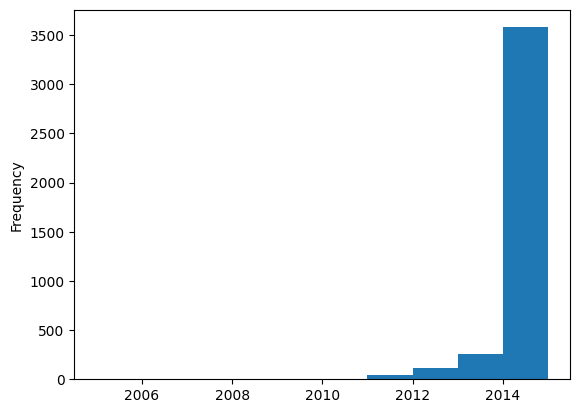

In [259]:
non_numeric_cols['DOL_year'].plot(kind='hist')

<Axes: >

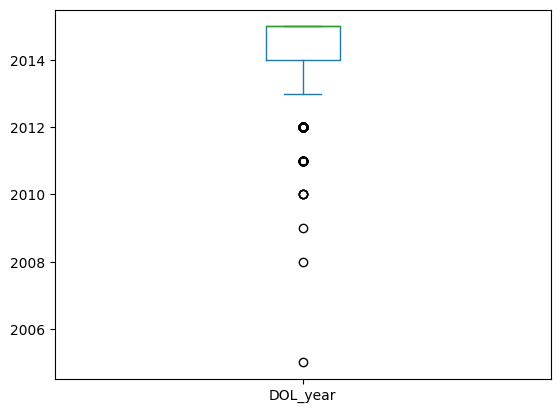

In [260]:
non_numeric_cols['DOL_year'].plot(kind='box')

In [261]:
non_numeric_cols['DOL_month']=non_numeric_cols['DOL'].dt.month_name()

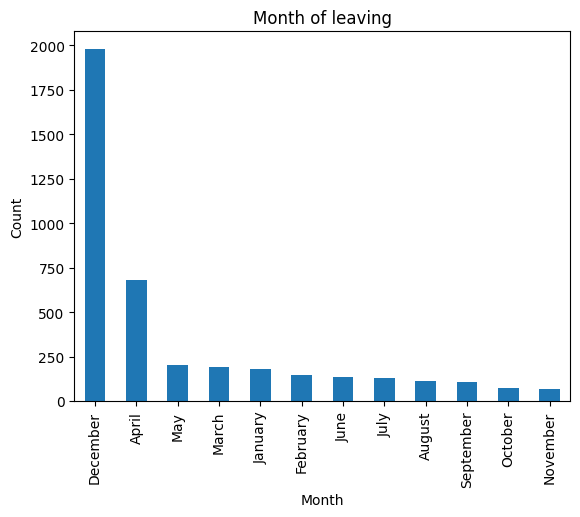

In [262]:
counts = non_numeric_cols['DOL_month'].value_counts()

# plot the counts as a bar graph
counts.plot(kind='bar')

# set the axis labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month of leaving')

plt.show()

observation:1059 people are shown as still continuing the job till date without leaving and 1875 people leaft the company in 2015 followed by 2014.here aslo a trend is number of people leaving a company is increasing year by year.Month of leaving is more in April followed by May and least in November followed by october.

**Designation**
Categorical
Designation oﬀered in the job



In [263]:
non_numeric_cols['Designation'].value_counts()

software engineer                         539
software developer                        265
system engineer                           205
programmer analyst                        139
systems engineer                          118
java software engineer                    111
software test engineer                    100
project engineer                           77
technical support engineer                 76
senior software engineer                   72
java developer                             67
test engineer                              57
web developer                              54
application developer                      52
assistant manager                          52
network engineer                           51
data analyst                               49
business analyst                           49
engineer                                   47
android developer                          46
associate software engineer                46
programmer                        

In [265]:
# Convert the column to lowercase and strip whitespaces
non_numeric_cols['Designation'] = non_numeric_cols['Designation'].str.lower().str.strip()

# Get the unique values in the column after cleaning them up
unique_values = set(non_numeric_cols['Designation'].str.encode('ascii', 'ignore').str.decode('ascii').tolist())

# Print out the unique values to identify problematic values
print(unique_values)


# Get count of each unique value in the column
value_counts = non_numeric_cols['Designation'].value_counts()

# Get a list of unique values that appear only once
values_to_replace = value_counts[value_counts <= 10].index.tolist()

# Replace unique values with 'others'
non_numeric_cols['Designation'] = non_numeric_cols['Designation'].apply(lambda x: 'others' if x in values_to_replace else x)

{'senior engineer', 'maintenance engineer', 'technical support engineer', 'associate system engineer', 'others', 'rf engineer', 'programmer analyst', 'qa analyst', 'application developer', 'java software engineer', 'graduate engineer trainee', 'junior engineer', 'software engineer', 'embedded software engineer', 'product development engineer', 'systems engineer', 'software developer', 'java developer', 'technical engineer', 'business development manager', 'network engineer', 'assistant system engineer', 'sales engineer', 'client services associate', 'programmer', 'senior systems engineer', 'oracle dba', 'sales executive', 'research associate', 'project engineer', 'test engineer', 'quality analyst', 'electrical engineer', 'application engineer', 'systems analyst', 'entry level management trainee', 'automation engineer', 'get', 'software quality assurance tester', 'quality engineer', 'web developer', 'software development engineer', 'php developer', 'asp.net developer', 'quality assuranc

In [266]:
non_numeric_cols['Designation'].value_counts()

others                               869
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
java software engineer               111
software test engineer               100
project engineer                      77
technical support engineer            76
senior software engineer              72
java developer                        67
test engineer                         57
web developer                         54
application developer                 52
assistant manager                     52
network engineer                      51
business analyst                      49
data analyst                          49
engineer                              47
android developer                     46
associate software engineer           46
programmer                            36
senior systems engineer               35
.net developer  

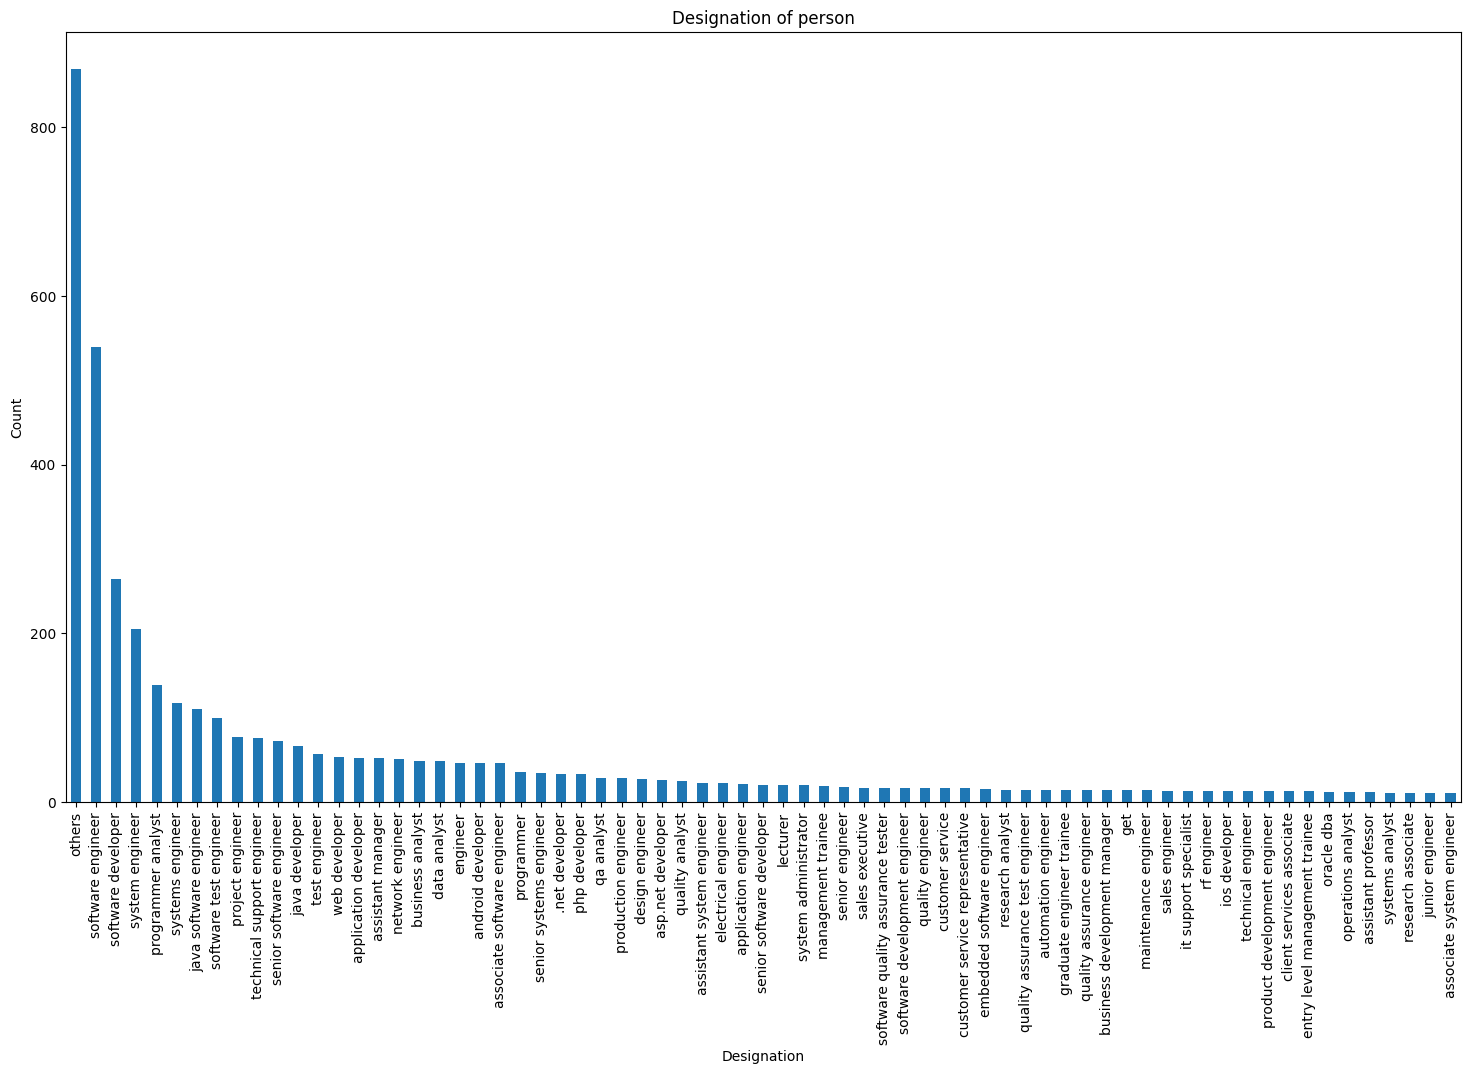

In [267]:
counts = non_numeric_cols['Designation'].value_counts()
# plot the counts as a bar graph
counts.plot(kind='bar', figsize=(18, 10))

# set the axis labels and title
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Designation of person')

plt.show()

Observation:people with designation Software Engineer followed by software delevoper is more in count

**JobCity**
Categorical
Location of the job (city)



In [268]:
non_numeric_cols['JobCity'].value_counts()

Bangalore                                 627
-1                                        461
Noida                                     368
Hyderabad                                 335
Pune                                      290
Chennai                                   272
Gurgaon                                   198
New Delhi                                 196
Mumbai                                    108
Kolkata                                    98
Jaipur                                     46
Lucknow                                    36
Mysore                                     36
Navi Mumbai                                32
chennai                                    27
Chandigarh                                 26
pune                                       26
Greater Noida                              26
Indore                                     24
Bhubaneswar                                22
Coimbatore                                 20
Faridabad                         

In [269]:
non_numeric_cols[non_numeric_cols['JobCity']==-1]

DOJ        DOL                      Designation JobCity Gender  \
15   2013-08-01 2015-12-31                 network engineer      -1      f   
21   2012-08-01 2013-12-01                software engineer      -1      f   
39   2013-01-01 2013-06-01               management trainee      -1      m   
77   2014-07-01 2015-12-31                    test engineer      -1      m   
79   2013-08-01 2014-05-01               software developer      -1      f   
99   2014-05-01 2015-12-31                           others      -1      m   
103  2014-09-01 2015-12-31                       qa analyst      -1      f   
104  2013-06-01 2015-12-31       technical support engineer      -1      m   
105  2015-03-01 2015-12-31        assistant system engineer      -1      m   
112  2011-11-01 2012-05-01                           others      -1      f   
124  2014-11-01 2015-12-31               programmer analyst      -1      f   
135  2013-12-01 2014-05-01             system administrator      -1      m   
141  2013-09-01 2014-04-01                           others      -1      m   
144  2013-06-01 2015-12-31                         engineer      -1      m   
154  2013-01-01 2015-02-01                           others      -1      f   
165  2013-01-01 2013-09-01                    web developer      -1      m   
189  2014-01-01 2015-03-01           java software engineer      -1      m   
202  2014-01-01 2015-12-31               software developer      -1      m   
206  2014-08-01 2015-12-31   entry level management trainee      -1      m   
208  2011-12-01 2015-01-01                           others      -1      m   
223  2013-08-01 2015-12-31                 project engineer      -1      f   
227  2011-07-01 2013-07-01                software engineer      -1      m   
236  2013-11-01 2015-04-01                           others      -1      m   
246  2014-06-01 2014-08-01       technical support engineer      -1      m   
260  2012-05-01 2015-01-01                 project engineer      -1      m   
266  2013-01-01 2015-12-31                           others      -1      m   
270  2012-07-01 2015-12-31               programmer analyst      -1      m   
275  2014-08-01 2015-12-31                software engineer      -1      m   
278  2015-01-01 2015-04-01                           others      -1      m   
283  2013-05-01 2013-09-01               software developer      -1      m   
284  2014-06-01 2015-12-31                 business analyst      -1      m   
288  2014-06-01 2015-04-01                assistant manager      -1      m   
293  2013-08-01 2014-06-01              assistant professor      -1      m   
308  2014-06-01 2015-12-31                 systems engineer      -1      m   
319  2014-03-01 2015-12-31                           others      -1      f   
325  2013-03-01 2015-12-31               software developer      -1      f   
327  2014-05-01 2015-12-31                           others      -1      m   
329  2014-01-01 2014-02-01                           others      -1      m   
330  2012-09-01 2013-09-01             application engineer      -1      m   
332  2013-08-01 2014-03-01                              get      -1      m   
337  2013-08-01 2015-12-31           java software engineer      -1      m   
354  2014-07-01 2015-12-31                       oracle dba      -1      m   
355  2013-09-01 2015-04-01                           others      -1      m   
364  2014-05-01 2014-10-01                           others      -1      m   
372  2014-01-01 2015-12-31                           others      -1      m   
374  2012-04-01 2014-05-01                software engineer      -1      m   
376  2012-01-01 2013-12-01                software engineer      -1      m   
384  2014-09-01 2015-12-31                software engineer      -1      m   
386  2013-04-01 2014-04-01         senior software engineer      -1      m   
405  2013-10-01 2014-07-01                  sales executive      -1      m   
420  2014-08-01 2015-12-31    soft

In [ ]:
#there are 461 rows with value of jobcity as -1

In [270]:
# Replace the values in 'JobCity' where value is -1 with the corresponding value from 'CollegeState'
non_numeric_cols['JobCity'] =non_numeric_cols.apply(lambda row: row['CollegeState'] if row['JobCity'] == -1 else row['JobCity'], axis=1)

In [271]:
non_numeric_cols['JobCity'].value_counts()

Bangalore                                 627
Noida                                     368
Hyderabad                                 335
Pune                                      290
Chennai                                   272
Gurgaon                                   198
New Delhi                                 196
Uttar Pradesh                             114
Mumbai                                    108
Kolkata                                    98
Jaipur                                     46
Telangana                                  40
Lucknow                                    36
Mysore                                     36
Delhi                                      35
Karnataka                                  34
Navi Mumbai                                32
Tamil Nadu                                 31
Punjab                                     31
Maharashtra                                27
chennai                                    27
pune                              

In [272]:
non_numeric_cols['JobCity'].value_counts()

Bangalore                                 627
Noida                                     368
Hyderabad                                 335
Pune                                      290
Chennai                                   272
Gurgaon                                   198
New Delhi                                 196
Uttar Pradesh                             114
Mumbai                                    108
Kolkata                                    98
Jaipur                                     46
Telangana                                  40
Lucknow                                    36
Mysore                                     36
Delhi                                      35
Karnataka                                  34
Navi Mumbai                                32
Tamil Nadu                                 31
Punjab                                     31
Maharashtra                                27
chennai                                    27
pune                              

In [273]:
non_numeric_cols[non_numeric_cols['JobCity']=='Technopark, Trivandrum']

DOJ        DOL Designation                 JobCity Gender  \
1814 2012-06-01 2013-04-01      others  Technopark, Trivandrum      f   

            DOB 10board 12board       Degree  \
1814 1988-08-02    cbse    cbse  B.Tech/B.E.   

                                 Specialization CollegeState  DOJ_year  \
1814  electronics and communication engineering       Kerala      2012   

     DOJ_month  DOL_year DOL_month  
1814      June      2013     April

In [274]:
value_counts = non_numeric_cols['JobCity'].value_counts()

# get a list of unique values that appear only once
values_to_replace = value_counts[value_counts <= 10].index.tolist()

# replace values in 'JobCity' column that appear less than or equal to 10 times with corresponding values from 'CollegeState' column
mask = non_numeric_cols['JobCity'].isin(values_to_replace)
non_numeric_cols.loc[mask, 'JobCity'] = non_numeric_cols.loc[mask, 'CollegeState']

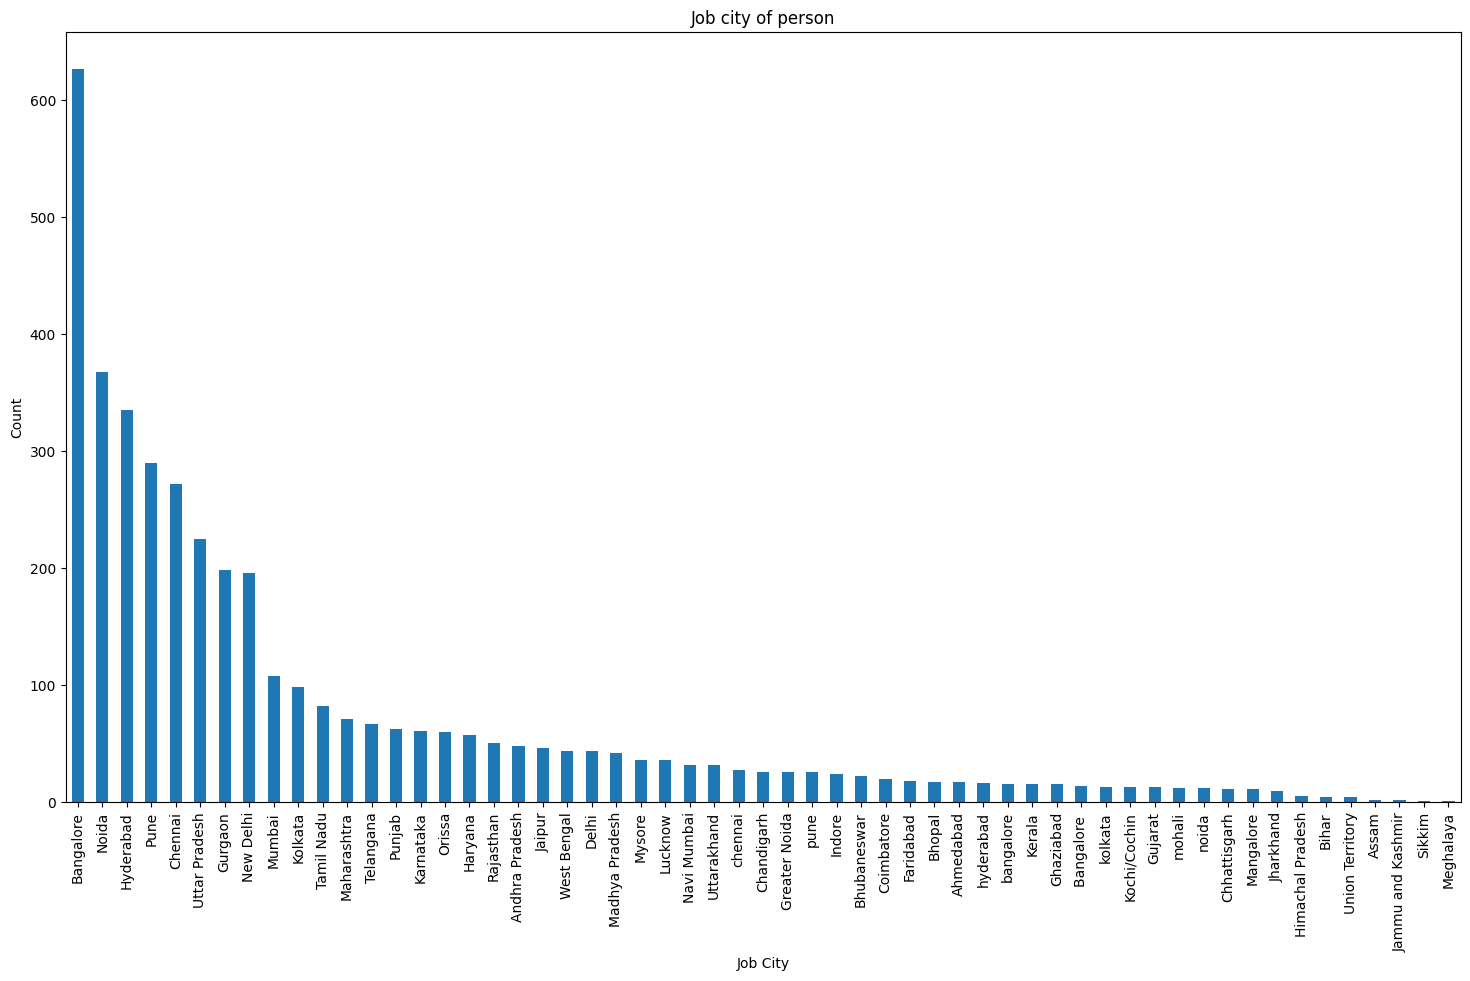

In [275]:
counts = non_numeric_cols['JobCity'].value_counts()
# plot the counts as a bar graph
counts.plot(kind='bar', figsize=(18, 10))

# set the axis labels and title
plt.xlabel('Job City')
plt.ylabel('Count')
plt.title('Job city of person')

plt.show()

observation:Most of the job is found in Bangalore followed by Noida and least in Meghalaya

**Gender**
Categorical
Candidate’s gender



non_numeric_cols['JobCity'].value_counts()

In [276]:
non_numeric_cols['Gender'].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

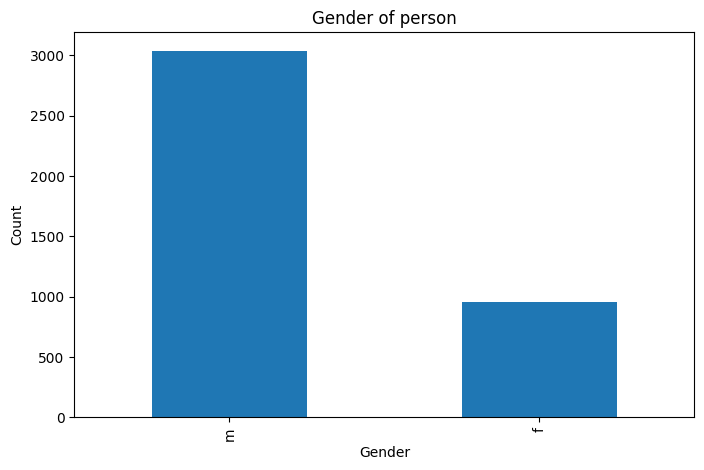

In [277]:
counts = non_numeric_cols['Gender'].value_counts()
# plot the counts as a bar graph
counts.plot(kind='bar', figsize=(8,5))

# set the axis labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender of person')

plt.show()

observation:Male candidate is more in the work force compared to female

**DOB**
Date
Date of birth of candidate



In [278]:
non_numeric_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DOJ             3998 non-null   datetime64[ns]
 1   DOL             3998 non-null   datetime64[ns]
 2   Designation     3998 non-null   object        
 3   JobCity         3998 non-null   object        
 4   Gender          3998 non-null   object        
 5   DOB             3998 non-null   datetime64[ns]
 6   10board         3998 non-null   object        
 7   12board         3998 non-null   object        
 8   Degree          3998 non-null   object        
 9   Specialization  3998 non-null   object        
 10  CollegeState    3998 non-null   object        
 11  DOJ_year        3998 non-null   int64         
 12  DOJ_month       3998 non-null   object        
 13  DOL_year        3998 non-null   int64         
 14  DOL_month       3998 non-null   object        
dtypes: d

In [279]:
non_numeric_cols['DOB_year']=non_numeric_cols['DOB'].dt.year

In [280]:
non_numeric_cols['DOB_year'].value_counts()

1991    979
1992    855
1990    774
1989    522
1988    308
1993    299
1987    116
1986     62
1994     31
1985     28
1984     13
1983      4
1995      2
1982      2
1977      1
1997      1
1981      1
Name: DOB_year, dtype: int64

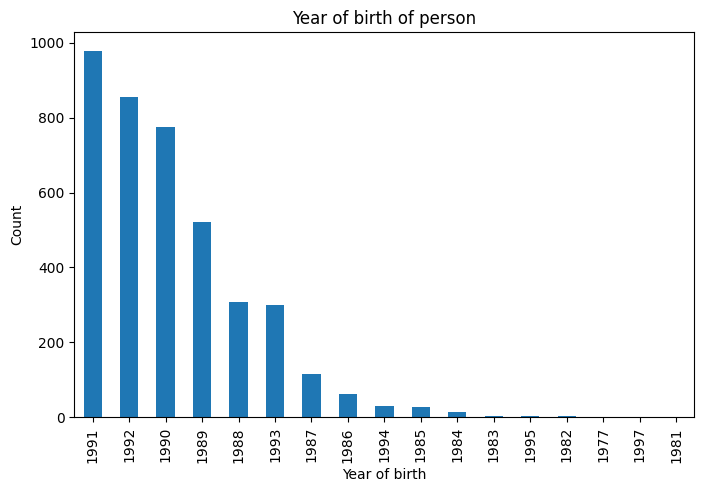

In [281]:
counts = non_numeric_cols['DOB_year'].value_counts()
# plot the counts as a bar graph
counts.plot(kind='bar', figsize=(8,5))

# set the axis labels and title
plt.xlabel('Year of birth')
plt.ylabel('Count')
plt.title('Year of birth of person')

plt.show()

In [282]:
Age = non_numeric_cols.DOB.dt.year
Age = abs(Age - 2015)

In [283]:
Age.value_counts()

24    979
23    855
25    774
26    522
27    308
22    299
28    116
29     62
21     31
30     28
31     13
32      4
20      2
33      2
38      1
18      1
34      1
Name: DOB, dtype: int64

In [284]:
non_numeric_cols['Age'] = Age

In [285]:
non_numeric_cols['Age'] = non_numeric_cols['Age'].astype('int32')

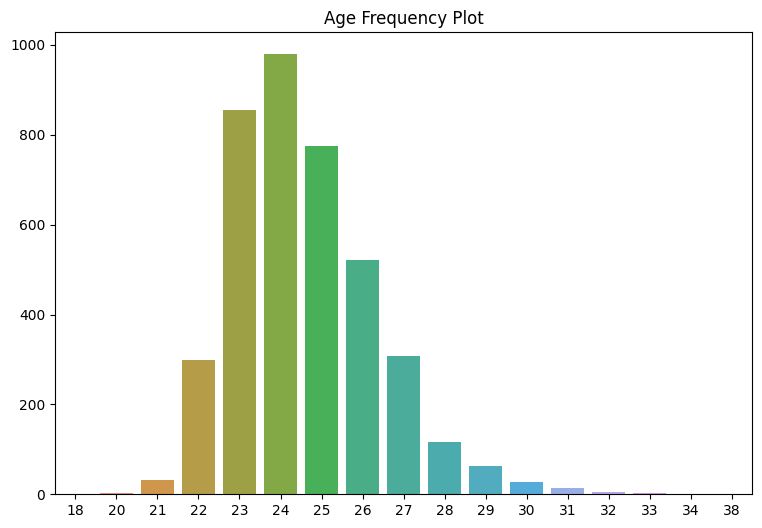

In [286]:
plt.figure(figsize=(9,6))
sns.countplot(x=non_numeric_cols.Age)
plt.title("Age Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

**10board**
Continuous
The school board whose curriculum the candidate followed in grade 10



In [287]:
non_numeric_cols.columns

Index(['DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB', '10board',
       '12board', 'Degree', 'Specialization', 'CollegeState', 'DOJ_year',
       'DOJ_month', 'DOL_year', 'DOL_month', 'DOB_year', 'Age'],
      dtype='object')

In [288]:
# select columns that are non-numeric
non_numeric_cols = df.select_dtypes(exclude=['number'])

In [289]:
non_numeric_cols['10board'].value_counts()

cbse                                                                        1395
state board                                                                 1164
0                                                                            350
icse                                                                         281
ssc                                                                          122
up board                                                                      85
matriculation                                                                 38
rbse                                                                          23
board of secondary education                                                  20
up                                                                            19
mp board                                                                      17
wbbse                                                                         16
sslc                        

In [290]:
non_numeric_cols[non_numeric_cols['10board']==0]

DOJ                  DOL                         Designation  \
44   2012-05-01  2015-04-01 00:00:00                  programmer analyst   
57   2012-03-01              present                       test engineer   
84   2011-11-01              present              software test engineer   
101  2011-12-01              present                 electrical engineer   
114  2010-04-01              present                  programmer analyst   
119  2014-01-01  2015-04-01 00:00:00                   software engineer   
128  2011-11-01              present            senior software engineer   
133  2014-06-01  2015-04-01 00:00:00               marketing coordinator   
166  2012-07-01  2014-10-01 00:00:00                      field engineer   
177  2011-09-01              present           senior software developer   
178  2013-01-01  2014-11-01 00:00:00                  software developer   
187  2013-02-01              present                  programmer analyst   
193  2011-08-01  2015-04-01 00:00:00                  software developer   
194  2012-01-01              present                    systems engineer   
203  2010-09-01  2011-11-01 00:00:00                     junior engineer   
215  2013-04-01              present                  programmer analyst   
256  2013-05-01  2014-01-01 00:00:00                      .net developer   
260  2012-05-01  2015-01-01 00:00:00                    project engineer   
272  2011-06-01  2014-09-01 00:00:00            senior software engineer   
276  2012-09-01              present                      java developer   
281  2012-11-01  2013-11-01 00:00:00                   android developer   
285  2013-08-01              present                   account executive   
292  2013-04-01  2015-05-01 00:00:00                     system engineer   
307  2013-04-01              present                   software engineer   
310  2012-09-01  2015-04-01 00:00:00                   asp.net developer   
324  2012-10-01  2014-02-01 00:00:00                  software developer   
342  2012-03-01  2015-04-01 00:00:00                    systems engineer   
361  2012-04-01  2014-10-01 00:00:00                  software developer   
375  2010-12-01              present                  programmer analyst   
399  2012-12-01              present                       php developer   
401  2012-09-01  2014-07-01 00:00:00                     system engineer   
413  2013-01-01  2015-04-01 00:00:00   software quality assurance tester   
426  2014-11-01  2015-04-01 00:00:00                 electrical engineer   
430  2012-05-01              present                       web developer   
433  2011-06-01  2013-02-01 00:00:00                            designer   
443  2012-01-01              present                  software developer   
449  2013-11-01  2015-02-01 00:00:00                    process engineer   
470  2013-11-01              present                      .net developer   
472  2013-12-01  2015-04-01 00:00:00                    network engineer   
477  2013-06-01  2015-04-01 00:00:00         linux systems administrator   
500  2011-07-01  2013-04-01 00:00:00               application developer   
501  2012-06-01              present                  programmer analyst   
527  2012-07-01  2014-11-01 00:00:00          embedded software engineer   
534  2012-07-01  2013-11-01 00:00:00                javascript developer   
560  2013-08-01              present                   software engineer   
562  2004-08-01  2005-03-01 00:00:00                     system engineer   
582  2012-10-01  2015-04-01 00:00:00                     system engineer   
584  2010-04-01              present                       lead engineer   
604  2012-07-01              present            senior software engineer   
608  2011-10-01              present              software test engineer   
611  2013-04-01              present                  programmer analyst   
617  2012-08-01              present                   assis

In [292]:
print(non_numeric_cols['10board'].value_counts())

cbse                                                                        1395
state board                                                                 1164
0                                                                            350
icse                                                                         281
ssc                                                                          122
up board                                                                      85
matriculation                                                                 38
rbse                                                                          23
board of secondary education                                                  20
up                                                                            19
mp board                                                                      17
wbbse                                                                         16
sslc                        

In [293]:
print(non_numeric_cols['10board'].dtype)

object


In [294]:
grouped = non_numeric_cols.groupby('10board')
less_than_10 = grouped.filter(lambda x: len(x) < 10)
less_than_10['10board'].value_counts()

state                                                                       9
bseb                                                                        9
maharashtra board                                                           8
pseb                                                                        8
uttar pradesh board                                                         7
rajasthan board                                                             6
bse                                                                         6
karnataka secondary education board                                         6
hbse                                                                        6
karnataka secondary education examination board                             6
u p board                                                                   5
gseb                                                                        5
west bengal board of secondary education                        

In [295]:
values_to_replace_state=["maharashtra","jharkhand","orissa","karnataka","rajasthan","mp","secondary","ssc","andhra pradesh","odisha","up","district","cluny","bsepatna","hse,board","u p",
                   "nagpur board","nagpur","hse","state","patna","punjab","mohali","kerala","ksseb","mhsbse","seba","cgbse","pune board","uttarakhand","uttaranchal","gujarat","mumbai",
                   "maharastra","kea","haryana","uttrakhand","uttarpradesh","bihar","dindigul","board of intermediate education","nashik","delhi","ua","apsche","pune","uttar pradesh","kseeb",
                   "himachal","nasik","harayana","madhya pradesh","gseb","wbbse","sslc","bseb","pseb","j & k bord","uttranchal board","aurangabad","jseb","hbsc","ajmer","latur","ksbe","ms board",
                   "jkbose","gsheb","mirza ahmed ali baig","hbse"]
non_numeric_cols['10board'] = non_numeric_cols['10board'].apply(lambda x: 'state board' if isinstance(x, str) and any(val in str(x).lower() for val in values_to_replace_state) else x)

In [296]:
non_numeric_cols['10board'].value_counts()

state board                                          1860
cbse                                                 1395
0                                                     350
icse                                                  281
matriculation                                          38
rbse                                                   23
bse                                                     6
matriculation board                                     4
matric                                                  4
anglo indian                                            3
kseb                                                    2
matric board                                            2
hsc                                                     2
cbse board                                              2
cbse                                                    1
board of secondaray education                           1
gyan bharati school                                     1
cbsc          

In [297]:
non_numeric_cols['10board'] = non_numeric_cols['10board'].replace(["jawahar navodaya vidyalaya","stjosephs girls higher sec school","cbse","kiran english medium high school",
                                                                  "cbse","wbbsce","cbse","board of secondaray education","cbsc","cbse board","sarada high scchool","national public school","cbse[gulf zone]","rbse","bse"], 'cbse')
values_to_replace_matriculation=["matric","bharathi matriculation school","matriculation","maticulation","maatriculation","metric"] 
non_numeric_cols['10board'] = non_numeric_cols['10board'].apply(lambda x: 'matriculation board' if isinstance(x, str) and any(val in str(x).lower() for val in values_to_replace_matriculation) else x)

In [298]:
non_numeric_cols['10board'] = non_numeric_cols['10board'].replace("icse board","icse")

In [299]:
non_numeric_cols[non_numeric_cols['10board']=="hbse"]

Empty DataFrame
Columns: [DOJ, DOL, Designation, JobCity, Gender, DOB, 10board, 12board, Degree, Specialization, CollegeState]
Index: []

In [300]:
non_numeric_cols['10board'] = non_numeric_cols['10board'].replace(0, non_numeric_cols['10board'].mode()[0])

In [301]:
non_numeric_cols['10board'].value_counts()

state board                                          2210
cbse                                                 1434
icse                                                  282
matriculation board                                    54
anglo indian                                            3
hsc                                                     2
kseb                                                    2
certificate of middle years program of ib               1
aisse                                                   1
cicse                                                   1
cbse                                                    1
dav public school,hehal                                 1
hsce                                                    1
kolhapur                                                1
gyan bharati school                                     1
stmary's convent inter college                          1
dav public school sec 14                                1
council for in

In [302]:
value_counts=non_numeric_cols['10board'].value_counts()

# Get a list of unique values that appear only once
values_to_replace = value_counts[value_counts <= 5].index.tolist()

# Replace unique values with 'others'
non_numeric_cols['10board'] = non_numeric_cols['10board'].apply(lambda x: 'others' if x in values_to_replace else x)

In [303]:
non_numeric_cols['10board'].value_counts()

state board            2210
cbse                   1434
icse                    282
matriculation board      54
others                   18
Name: 10board, dtype: int64

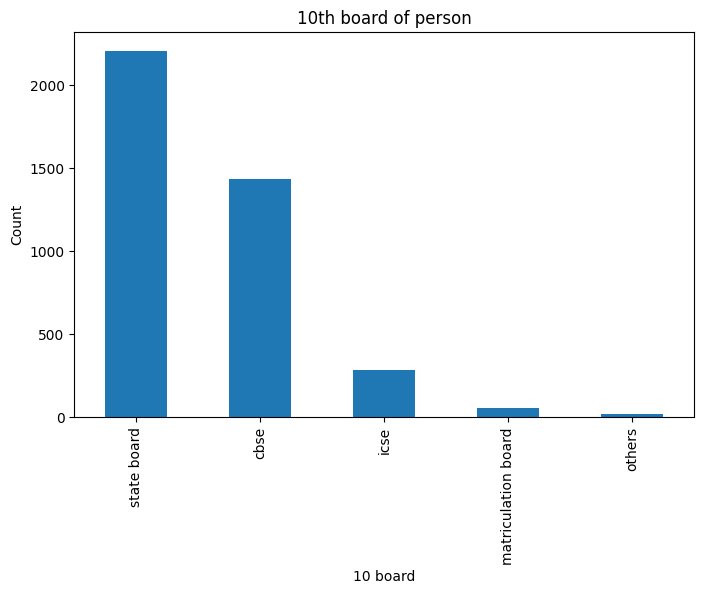

In [304]:
counts = non_numeric_cols['10board'].value_counts()
# plot the counts as a bar graph
counts.plot(kind='bar', figsize=(8,5))

# set the axis labels and title
plt.xlabel('10 board')
plt.ylabel('Count')
plt.title('10th board of person')

plt.show()

Observation:seen the people those who have done 10th board in state board cbse is more in workforce followed by various cbse.

**12board**
Date
The school board whose curriculum the candidate followed in grade 12



In [305]:
non_numeric_cols['12board'].value_counts()

cbse                                                                           1400
state board                                                                    1254
0                                                                               359
icse                                                                            129
up board                                                                         87
isc                                                                              45
board of intermediate                                                            36
board of intermediate education                                                  31
up                                                                               20
rbse                                                                             19
mp board                                                                         17
bie                                                                         

In [306]:
list1 = []
for i in non_numeric_cols['12board']:
    if isinstance(i, str):
        if 'isc' in i.lower():
            list1.append('ISC')
        elif 'cbse' in i.lower():
            list1.append('CBSE')
        elif 'nios' in i.lower():
            list1.append('National Board')
        elif 'diploma' in i.lower():
            list1.append('Diploma')
        elif 'technical' in i.lower():
            list1.append('Technical')
        elif 'university' in i.lower():
            list1.append('University')
        else:
            list1.append('State Board')
    else:
        list1.append('State Board')

In [307]:
non_numeric_cols['12board']=list1
non_numeric_cols['12board'].value_counts()

State Board       2486
CBSE              1402
ISC                 48
University          32
Technical           15
Diploma              8
National Board       7
Name: 12board, dtype: int64

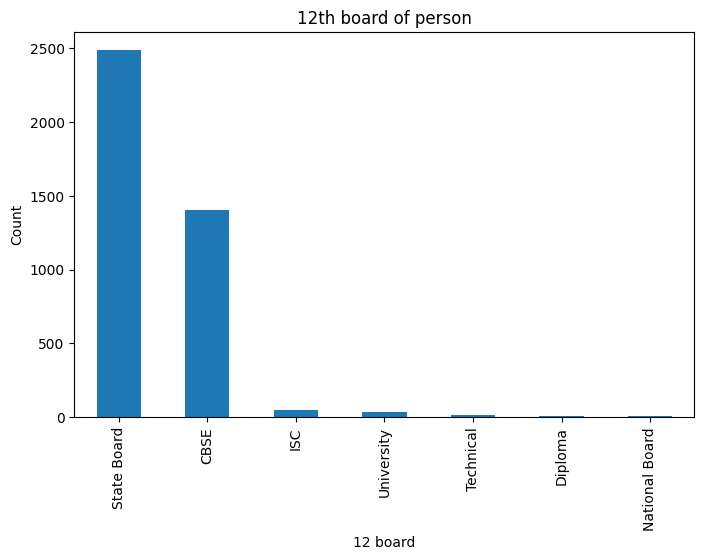

In [309]:
counts = non_numeric_cols['12board'].value_counts()
# plot the counts as a bar graph
counts.plot(kind='bar', figsize=(8,5))

# set the axis labels and title
plt.xlabel('12 board')
plt.ylabel('Count')
plt.title('12th board of person')

plt.show()

Observation:seen the people those who have done 12th board in state board is more in workforce followed by various cbse

In [310]:
non_numeric_cols.columns


Index(['DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB', '10board',
       '12board', 'Degree', 'Specialization', 'CollegeState'],
      dtype='object')

**Degree**
Categorical
Degree obtained/pursued by the candidate



In [311]:
non_numeric_cols['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

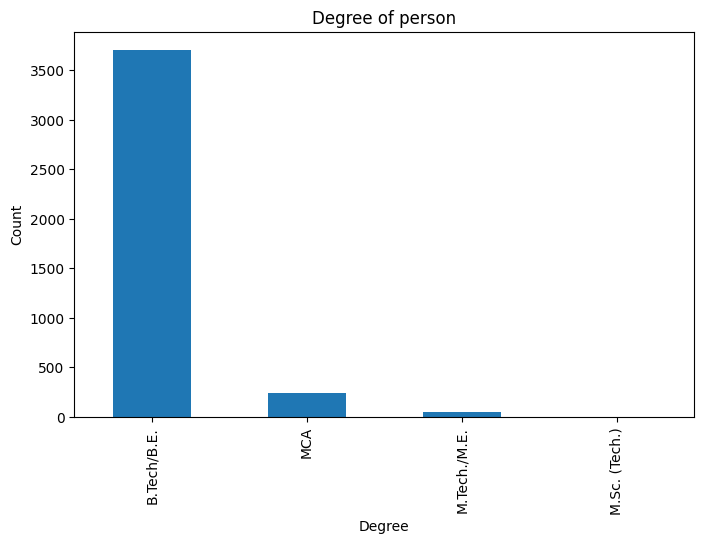

In [312]:
counts = non_numeric_cols['Degree'].value_counts()
# plot the counts as a bar graph
counts.plot(kind='bar', figsize=(8,5))

# set the axis labels and title
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree of person')

plt.show()

observation:people with BE/Btech degree is more in workforce followed by MCA 

**Specialization**
Categorical
Specialization pursued by the candidate



In [313]:
non_numeric_cols['Specialization'].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

In [314]:
non_numeric_cols['Specialization'] = non_numeric_cols['Specialization'].replace(["computer engineering","computer science and technology","computer science","computer and communication engineering","computer networking","computer networking"],"computer science & engineering")

In [315]:
non_numeric_cols['Specialization'] = non_numeric_cols['Specialization'].replace(["electronics & telecommunications","electronics engineering","telecommunication engineering","electronics and computer engineering","electronics"],"electronics and communication engineering")

In [316]:
non_numeric_cols['Specialization'] = non_numeric_cols['Specialization'].replace(["electronics and electrical engineering","electronics and electrical engineering","electrical and power engineering"],"electrical engineering")

In [317]:
non_numeric_cols['Specialization'] = non_numeric_cols['Specialization'].replace(["electronics & instrumentation eng","instrumentation and control engineering","applied electronics and instrumentation","instrumentation engineering","control and instrumentation engineering"],"electronics and instrumentation engineering")

In [318]:
non_numeric_cols['Specialization'] = non_numeric_cols['Specialization'].replace(["information technology","information science engineering","information & communication technology","information science"],"information technology engineering")

In [319]:
non_numeric_cols['Specialization'] = non_numeric_cols['Specialization'].replace(["mechanical engineering","mechanical & production engineering","industrial & production engineering","mechanical and automation","automobile/automotive engineering","mechatronics","internal combustion engine"],"mechanical & production engineering")

In [320]:
value_counts = non_numeric_cols['Specialization'].value_counts()

# Get a list of unique values that appear only once
values_to_replace = value_counts[value_counts <= 10].index.tolist()

# Replace unique values with 'others'
non_numeric_cols['Specialization'] = non_numeric_cols['Specialization'].apply(lambda x: 'others' if x in values_to_replace else x)

In [321]:
non_numeric_cols['Specialization'] = non_numeric_cols['Specialization'].replace('others',"other")

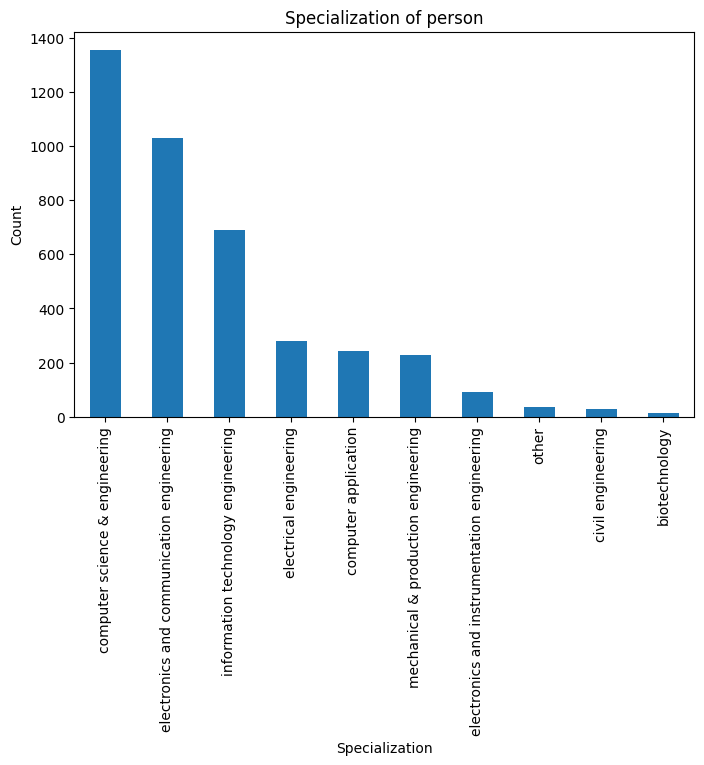

In [322]:
counts = non_numeric_cols['Specialization'].value_counts()
# plot the counts as a bar graph
counts.plot(kind='bar', figsize=(8,5))

# set the axis labels and title
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Specialization of person')

plt.show()

observation:people specialized in computer science and engineering followe by electronics and communication engineering is more in workforce

**CollegeState**
Categorical
Name of States



In [323]:
non_numeric_cols['CollegeState'].value_counts()

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory        5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

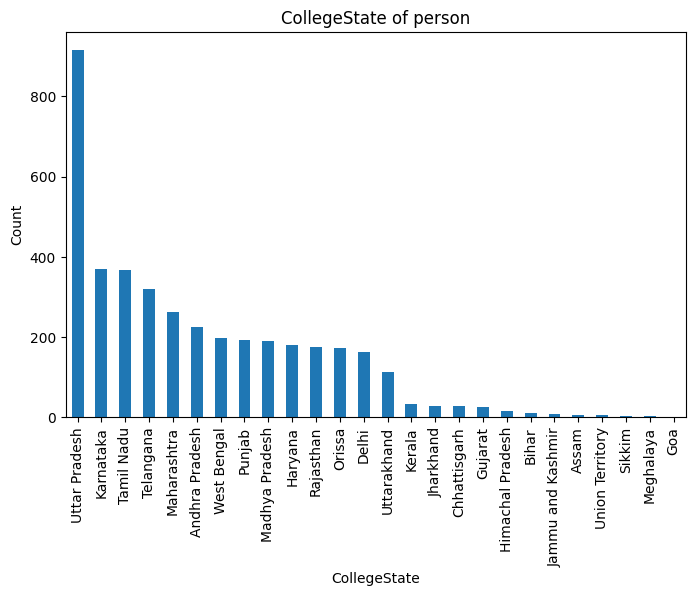

In [324]:
counts = non_numeric_cols['CollegeState'].value_counts()
# plot the counts as a bar graph
counts.plot(kind='bar', figsize=(8,5))

# set the axis labels and title
plt.xlabel('CollegeState')
plt.ylabel('Count')
plt.title('CollegeState of person')

plt.show()

observation:people in Uttar Pradesh is more in workforce follwed by karnataka and tamilnadu and least in Goa followed by Meghalaya ,Sikkim

observations :


1.   Year of joining the job is more in 2014 and the trend is increasing year after year.Also most number of joining job is seen as in the month of July followed by August and june and least in May followed by april

2.   1059 people are shown as still continuing the job till date without leaving and 1875 people leaft the company in 2015 followed by 2014.here aslo a trend is number of people leaving a company is increasing year by year.Month of leaving is more in April followed by May and least in November followed by october.

3.   people with designation Software Engineer followed by software delevoper is more in count
4.   observation:Most of the job is found in Bangalore followed by Noida and least in Meghalaya

5.   Male candidate is more in the work force compared to female
6.   seen the people those who have done 10th board in state board cbse is more in workforce followed by various cbse.

7.   seen the people those who have done 12th board in state board is more in workforce followed by various cbse
8.   people with BE/Btech degree is more in workforce followed by MCA


9.   people specialized in computer science and engineering followe by electronics and communication engineering is more in workforce
2.   observation:people in Uttar Pradesh is more in workforce follwed by karnataka and tamilnadu and least in Goa followed by Meghalaya ,Sikkim













**Bivariate Analysis**

In [326]:

concatenated_df = pd.concat([df_numerical, non_numeric_cols], axis=1)

In [136]:

concatenated_df.head()

Salary  10percentage  12graduation  12percentage  CollegeTier  collegeGPA  \
0   420000          84.3          2007          95.8            2       78.00   
1   500000          85.4          2007          85.0            2       70.06   
2   325000          85.0          2010          68.2            2       70.00   
3  1100000          85.6          2007          83.6            1       74.64   
4   200000          78.0          2008          76.8            2       73.90   

   CollegeCityTier  GraduationYear  English  Logical  ...  \
0                0            2011      515      585  ...   
1                0            2012      695      610  ...   
2                0            2014      615      545  ...   
3                1            2011      635      585  ...   
4                0            2012      545      625  ...   

                   DOL               Designation    JobCity  Gender  \
0              present                    others  Bangalore       f   
1              present         assistant manager     Indore       m   
2              present          systems engineer    Chennai       f   
3              present  senior software engineer    Gurgaon       m   
4  2015-03-01 00:00:00                       get    Manesar       m   

         DOB      10board      12board       Degree  \
0 1990-02-19  state board  State Board  B.Tech/B.E.   
1 1989-10-04         cbse         CBSE  B.Tech/B.E.   
2 1992-08-03         cbse         CBSE  B.Tech/B.E.   
3 1989-12-05         cbse         CBSE  B.Tech/B.E.   
4 1991-02-27         cbse         CBSE  B.Tech/B.E.   

                              Specialization    CollegeState  
0             computer science & engineering  Andhra Pradesh  
1  electronics and communication engineering  Madhya Pradesh  
2         information technology engineering   Uttar Pradesh  
3             computer science & engineering           Delhi  
4  electronics and communication engineering   Uttar Pradesh  

[5 rows x 35 columns]

In [137]:
concatenated_df.Designation.value_counts()

others                       869
software engineer            539
software developer           265
system engineer              205
programmer analyst           139
                            ... 
assistant professor           12
systems analyst               11
research associate            11
junior engineer               11
associate system engineer     11
Name: Designation, Length: 69, dtype: int64

<Figure size 3000x3900 with 0 Axes>

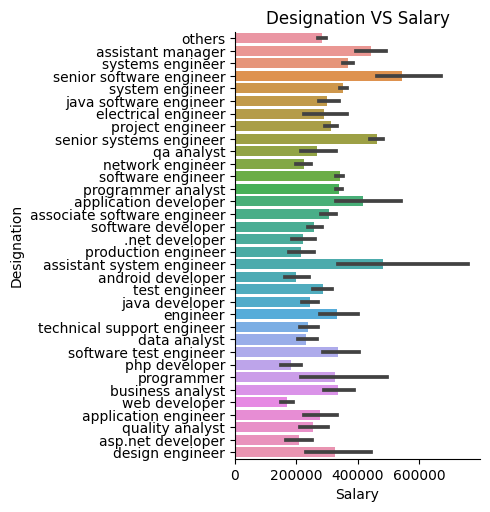

In [151]:
#Filter the data frame to include only Designations with unique values greater than 20
counts = concatenated_df['Designation'].value_counts()
filtered_df = concatenated_df[concatenated_df['Designation'].isin(counts[counts > 20].index)]

# Create the catplot using the filtered data frame
plt.figure(figsize=(30, 39))
sns.catplot(y="Designation", x="Salary", kind="bar", data=filtered_df)
plt.title("Designation VS Salary")

plt.show()

<Figure size 3000x3900 with 0 Axes>

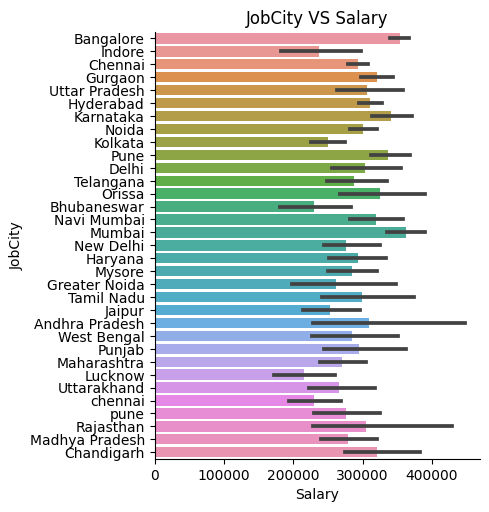

In [170]:
plt.figure(figsize=(30, 39))

filtered_df = concatenated_df[concatenated_df['JobCity'].isin(counts[counts > 20].index)]

sns.catplot(y="JobCity", x="Salary", kind="bar", data=filtered_df)
plt.title("JobCity VS Salary")
plt.show()

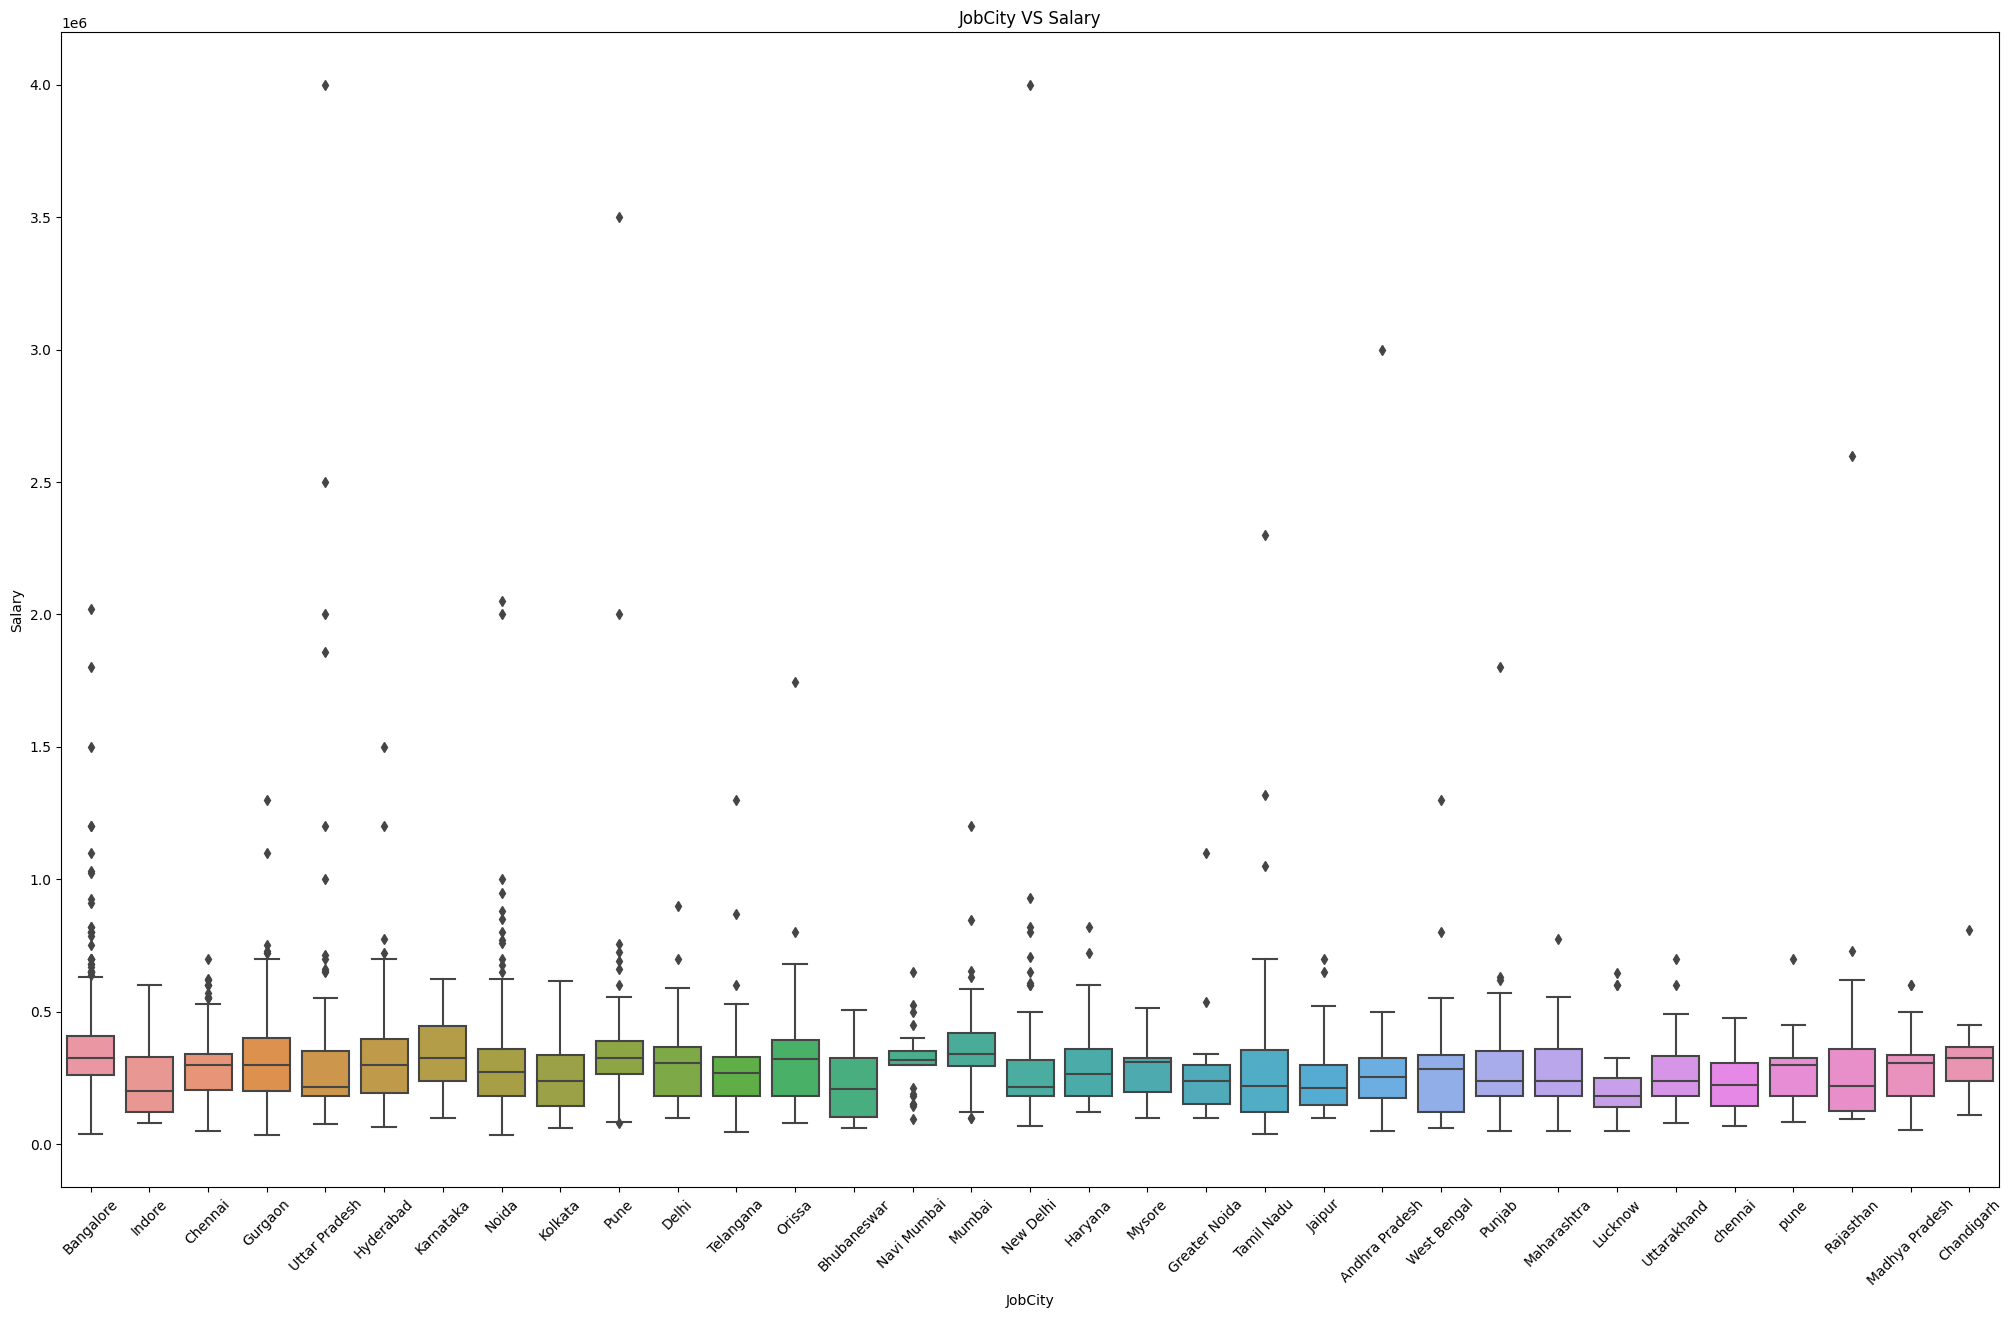

In [173]:
plt.figure(figsize=(25,15))
filtered_df = concatenated_df[concatenated_df['JobCity'].isin(counts[counts > 20].index)]
sns.boxplot(x="JobCity", y="Salary", data=filtered_df)
plt.title("JobCity VS Salary")
plt.xticks(rotation=45)

plt.show()

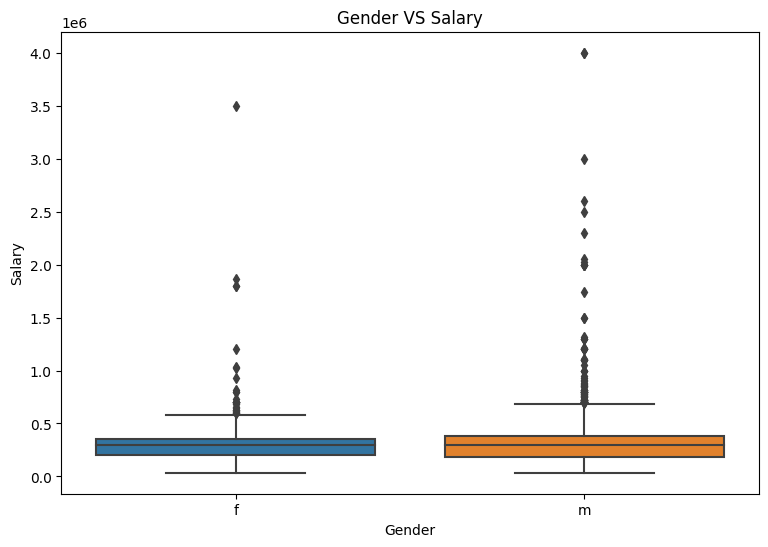

In [174]:
plt.figure(figsize=(9,6))
sns.boxplot(x="Gender", y="Salary", data=concatenated_df)
plt.title("Gender VS Salary")
plt.show()

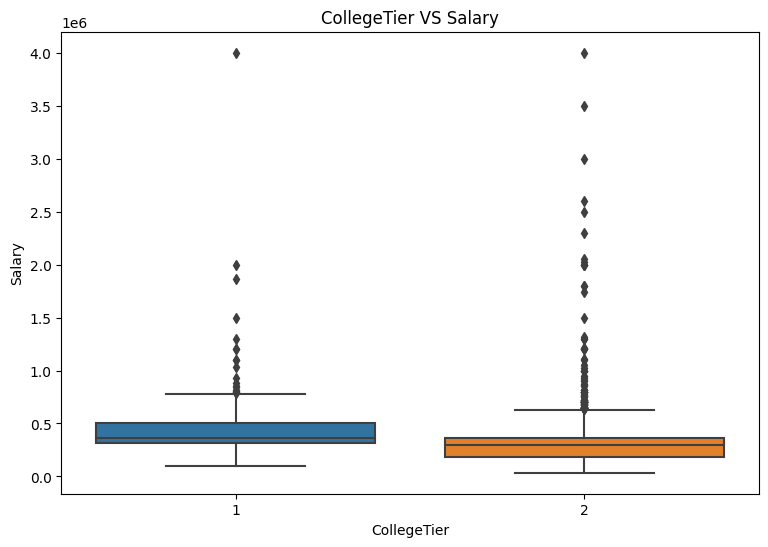

In [176]:
plt.figure(figsize=(9,6))
sns.boxplot(x="CollegeTier", y="Salary", data=concatenated_df)
plt.title("CollegeTier VS Salary")
plt.show()

<Figure size 900x600 with 0 Axes>

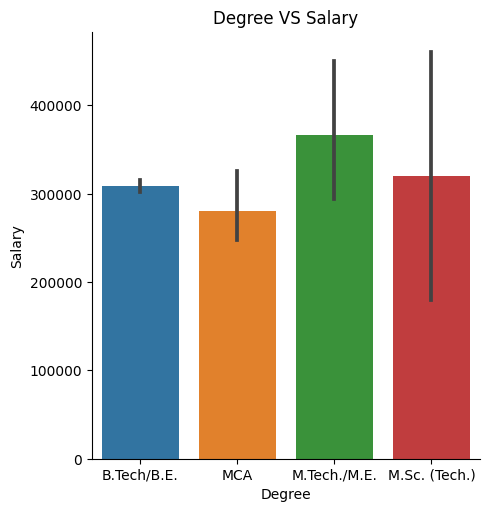

In [177]:
plt.figure(figsize=(9,6))
sns.catplot(x="Degree", y="Salary", kind="bar", data=concatenated_df)
plt.title("Degree VS Salary")
plt.show()

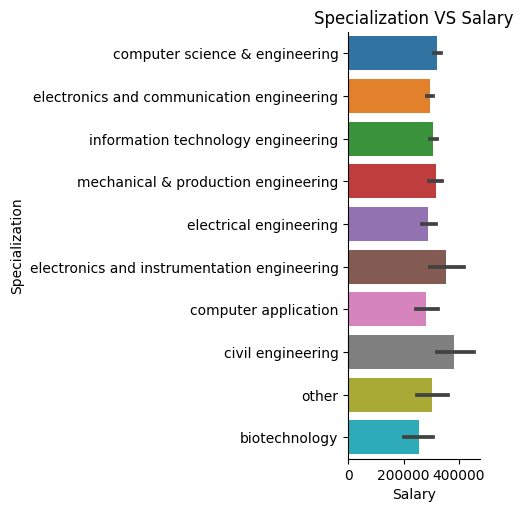

In [178]:
sns.catplot(y="Specialization", x="Salary", kind="bar", data=concatenated_df)
plt.title("Specialization VS Salary")
plt.show()

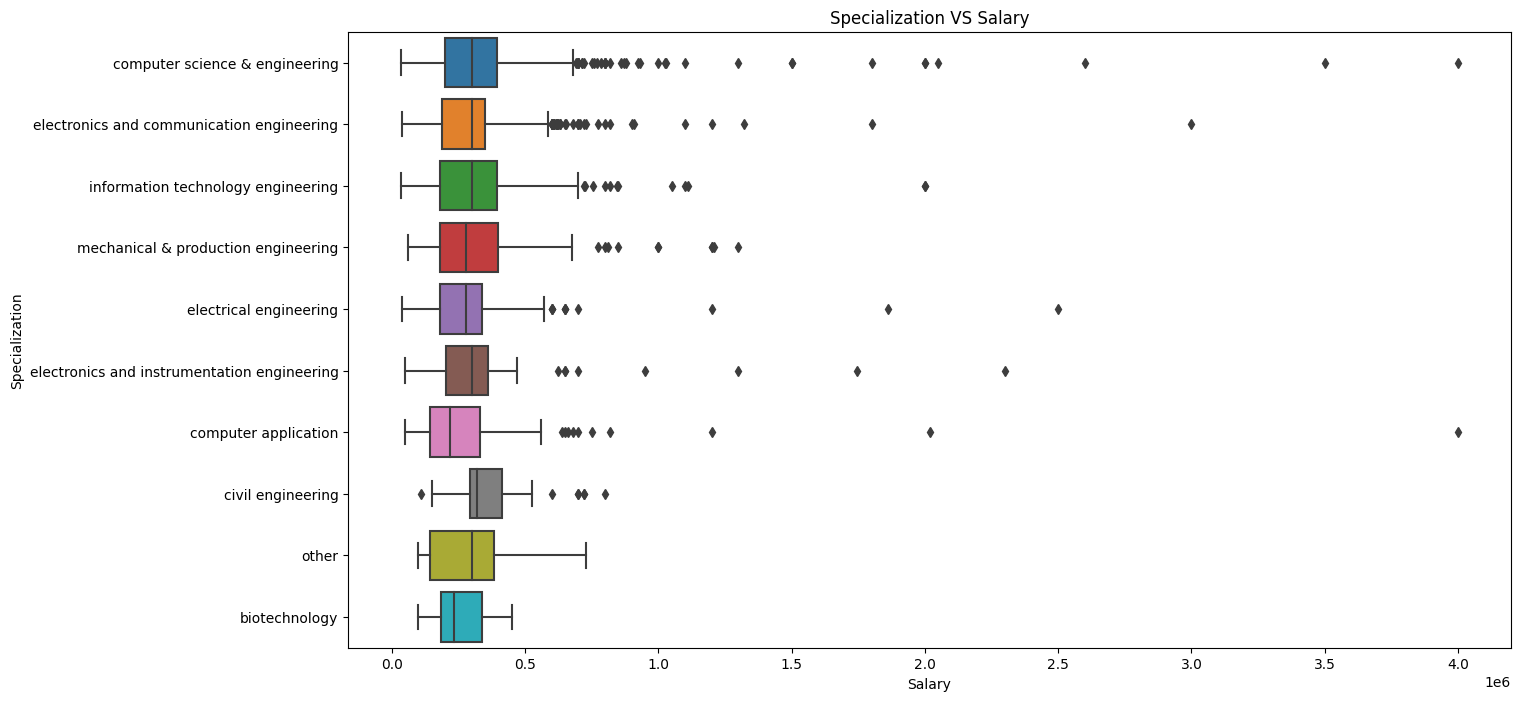

In [179]:
plt.figure(figsize=(15,8))
sns.boxplot(y="Specialization", x="Salary", data=concatenated_df)
plt.title("Specialization VS Salary")
plt.show()

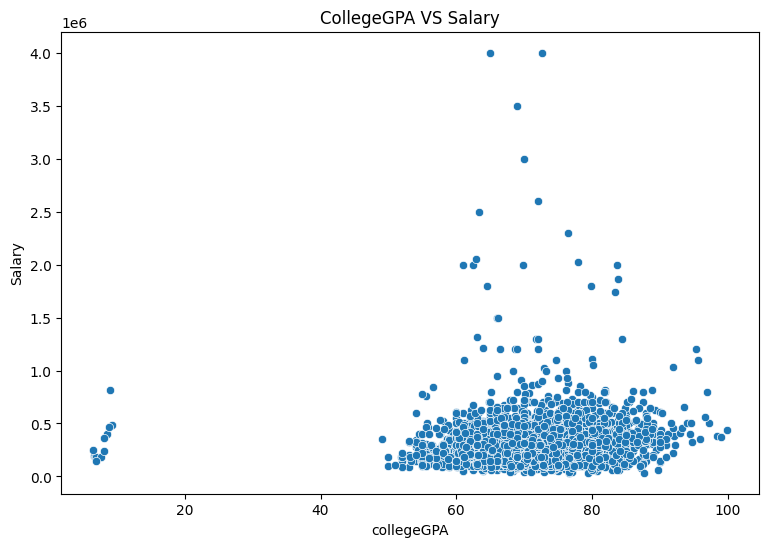

In [180]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=concatenated_df, x='collegeGPA', y='Salary')
plt.title("CollegeGPA VS Salary")
plt.show()

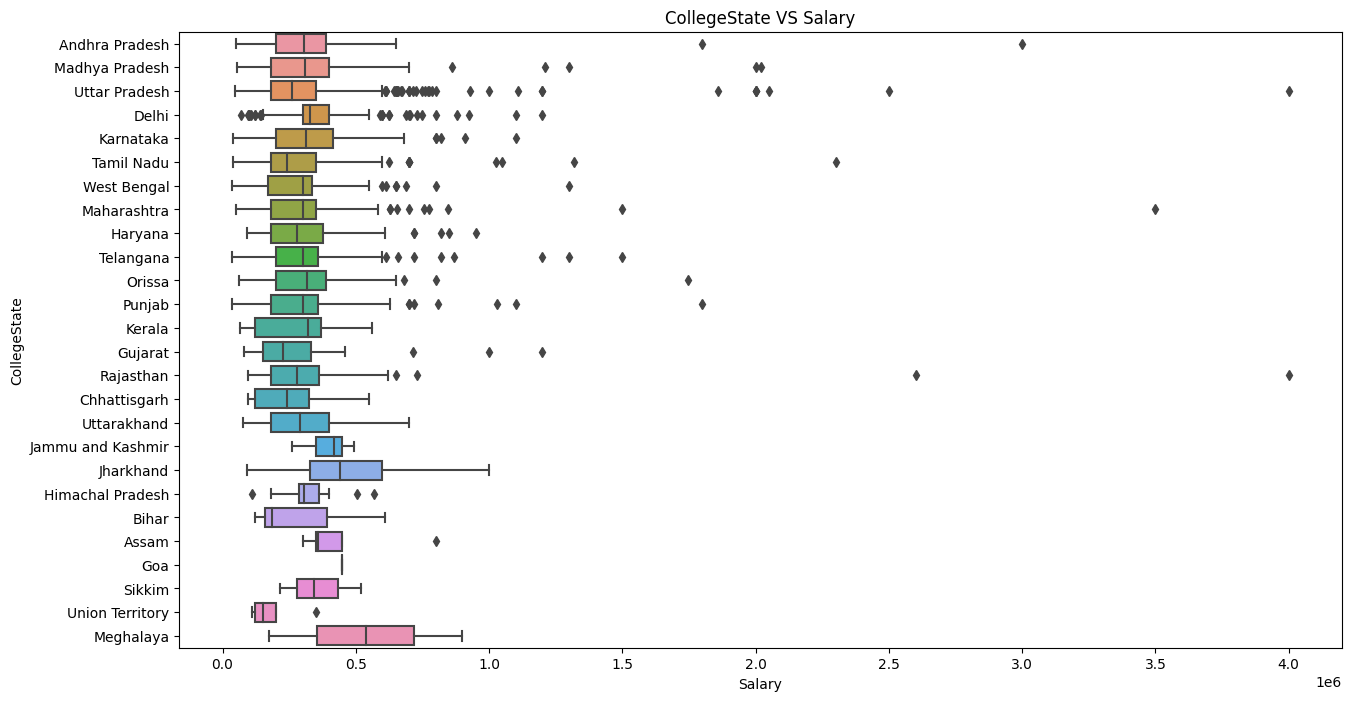

In [184]:
plt.figure(figsize=(15,8))
sns.boxplot(y="CollegeState", x="Salary", data=concatenated_df)
plt.title("CollegeState VS Salary")
plt.show()

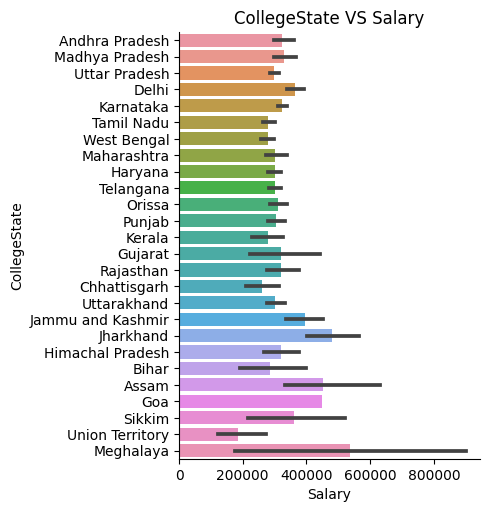

In [185]:
sns.catplot(y="CollegeState", x="Salary", kind="bar", data=concatenated_df)
plt.title("CollegeState VS Salary")
plt.show()

Research Questions
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.

Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

In [214]:
# group by job title and calculate average salary
salary_by_title = concatenated_df.groupby('Designation')['Salary'].mean()

# print the result
print(salary_by_title)

Designation
.net developer                223382.352941
android developer             200760.869565
application developer         419038.461538
application engineer          278181.818182
asp.net developer             208269.230769
                                  ...      
systems engineer              369364.406780
technical engineer            279230.769231
technical support engineer    239078.947368
test engineer                 286491.228070
web developer                 168981.481481
Name: Salary, Length: 69, dtype: float64


In [219]:
concatenated_df['Designation'].value_counts()

others                               869
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
java software engineer               111
software test engineer               100
project engineer                      77
technical support engineer            76
senior software engineer              72
java developer                        67
test engineer                         57
web developer                         54
application developer                 52
assistant manager                     52
network engineer                      51
business analyst                      49
data analyst                          49
engineer                              47
android developer                     46
associate software engineer           46
programmer                            36
senior systems engineer               35
.net developer  

In [218]:
pd.set_option('display.max_rows',None)

In [220]:
job_titles = ['software development engineer','associate software engineer','programmer analyst', 'programmer analyst trainee', 'software engineer associate','software engineer','software engineer trainee', 'software engineering associate', 'hardware engineer', 'associate engineer']

# Filter the DataFrame by checking if any job title is present in the Designation column, ignoring case
data = concatenated_df[concatenated_df['Designation'].str.lower().isin(job_titles)]

In [221]:
data =  data[data['Specialization']=='computer science & engineering']

In [222]:
data

Salary  10percentage  12graduation  12percentage  CollegeTier  \
19     325000         79.00          2008         62.20            2   
20     320000         91.20          2006         84.63            2   
24     335000         88.00          2010         90.00            2   
31     340000         77.20          2010         86.10            2   
36     270000         91.50          2009         93.80            1   
44     380000         84.50          2007         82.50            2   
48     390000         86.60          2009         75.00            2   
52     400000         85.20          2010         81.50            2   
55     250000         90.80          2010         90.10            2   
59     120000         72.00          1995         49.00            2   
76     800000         93.44          2008         90.00            2   
113    340000         91.43          2009         74.00            2   
115    330000         76.17          2009         72.00            2   
120    500000         76.00          2008         76.60            2   
130    325000         82.80          2009         73.60            2   
168    375000         85.80          2010         78.40            1   
170    235000         92.66          2008         95.60            2   
175    450000         76.20          2008         72.60            2   
187    410000         91.50          2008         95.50            2   
200    440000         91.40          2007         86.00            1   
205    325000         80.60          2010         80.60            2   
207    360000         82.00          2008         70.16            2   
227    550000         94.60          2006         83.00            1   
243    265000         80.33          2008         86.90            2   
252    170000         77.66          2009         90.70            2   
275    305000         88.60          2010         92.00            2   
290    560000         89.42          2009         81.20            2   
307    305000         80.20          2008         63.00            2   
320    300000         73.00          2008         81.00            2   
328    785000         84.83          2009         78.43            1   
343    300000         66.33          2008         61.00            2   
351    330000         86.00          2010         71.00            2   
356    210000         79.50          2008         71.08            2   
376    460000         77.16          2006         71.00            2   
378    700000         72.33          2009         67.00            2   
384    320000         82.00          2008         69.40            2   
389    275000         81.00          2009         66.00            2   
410    300000         79.50          2008         76.00            2   
431    300000         87.00          2006         76.00            2   
432    475000         86.88          2010         80.83            2   
462    240000         91.00          2009         91.00            2   
464    335000         80.00          2007         81.00            2   
473    335000         66.00          2006         61.00            2   
499    300000         90.00          2010         79.40            2   
513    400000         85.60          2009         86.00            1   
530    345000         72.80          2009         65.40            2   
548    300000         77.80          2007         74.00            2   
550    450000         78.00          2010         70.00            2   
553    500000         87.60          2005         77.20            1   
560    450000         88.80          2009         79.80            2   
566    370000         78.00          2009         69.00            2   
578    305000         68.80          2012         86.00            2   
595    180000         55.50          2010         66.00            2   
603    265000         71.00          2010         68.00            2   
616    360000         75.40          2008      

In [223]:
rq = data[['Salary', 'Designation', 'Specialization', 'Gender']]

In [224]:
rq 

Salary                    Designation                  Specialization  \
19     325000              software engineer  computer science & engineering   
20     320000              software engineer  computer science & engineering   
24     335000             programmer analyst  computer science & engineering   
31     340000              software engineer  computer science & engineering   
36     270000              software engineer  computer science & engineering   
44     380000             programmer analyst  computer science & engineering   
48     390000              software engineer  computer science & engineering   
52     400000              software engineer  computer science & engineering   
55     250000              software engineer  computer science & engineering   
59     120000              software engineer  computer science & engineering   
76     800000              software engineer  computer science & engineering   
113    340000              software engineer  computer science & engineering   
115    330000              software engineer  computer science & engineering   
120    500000              software engineer  computer science & engineering   
130    325000              software engineer  computer science & engineering   
168    375000              software engineer  computer science & engineering   
170    235000              software engineer  computer science & engineering   
175    450000              software engineer  computer science & engineering   
187    410000             programmer analyst  computer science & engineering   
200    440000              software engineer  computer science & engineering   
205    325000              software engineer  computer science & engineering   
207    360000              software engineer  computer science & engineering   
227    550000              software engineer  computer science & engineering   
243    265000              software engineer  computer science & engineering   
252    170000              software engineer  computer science & engineering   
275    305000              software engineer  computer science & engineering   
290    560000              software engineer  computer science & engineering   
307    305000              software engineer  computer science & engineering   
320    300000              software engineer  computer science & engineering   
328    785000              software engineer  computer science & engineering   
343    300000    associate software engineer  computer science & engineering   
351    330000              software engineer  computer science & engineering   
356    210000              software engineer  computer science & engineering   
376    460000              software engineer  computer science & engineering   
378    700000  software development engineer  computer science & engineering   
384    320000              software engineer  computer science & engineering   
389    275000              software engineer  computer science & engineering   
410    300000              software engineer  computer science & engineering   
431    300000             programmer analyst  computer science & engineering   
432    475000              software engineer  computer science & engineering   
462    240000              software engineer  computer science & engineering   
464    335000             programmer analyst  computer science & engineering   
473    335000             programmer analyst  computer science & engineering   
499    300000              software engineer  computer science & engineering   
513    400000              software engineer  computer science & engineering   
530    345000             programmer analyst  computer science & engineering   
548    300000              software engineer  computer science & engineering   
550    450000              software engineer  computer science & engineering   
553    500000              software engineer  computer science & engineering   
560    

In [225]:
# Grouping the data by Designation and Specialization and calculating the average salary for each group
grouped_df = rq.groupby(['Designation', 'Specialization']).agg({'Salary': 'mean'}).reset_index()

# Checking if the average salaries are within the range of 2.5-3 lakhs
lower_bound = 250000
upper_bound = 300000
result = (rq['Salary'] >= lower_bound) & (rq['Salary'] <= upper_bound)

if result.all():
    print("The claim is supported by the data.")
else:
    print("The claim is not supported by the data.")

The claim is not supported by the data.


Research Question No : 2
Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?


<Figure size 900x600 with 0 Axes>

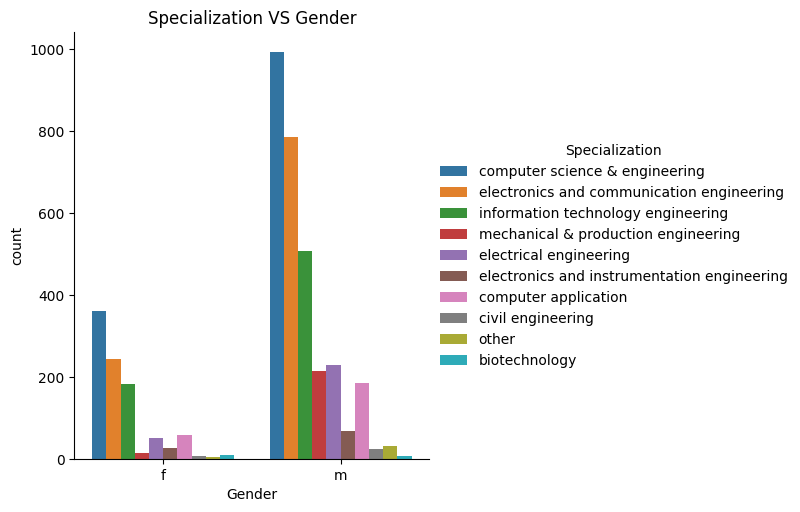

In [226]:
plt.figure(figsize=(9,6))
sns.catplot(x="Gender", hue="Specialization", kind="count", data=concatenated_df)
plt.title("Specialization VS Gender")
plt.show()

In [328]:
# Calculating the frequency distribution of each specialization based on gender

freq_table = pd.crosstab(df['Gender'], df['Specialization'], margins=True)

# Normalizing the frequency table to get the proportions

freq_table.div(freq_table['All'], axis=0)

Specialization  aeronautical engineering  \
Gender                                     
f                               0.001045   
m                               0.000658   
All                             0.000750   

Specialization  applied electronics and instrumentation  \
Gender                                                    
f                                              0.002090   
m                                              0.002302   
All                                            0.002251   

Specialization  automobile/automotive engineering  biomedical engineering  \
Gender                                                                      
f                                        0.000000                 0.00209   
m                                        0.001644                 0.00000   
All                                      0.001251                 0.00050   

Specialization  biotechnology  ceramic engineering  chemical engineering  \
Gender                                                                     
f                    0.009404             0.000000              0.001045   
m                    0.001973             0.000329              0.002631   
All                  0.003752             0.000250              0.002251   

Specialization  civil engineering  computer and communication engineering  \
Gender                                                                      
f                        0.006270                                0.000000   
m                        0.007563                                0.000329   
All                      0.007254                                0.000250   

Specialization  computer application  ...  \
Gender                                ...   
f                           0.061651  ...   
m                           0.060835  ...   
All                         0.061031  ...   

Specialization  mechanical & production engineering  \
Gender                                                
f                                          0.000000   
m                                          0.000329   
All                                        0.000250   

Specialization  mechanical and automation  mechanical engineering  \
Gender                                                              
f                                0.000000                0.010449   
m                                0.001644                0.062808   
All                              0.001251                0.050275   

Specialization  mechatronics  metallurgical engineering     other  \
Gender                                                              
f                   0.001045                   0.000000  0.000000   
m                   0.000987                   0.000658  0.004275   
All                 0.001001                   0.000500  0.003252   

Specialization  polymer technology  power systems and automation  \
Gender                                                             
f                         0.000000                      0.000000   
m                         0.000329                      0.000329   
All                       0.000250                      0.000250   

Specialization  telecommunication engineering  All  
Gender                                              
f                                    0.001045  1.0  
m                                    0.001644  1.0  
All                                  0.001501  1.0  

[3 rows x 47 columns]

The most popular specializations for both males and females are Computer Science Engineering followed by  Electronics and Communication Engineering and Information Technology Engineering

The proportion of females in Aeronautical Engineering, Biomedical Engineering,Computer Applications ,mechatronics and Biotechnology is higher than the proportion of males in these fields.

Other specializations have a higher proportion of males than females.